In [1]:
import _init_
from constants import *
from set_path import *
from config import *
from functions import *
import seaborn as sns

In [2]:
source = 'Summit' 
# source = 'Gadi'

if(source == 'Summit'):
    folder_list = ['SummitData/GasGravity/Production2pc/R8/', 'SummitData/GasGravity/Production2pc/R8-0.2Zsol/',\
               'SummitData/GasGravity/Production2pc/R4/', 'SummitData/GasGravity/Production2pc/R4-0.2Zsol/',\
                  'SetonixData/R16/4pc/', 'SetonixData/R16-0.2Zsol/4pc/',\
                  'SummitData/GasGravity/Production2pc/R4-h75-0.2Zsol','SummitData/GasGravity/Production2pc/R16-h300-Zsol/']
    
else:
    folder_list = ['GasGravity/', 'GasGravity/R8-0.2Zsol/', 'GasGravity/R4/', 'GasGravity/R4-0.2Zsol/']
    data_path0 = os.path.join(scratch, 'sims/', folder_list[0])

# Total Mass Outflow Rate

FileNotFoundError: [Errno 2] No such file or directory: '/g/data/jh2/av5889/quokka_myrepo/quokka/sims/S'

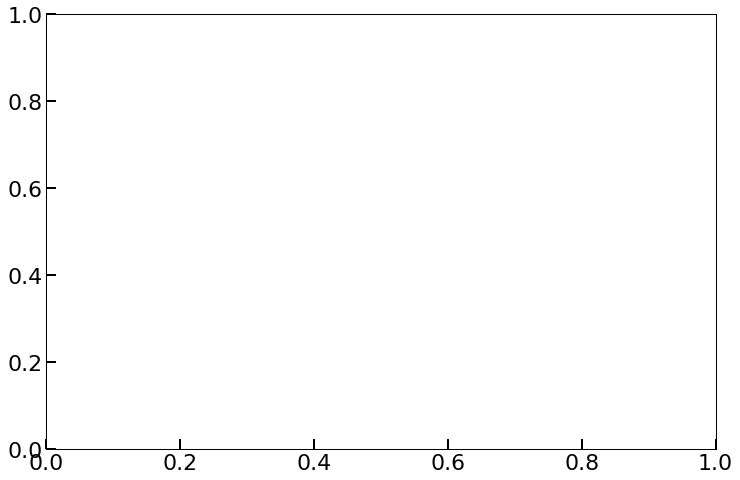

In [7]:


fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))


label= ['R8', 'R8-0.2Zsol', 'R4', 'R4-0.2Zsol', 'R16', 'R16-0.2Zsol']
ls = ['-', '-', '--', '--' , '-.', '-.']

# colors =  sns.color_palette("rocket", len(folder_list))
colors = ['mediumvioletred', 'forestgreen', 'mediumvioletred', 'forestgreen', \
         'mediumvioletred', 'forestgreen']

k=0
for folder in folder_list[]:
    if(source=='Summit'):
        data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder)
    else:
        data_path = os.path.join(scratch, 'sims/', folder)

    os.chdir(data_path)
    list_file = glob.glob("proj_y_*")
    
    infile   = os.path.join(data_path, 'metal_uniform.in')
    dom_min, dom_max, ncells = getdomain(infile)
    fac = 1
    zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
    xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
    yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

    dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
    munit = dx*yr_to_sec/Msun/1.e-2
    
    timestep = np.zeros((len(list_file)))
    tot_mass_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))

    tot_scalar_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))
    
    height = 3. * kpc
    if(k>=4): height = 6. * kpc
    index = min(range(zrange.shape[0]), key=lambda i: abs(zrange[i] - height))
    
    i = 0 
    for f in list_file:
        inputfile = os.path.join(data_path, f)
    
        ds   = yt.load(inputfile)
        data = ds.covering_grid(level=0, left_edge=dom_min, dims=ds.domain_dimensions, num_ghost_zones=0)
        timestep[i] = ds.current_time.to('Myr')
        tot_mass_flux[i,:] = np.array(data['mass_outflow'])[:,0,:]
        print(timestep[i])
        i+=1
        
    print('Max timestep = ', (timestep.shape))
    indexes = list(range(len(timestep)))
    indexes.sort(key=timestep.__getitem__)
    sorted_time = list(map(timestep.__getitem__, indexes))
    
    flux_sum = np.sum(tot_mass_flux[:,:,index], axis=1)
    sorted_mdot  = list(map(flux_sum.__getitem__, indexes))
    ax.plot(sorted_time, np.asarray(sorted_mdot)*munit, ls=ls[k],\
            label=label[k],markersize=12, lw=2.5, color=colors[k])
    print(k)
    k+=1

ax.legend()
ax.set_ylabel('$\dot{M}$' + '\n' + '[$10^{-2} $M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$]')
ax.set_title('Total Mass Outflow')
ax.axhline(0.0, ls='--', color='darkslategray')
ax.set_yscale('Symlog', linthresh=1.e-4)
ax.set_ylim(-10., 10.)

In [ ]:


fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))


label= ['R8', 'R8-0.2Zsol', 'R4', 'R4-0.2Zsol', 'R16', 'R16-0.2Zsol']
ls = ['-', '-', '--', '--' , '-.', '-.']

# colors =  sns.color_palette("rocket", len(folder_list))
colors = ['mediumvioletred', 'forestgreen', 'mediumvioletred', 'forestgreen', \
         'mediumvioletred', 'forestgreen']

k=0
for folder in folder_list[]:
    if(source=='Summit'):
        data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder)
    else:
        data_path = os.path.join(scratch, 'sims/', folder)

    os.chdir(data_path)
    list_file = glob.glob("proj_y_*")
    
    infile   = os.path.join(data_path, 'metal_uniform.in')
    dom_min, dom_max, ncells = getdomain(infile)
    fac = 1
    zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
    xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
    yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

    dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
    munit = dx*yr_to_sec/Msun/1.e-2
    
    timestep = np.zeros((len(list_file)))
    tot_mass_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))

    tot_scalar_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))
    
    height = 3. * kpc
    if(k>=4): height = 6. * kpc
    index = min(range(zrange.shape[0]), key=lambda i: abs(zrange[i] - height))
    
    i = 0 
    for f in list_file:
        inputfile = os.path.join(data_path, f)
    
        ds   = yt.load(inputfile)
        data = ds.covering_grid(level=0, left_edge=dom_min, dims=ds.domain_dimensions, num_ghost_zones=0)
        timestep[i] = ds.current_time.to('Myr')
        tot_mass_flux[i,:] = np.array(data['mass_outflow'])[:,0,:]
        print(timestep[i])
        i+=1
        
    print('Max timestep = ', (timestep.shape))
    indexes = list(range(len(timestep)))
    indexes.sort(key=timestep.__getitem__)
    sorted_time = list(map(timestep.__getitem__, indexes))
    
    flux_sum = np.sum(tot_mass_flux[:,:,index], axis=1)
    sorted_mdot  = list(map(flux_sum.__getitem__, indexes))
    ax.plot(sorted_time, np.asarray(sorted_mdot)*munit, ls=ls[k],\
            label=label[k],markersize=12, lw=2.5, color=colors[k])
    print(k)
    k+=1

ax.legend()
ax.set_ylabel('$\dot{M}$' + '\n' + '[$10^{-2} $M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$]')
ax.set_title('Total Mass Outflow')
ax.axhline(0.0, ls='--', color='darkslategray')
ax.set_yscale('Symlog', linthresh=1.e-4)
ax.set_ylim(-10., 10.)

# Mass outflow Rate for R16s

yt : [INFO     ] 2024-08-12 10:55:47,205 Parameters: current_time              = 2824722832607120.5
yt : [INFO     ] 2024-08-12 10:55:47,206 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:47,207 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:47,209 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:47,594 Parameters: current_time              = 5797556976246815.0
yt : [INFO     ] 2024-08-12 10:55:47,596 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:47,597 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:47,599 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


89.51006516994703


yt : [INFO     ] 2024-08-12 10:55:47,981 Parameters: current_time              = 4138073528560012.0
yt : [INFO     ] 2024-08-12 10:55:47,982 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:47,984 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:47,985 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


183.71349457014523


yt : [INFO     ] 2024-08-12 10:55:48,368 Parameters: current_time              = 5201917933901904.0
yt : [INFO     ] 2024-08-12 10:55:48,370 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:48,371 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:48,372 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


131.1276373539183


yt : [INFO     ] 2024-08-12 10:55:48,755 Parameters: current_time              = 3486346979218841.0
yt : [INFO     ] 2024-08-12 10:55:48,756 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:48,758 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:48,759 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


164.83883229085558


yt : [INFO     ] 2024-08-12 10:55:49,149 Parameters: current_time              = 6040951068727404.0
yt : [INFO     ] 2024-08-12 10:55:49,150 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:49,151 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:49,153 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


110.4756692276612


yt : [INFO     ] 2024-08-12 10:55:49,538 Parameters: current_time              = 6118958206450768.0
yt : [INFO     ] 2024-08-12 10:55:49,539 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:49,540 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:49,542 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


191.426187946086


yt : [INFO     ] 2024-08-12 10:55:49,924 Parameters: current_time              = 4752597666994292.0
yt : [INFO     ] 2024-08-12 10:55:49,925 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:49,926 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:49,928 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


193.898084976385


yt : [INFO     ] 2024-08-12 10:55:50,301 Parameters: current_time              = 5115722944014017.0
yt : [INFO     ] 2024-08-12 10:55:50,303 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:50,304 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:50,306 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


150.60073221646425


yt : [INFO     ] 2024-08-12 10:55:50,691 Parameters: current_time              = 4687594345049817.0
yt : [INFO     ] 2024-08-12 10:55:50,693 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:50,694 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:50,695 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


162.1074778821589


yt : [INFO     ] 2024-08-12 10:55:51,080 Parameters: current_time              = 702930524952019.2
yt : [INFO     ] 2024-08-12 10:55:51,081 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:51,082 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:51,084 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


148.54090124248413


yt : [INFO     ] 2024-08-12 10:55:51,466 Parameters: current_time              = 3070290031758190.0
yt : [INFO     ] 2024-08-12 10:55:51,468 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:51,469 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:51,470 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


22.274524201841054


yt : [INFO     ] 2024-08-12 10:55:51,857 Parameters: current_time              = 4912347811113584.0
yt : [INFO     ] 2024-08-12 10:55:51,859 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:51,860 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:51,861 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


97.29162014089125


yt : [INFO     ] 2024-08-12 10:55:52,245 Parameters: current_time              = 1934243948075786.8
yt : [INFO     ] 2024-08-12 10:55:52,247 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:52,248 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:52,249 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


155.66290881162016


yt : [INFO     ] 2024-08-12 10:55:52,630 Parameters: current_time              = 519299970917671.9
yt : [INFO     ] 2024-08-12 10:55:52,632 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:52,633 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:52,634 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


61.29249208037958


yt : [INFO     ] 2024-08-12 10:55:53,017 Parameters: current_time              = 1692277202484318.2
yt : [INFO     ] 2024-08-12 10:55:53,019 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:53,020 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:53,021 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


16.455623080261866


yt : [INFO     ] 2024-08-12 10:55:53,411 Parameters: current_time              = 4620384718447062.0
yt : [INFO     ] 2024-08-12 10:55:53,412 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:53,413 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:53,414 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


53.625028598002324


yt : [INFO     ] 2024-08-12 10:55:53,810 Parameters: current_time              = 1176871975974538.5
yt : [INFO     ] 2024-08-12 10:55:53,811 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:53,812 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:53,814 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


146.41115669274794


yt : [INFO     ] 2024-08-12 10:55:54,198 Parameters: current_time              = 5424804713336776.0
yt : [INFO     ] 2024-08-12 10:55:54,200 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:54,201 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:54,203 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


37.29282252055094


yt : [INFO     ] 2024-08-12 10:55:54,590 Parameters: current_time              = 3594779302526339.0
yt : [INFO     ] 2024-08-12 10:55:54,591 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:54,592 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:54,594 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


171.9016881301739


yt : [INFO     ] 2024-08-12 10:55:54,988 Parameters: current_time              = 1277670567207254.5
yt : [INFO     ] 2024-08-12 10:55:54,990 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:54,991 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:54,993 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


113.91168221050837


yt : [INFO     ] 2024-08-12 10:55:55,389 Parameters: current_time              = 860963099270590.2
yt : [INFO     ] 2024-08-12 10:55:55,390 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:55,392 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:55,393 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


40.486937131063655


yt : [INFO     ] 2024-08-12 10:55:55,986 Parameters: current_time              = 2299669665181043.0
yt : [INFO     ] 2024-08-12 10:55:55,987 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:55,988 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:55,990 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


27.28227429432499


yt : [INFO     ] 2024-08-12 10:55:56,374 Parameters: current_time              = 5877712051824645.0
yt : [INFO     ] 2024-08-12 10:55:56,375 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:56,377 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:56,378 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


72.87213429351544


yt : [INFO     ] 2024-08-12 10:55:56,762 Parameters: current_time              = 3690056010815159.5
yt : [INFO     ] 2024-08-12 10:55:56,763 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:56,765 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:56,766 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


186.25345564379563


yt : [INFO     ] 2024-08-12 10:55:57,149 Parameters: current_time              = 4067085637308106.5
yt : [INFO     ] 2024-08-12 10:55:57,150 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:57,151 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:57,153 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


116.93081890939614


yt : [INFO     ] 2024-08-12 10:55:57,533 Parameters: current_time              = 2401700141390919.0
yt : [INFO     ] 2024-08-12 10:55:57,535 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:57,536 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:57,537 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


128.87816682219517


yt : [INFO     ] 2024-08-12 10:55:57,919 Parameters: current_time              = 4828682196817395.0
yt : [INFO     ] 2024-08-12 10:55:57,920 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:57,922 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:57,923 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


76.10528498336119


yt : [INFO     ] 2024-08-12 10:55:58,307 Parameters: current_time              = 3361010890485230.5
yt : [INFO     ] 2024-08-12 10:55:58,309 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:58,310 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:58,311 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


153.01170547878783


yt : [INFO     ] 2024-08-12 10:55:58,693 Parameters: current_time              = 977188336752355.0
yt : [INFO     ] 2024-08-12 10:55:58,694 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:58,696 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:58,697 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


106.50400824160363


yt : [INFO     ] 2024-08-12 10:55:59,084 Parameters: current_time              = 2187189025546364.0
yt : [INFO     ] 2024-08-12 10:55:59,085 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:59,087 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:59,088 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


30.96522982585352


yt : [INFO     ] 2024-08-12 10:55:59,473 Parameters: current_time              = 1542629783782636.8
yt : [INFO     ] 2024-08-12 10:55:59,474 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:59,476 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:59,477 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


69.30783790739359


yt : [INFO     ] 2024-08-12 10:55:59,859 Parameters: current_time              = 5357774308395428.0
yt : [INFO     ] 2024-08-12 10:55:59,861 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:55:59,862 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:55:59,863 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


48.882988053040684


yt : [INFO     ] 2024-08-12 10:56:00,249 Parameters: current_time              = 2515951756207396.5
yt : [INFO     ] 2024-08-12 10:56:00,251 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:00,252 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:00,253 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


169.77762277218255


yt : [INFO     ] 2024-08-12 10:56:00,665 Parameters: current_time              = 4970248998308439.0
yt : [INFO     ] 2024-08-12 10:56:00,666 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:00,667 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:00,669 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


79.72570018656033


yt : [INFO     ] 2024-08-12 10:56:01,051 Parameters: current_time              = 5588332028016765.0
yt : [INFO     ] 2024-08-12 10:56:01,052 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:01,053 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:01,055 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


157.49768671598724


yt : [INFO     ] 2024-08-12 10:56:01,435 Parameters: current_time              = 5956927781972012.0
yt : [INFO     ] 2024-08-12 10:56:01,437 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:01,438 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:01,440 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


177.08355603774575


yt : [INFO     ] 2024-08-12 10:56:01,821 Parameters: current_time              = 4521821685262883.0
yt : [INFO     ] 2024-08-12 10:56:01,823 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:01,824 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:01,825 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


188.76365065695782


yt : [INFO     ] 2024-08-12 10:56:02,209 Parameters: current_time              = 1828544581923616.8
yt : [INFO     ] 2024-08-12 10:56:02,211 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:02,212 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:02,214 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


143.28788264199062


yt : [INFO     ] 2024-08-12 10:56:02,595 Parameters: current_time              = 4251031460972464.5
yt : [INFO     ] 2024-08-12 10:56:02,596 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:02,597 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:02,599 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


57.94308128386242


yt : [INFO     ] 2024-08-12 10:56:02,978 Parameters: current_time              = 2074983273465909.0
yt : [INFO     ] 2024-08-12 10:56:02,980 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:02,981 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:02,982 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


134.70705823549523


yt : [INFO     ] 2024-08-12 10:56:03,363 Parameters: current_time              = 2660724941443080.0
yt : [INFO     ] 2024-08-12 10:56:03,365 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:03,366 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:03,368 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


65.75225218222897


yt : [INFO     ] 2024-08-12 10:56:03,751 Parameters: current_time              = 1400762728535907.8
yt : [INFO     ] 2024-08-12 10:56:03,752 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:03,754 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:03,755 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


84.31328559342535


yt : [INFO     ] 2024-08-12 10:56:04,139 Parameters: current_time              = 6211566710843678.0
yt : [INFO     ] 2024-08-12 10:56:04,140 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:04,142 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:04,143 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


44.38749234846464


yt : [INFO     ] 2024-08-12 10:56:04,592 Parameters: current_time              = 4427883927897960.5
yt : [INFO     ] 2024-08-12 10:56:04,593 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:04,594 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:04,596 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


196.83267139591345


yt : [INFO     ] 2024-08-12 10:56:05,170 Parameters: current_time              = 6290000000000000.0
yt : [INFO     ] 2024-08-12 10:56:05,171 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:05,172 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:05,174 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


140.311174737558


yt : [INFO     ] 2024-08-12 10:56:05,557 Parameters: current_time              = 5728369138249916.0
yt : [INFO     ] 2024-08-12 10:56:05,558 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:05,559 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:05,561 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


199.3180723502421


yt : [INFO     ] 2024-08-12 10:56:05,941 Parameters: current_time              = 5277183662452920.0
yt : [INFO     ] 2024-08-12 10:56:05,942 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:05,944 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:05,945 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


181.52106428403667


yt : [INFO     ] 2024-08-12 10:56:06,334 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-08-12 10:56:06,335 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:06,337 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:06,338 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


167.22385930656705


yt : [INFO     ] 2024-08-12 10:56:06,723 Parameters: current_time              = 224231778241211.75
yt : [INFO     ] 2024-08-12 10:56:06,725 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:06,726 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:06,727 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


0.0


yt : [INFO     ] 2024-08-12 10:56:07,113 Parameters: current_time              = 3795184330348994.0
yt : [INFO     ] 2024-08-12 10:56:07,114 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:07,115 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:07,117 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


7.1054762796033835


yt : [INFO     ] 2024-08-12 10:56:07,497 Parameters: current_time              = 3175836834085439.0
yt : [INFO     ] 2024-08-12 10:56:07,499 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:07,500 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:07,502 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


120.26213433052558


yt : [INFO     ] 2024-08-12 10:56:07,884 Parameters: current_time              = 4331864772313301.0
yt : [INFO     ] 2024-08-12 10:56:07,885 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:07,887 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:07,888 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


100.63619648152708


yt : [INFO     ] 2024-08-12 10:56:08,274 Parameters: current_time              = 3935927135936358.5
yt : [INFO     ] 2024-08-12 10:56:08,275 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:08,276 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:08,278 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


137.2685113035624


yt : [INFO     ] 2024-08-12 10:56:08,661 Parameters: current_time              = 2945612226499601.5
yt : [INFO     ] 2024-08-12 10:56:08,662 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:08,663 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:08,665 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


124.72200471317079


yt : [INFO     ] 2024-08-12 10:56:09,049 Parameters: current_time              = 5041110534629653.0
yt : [INFO     ] 2024-08-12 10:56:09,050 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:09,052 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:09,053 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


93.34081889939671


yt : [INFO     ] 2024-08-12 10:56:09,438 Parameters: current_time              = 384574382052010.25
yt : [INFO     ] 2024-08-12 10:56:09,439 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:09,440 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:09,442 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


159.74315330157089


yt : [INFO     ] 2024-08-12 10:56:09,825 Parameters: current_time              = 5664204826549233.0
yt : [INFO     ] 2024-08-12 10:56:09,827 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:09,828 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:09,830 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


12.18642678949002


yt : [INFO     ] 2024-08-12 10:56:10,211 Parameters: current_time              = 5513254369484366.0
yt : [INFO     ] 2024-08-12 10:56:10,212 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:10,213 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:10,215 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


179.4878199403387


yt : [INFO     ] 2024-08-12 10:56:10,597 Parameters: current_time              = 3264513122431458.0
yt : [INFO     ] 2024-08-12 10:56:10,598 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:10,599 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:10,601 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


174.7044886012994


yt : [INFO     ] 2024-08-12 10:56:11,042 Parameters: current_time              = 2691988641713706.0
yt : [INFO     ] 2024-08-12 10:56:11,044 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:11,045 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:11,047 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


103.44617849365788
Max timestep =  (60,)
0


yt : [INFO     ] 2024-08-12 10:56:11,479 Parameters: current_time              = 6083275366984045.0
yt : [INFO     ] 2024-08-12 10:56:11,480 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:11,482 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:11,483 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


85.30397247299243


yt : [INFO     ] 2024-08-12 10:56:12,042 Parameters: current_time              = 6839634091359872.0
yt : [INFO     ] 2024-08-12 10:56:12,044 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:12,045 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:12,046 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


192.76736402590961


yt : [INFO     ] 2024-08-12 10:56:12,594 Parameters: current_time              = 5326332170238982.0
yt : [INFO     ] 2024-08-12 10:56:12,595 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:12,597 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:12,598 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


216.73492570283773


yt : [INFO     ] 2024-08-12 10:56:13,137 Parameters: current_time              = 6687634773438837.0
yt : [INFO     ] 2024-08-12 10:56:13,138 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:13,139 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:13,141 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


168.78128153722025


yt : [INFO     ] 2024-08-12 10:56:13,704 Parameters: current_time              = 3669250492804187.5
yt : [INFO     ] 2024-08-12 10:56:13,705 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:13,707 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:13,708 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


211.91835796888347


yt : [INFO     ] 2024-08-12 10:56:14,250 Parameters: current_time              = 4668470329042411.0
yt : [INFO     ] 2024-08-12 10:56:14,252 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:14,253 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:14,255 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


116.27153182764809


yt : [INFO     ] 2024-08-12 10:56:14,812 Parameters: current_time              = 3234459844365598.0
yt : [INFO     ] 2024-08-12 10:56:14,813 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:14,814 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:14,816 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


147.93489774388453


yt : [INFO     ] 2024-08-12 10:56:15,535 Parameters: current_time              = 5559374429084494.0
yt : [INFO     ] 2024-08-12 10:56:15,537 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:15,538 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:15,539 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


102.49384757920748


yt : [INFO     ] 2024-08-12 10:56:15,998 Parameters: current_time              = 5645286620792346.0
yt : [INFO     ] 2024-08-12 10:56:15,999 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:16,001 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:16,002 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


176.1659450998965


yt : [INFO     ] 2024-08-12 10:56:16,462 Parameters: current_time              = 4229740711825171.0
yt : [INFO     ] 2024-08-12 10:56:16,463 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:16,464 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:16,466 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


178.8883381750306


yt : [INFO     ] 2024-08-12 10:56:16,999 Parameters: current_time              = 4588760692664463.0
yt : [INFO     ] 2024-08-12 10:56:17,000 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:17,002 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:17,003 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


134.03239510688934


yt : [INFO     ] 2024-08-12 10:56:17,537 Parameters: current_time              = 4145506043038299.5
yt : [INFO     ] 2024-08-12 10:56:17,539 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:17,540 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:17,542 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


145.40905178671582


yt : [INFO     ] 2024-08-12 10:56:18,044 Parameters: current_time              = 7382634257766409.0
yt : [INFO     ] 2024-08-12 10:56:18,046 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:18,047 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:18,048 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


131.3631595253853


yt : [INFO     ] 2024-08-12 10:56:18,558 Parameters: current_time              = 6146976046203922.0
yt : [INFO     ] 2024-08-12 10:56:18,560 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:18,561 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:18,562 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


233.9415626589604


yt : [INFO     ] 2024-08-12 10:56:19,232 Parameters: current_time              = 7549419954511947.0
yt : [INFO     ] 2024-08-12 10:56:19,234 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:19,235 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:19,236 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


194.78591674284235


yt : [INFO     ] 2024-08-12 10:56:19,805 Parameters: current_time              = 659201543874160.1
yt : [INFO     ] 2024-08-12 10:56:19,807 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:19,808 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:19,809 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


239.226682463557


yt : [INFO     ] 2024-08-12 10:56:20,383 Parameters: current_time              = 2898584846968993.0
yt : [INFO     ] 2024-08-12 10:56:20,384 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:20,385 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:20,387 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


20.888836409427842


yt : [INFO     ] 2024-08-12 10:56:20,928 Parameters: current_time              = 6222090327196229.0
yt : [INFO     ] 2024-08-12 10:56:20,930 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:20,931 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:20,933 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


91.85061116716712


yt : [INFO     ] 2024-08-12 10:56:21,500 Parameters: current_time              = 4391815150897238.5
yt : [INFO     ] 2024-08-12 10:56:21,501 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:21,503 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:21,504 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


197.16614467501424


yt : [INFO     ] 2024-08-12 10:56:22,061 Parameters: current_time              = 1934636603562496.5
yt : [INFO     ] 2024-08-12 10:56:22,063 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:22,064 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:22,065 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


139.1682241646145


yt : [INFO     ] 2024-08-12 10:56:22,609 Parameters: current_time              = 519967853992013.44
yt : [INFO     ] 2024-08-12 10:56:22,610 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:22,612 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:22,613 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


61.3049345819231


yt : [INFO     ] 2024-08-12 10:56:23,190 Parameters: current_time              = 1683831428430089.0
yt : [INFO     ] 2024-08-12 10:56:23,191 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:23,193 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:23,194 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


16.476787017771105


yt : [INFO     ] 2024-08-12 10:56:23,694 Parameters: current_time              = 6624777367252568.0
yt : [INFO     ] 2024-08-12 10:56:23,695 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:23,697 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:23,698 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


53.357398168114464


yt : [INFO     ] 2024-08-12 10:56:24,240 Parameters: current_time              = 6758206125476727.0
yt : [INFO     ] 2024-08-12 10:56:24,241 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:24,243 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:24,244 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


209.9265269618909


yt : [INFO     ] 2024-08-12 10:56:24,757 Parameters: current_time              = 4066168529003810.5
yt : [INFO     ] 2024-08-12 10:56:24,758 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:24,760 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:24,761 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


214.15462916941487


yt : [INFO     ] 2024-08-12 10:56:25,337 Parameters: current_time              = 5860590778397089.0
yt : [INFO     ] 2024-08-12 10:56:25,338 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:25,340 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:25,341 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


128.84910541371366


yt : [INFO     ] 2024-08-12 10:56:25,791 Parameters: current_time              = 6537867760192760.0
yt : [INFO     ] 2024-08-12 10:56:25,793 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:25,794 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:25,796 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


185.71091522793523


yt : [INFO     ] 2024-08-12 10:56:26,223 Parameters: current_time              = 1102303077371314.2
yt : [INFO     ] 2024-08-12 10:56:26,225 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:26,226 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:26,227 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


207.17252770149693


yt : [INFO     ] 2024-08-12 10:56:26,739 Parameters: current_time              = 4901920089514011.0
yt : [INFO     ] 2024-08-12 10:56:26,741 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:26,742 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:26,744 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


34.929876713416554


yt : [INFO     ] 2024-08-12 10:56:27,185 Parameters: current_time              = 3313150701486907.5
yt : [INFO     ] 2024-08-12 10:56:27,187 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:27,188 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:27,189 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


155.33247425387262


yt : [INFO     ] 2024-08-12 10:56:27,827 Parameters: current_time              = 7292141764711308.0
yt : [INFO     ] 2024-08-12 10:56:27,828 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:27,829 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:27,831 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


104.98741036982874


yt : [INFO     ] 2024-08-12 10:56:28,330 Parameters: current_time              = 1280064377050431.8
yt : [INFO     ] 2024-08-12 10:56:28,332 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:28,333 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:28,335 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


231.07402859251997


yt : [INFO     ] 2024-08-12 10:56:28,967 Parameters: current_time              = 801668921023726.9
yt : [INFO     ] 2024-08-12 10:56:28,969 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:28,970 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:28,971 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


40.562792387584345


yt : [INFO     ] 2024-08-12 10:56:29,523 Parameters: current_time              = 2259627653763613.0
yt : [INFO     ] 2024-08-12 10:56:29,524 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:29,526 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:29,527 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


25.403355167177697


yt : [INFO     ] 2024-08-12 10:56:30,037 Parameters: current_time              = 5926877050085466.0
yt : [INFO     ] 2024-08-12 10:56:30,038 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:30,039 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:30,041 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


71.60327951946957


yt : [INFO     ] 2024-08-12 10:56:30,609 Parameters: current_time              = 5407294233746027.0
yt : [INFO     ] 2024-08-12 10:56:30,610 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:30,612 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:30,613 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


187.8114004260611


yt : [INFO     ] 2024-08-12 10:56:31,063 Parameters: current_time              = 6373275062283421.0
yt : [INFO     ] 2024-08-12 10:56:31,064 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:31,065 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:31,067 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


171.34681451523647


yt : [INFO     ] 2024-08-12 10:56:31,576 Parameters: current_time              = 6985235964264353.0
yt : [INFO     ] 2024-08-12 10:56:31,578 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:31,579 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:31,581 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


201.95689983659787


yt : [INFO     ] 2024-08-12 10:56:32,167 Parameters: current_time              = 3375809353276887.5
yt : [INFO     ] 2024-08-12 10:56:32,168 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:32,170 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:32,171 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


221.34877063732202


yt : [INFO     ] 2024-08-12 10:56:32,685 Parameters: current_time              = 3588838039988837.5
yt : [INFO     ] 2024-08-12 10:56:32,687 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:32,688 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:32,689 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


106.97294323005829


yt : [INFO     ] 2024-08-12 10:56:33,250 Parameters: current_time              = 2364146703598512.5
yt : [INFO     ] 2024-08-12 10:56:33,252 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:33,253 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:33,254 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


113.72341496149382


yt : [INFO     ] 2024-08-12 10:56:33,804 Parameters: current_time              = 4323953062677030.0
yt : [INFO     ] 2024-08-12 10:56:33,805 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:33,806 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:33,808 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


74.91528834887673


yt : [INFO     ] 2024-08-12 10:56:34,362 Parameters: current_time              = 3166317009885712.0
yt : [INFO     ] 2024-08-12 10:56:34,363 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:34,365 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:34,366 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


137.01780435384916


yt : [INFO     ] 2024-08-12 10:56:34,817 Parameters: current_time              = 955101989178269.5
yt : [INFO     ] 2024-08-12 10:56:34,819 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:34,820 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:34,821 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


100.334531456312


yt : [INFO     ] 2024-08-12 10:56:35,311 Parameters: current_time              = 2159122683269535.5
yt : [INFO     ] 2024-08-12 10:56:35,312 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:35,314 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:35,315 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


30.265355704434732


yt : [INFO     ] 2024-08-12 10:56:35,788 Parameters: current_time              = 5792867481834898.0
yt : [INFO     ] 2024-08-12 10:56:35,789 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:35,790 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:35,792 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


68.41846918870685


yt : [INFO     ] 2024-08-12 10:56:36,249 Parameters: current_time              = 7465366924025482.0
yt : [INFO     ] 2024-08-12 10:56:36,250 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:36,252 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:36,253 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


183.564893459417


yt : [INFO     ] 2024-08-12 10:56:36,817 Parameters: current_time              = 1577383066521352.2
yt : [INFO     ] 2024-08-12 10:56:36,818 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:36,820 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:36,821 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


236.56320265246666


yt : [INFO     ] 2024-08-12 10:56:37,253 Parameters: current_time              = 4822985657691797.0
yt : [INFO     ] 2024-08-12 10:56:37,254 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:37,256 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:37,257 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


49.98425312829088


yt : [INFO     ] 2024-08-12 10:56:37,793 Parameters: current_time              = 2469706257650720.0
yt : [INFO     ] 2024-08-12 10:56:37,794 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:37,796 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:37,797 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


152.83119304673983


yt : [INFO     ] 2024-08-12 10:56:38,292 Parameters: current_time              = 4459249037669775.0
yt : [INFO     ] 2024-08-12 10:56:38,293 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:38,295 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:38,296 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


78.26026876729283


yt : [INFO     ] 2024-08-12 10:56:38,798 Parameters: current_time              = 5055902050316353.0
yt : [INFO     ] 2024-08-12 10:56:38,799 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:38,801 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:38,802 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


141.30507509030392


yt : [INFO     ] 2024-08-12 10:56:39,325 Parameters: current_time              = 5479188922889707.0
yt : [INFO     ] 2024-08-12 10:56:39,326 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:39,327 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:39,329 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


160.2118681495536


yt : [INFO     ] 2024-08-12 10:56:39,849 Parameters: current_time              = 6457794362418210.0
yt : [INFO     ] 2024-08-12 10:56:39,850 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:39,851 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:39,853 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


173.62501973818374


yt : [INFO     ] 2024-08-12 10:56:40,550 Parameters: current_time              = 3986294143800639.0
yt : [INFO     ] 2024-08-12 10:56:40,551 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:40,553 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:40,554 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


204.63515484124935


yt : [INFO     ] 2024-08-12 10:56:41,143 Parameters: current_time              = 1784332618887728.2
yt : [INFO     ] 2024-08-12 10:56:41,145 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:41,146 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:41,147 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


126.31803888130399


yt : [INFO     ] 2024-08-12 10:56:41,686 Parameters: current_time              = 3742046245453399.0
yt : [INFO     ] 2024-08-12 10:56:41,687 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:41,688 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:41,690 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


56.542088716750584


yt : [INFO     ] 2024-08-12 10:56:42,276 Parameters: current_time              = 6005885323706485.0
yt : [INFO     ] 2024-08-12 10:56:42,278 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:42,279 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:42,281 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


118.57829003008463


yt : [INFO     ] 2024-08-12 10:56:42,812 Parameters: current_time              = 2054130931437556.5
yt : [INFO     ] 2024-08-12 10:56:42,814 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:42,815 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:42,817 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


190.31502153859878


yt : [INFO     ] 2024-08-12 10:56:43,429 Parameters: current_time              = 7091277687324938.0
yt : [INFO     ] 2024-08-12 10:56:43,430 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:43,432 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:43,433 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


65.09148133690637


yt : [INFO     ] 2024-08-12 10:56:44,021 Parameters: current_time              = 2578807237735844.5
yt : [INFO     ] 2024-08-12 10:56:44,023 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:44,024 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:44,025 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


224.70903006961677


yt : [INFO     ] 2024-08-12 10:56:44,625 Parameters: current_time              = 7182777105314283.0
yt : [INFO     ] 2024-08-12 10:56:44,627 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:44,628 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:44,629 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


81.71747020482687


yt : [INFO     ] 2024-08-12 10:56:45,140 Parameters: current_time              = 1423996509047070.8
yt : [INFO     ] 2024-08-12 10:56:45,141 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:45,143 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:45,144 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


227.60847166179568


yt : [INFO     ] 2024-08-12 10:56:45,732 Parameters: current_time              = 5709436265974372.0
yt : [INFO     ] 2024-08-12 10:56:45,734 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:45,735 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:45,736 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


45.123726425554246


yt : [INFO     ] 2024-08-12 10:56:46,257 Parameters: current_time              = 3920808255958390.0
yt : [INFO     ] 2024-08-12 10:56:46,258 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:46,259 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:46,261 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


180.92111776479746


yt : [INFO     ] 2024-08-12 10:56:46,806 Parameters: current_time              = 5250803180167627.0
yt : [INFO     ] 2024-08-12 10:56:46,807 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:46,809 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:46,810 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


124.24291631677916


yt : [INFO     ] 2024-08-12 10:56:47,301 Parameters: current_time              = 4739819384629829.0
yt : [INFO     ] 2024-08-12 10:56:47,302 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:47,303 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:47,305 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


166.38791226733423


yt : [INFO     ] 2024-08-12 10:56:47,841 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-08-12 10:56:47,843 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:47,844 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:47,846 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


150.19581288278667


yt : [INFO     ] 2024-08-12 10:56:48,373 Parameters: current_time              = 219708129112191.9
yt : [INFO     ] 2024-08-12 10:56:48,375 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:48,376 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:48,378 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


0.0


yt : [INFO     ] 2024-08-12 10:56:48,901 Parameters: current_time              = 3445235715091298.0
yt : [INFO     ] 2024-08-12 10:56:48,903 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:48,904 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:48,905 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


6.962130488763147


yt : [INFO     ] 2024-08-12 10:56:49,477 Parameters: current_time              = 2985192731009387.5
yt : [INFO     ] 2024-08-12 10:56:49,478 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:49,479 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:49,481 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


109.17293187984187


yt : [INFO     ] 2024-08-12 10:56:50,050 Parameters: current_time              = 3824928695850606.5
yt : [INFO     ] 2024-08-12 10:56:50,051 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:50,052 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:50,054 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


94.59504940202638


yt : [INFO     ] 2024-08-12 10:56:50,629 Parameters: current_time              = 3509811450307701.0
yt : [INFO     ] 2024-08-12 10:56:50,630 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:50,631 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:50,633 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


121.20467639651325


yt : [INFO     ] 2024-08-12 10:56:51,035 Parameters: current_time              = 2792757685974235.5
yt : [INFO     ] 2024-08-12 10:56:51,036 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:51,037 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:51,039 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


111.21921344803474


yt : [INFO     ] 2024-08-12 10:56:51,555 Parameters: current_time              = 6912686891112406.0
yt : [INFO     ] 2024-08-12 10:56:51,557 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:51,558 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:51,559 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


88.49715079645586


yt : [INFO     ] 2024-08-12 10:56:52,107 Parameters: current_time              = 6303505486185356.0
yt : [INFO     ] 2024-08-12 10:56:52,109 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:52,110 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:52,112 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


219.0498292364567


yt : [INFO     ] 2024-08-12 10:56:52,605 Parameters: current_time              = 4516843829259506.0
yt : [INFO     ] 2024-08-12 10:56:52,607 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:52,608 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:52,609 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


199.7460353824548


yt : [INFO     ] 2024-08-12 10:56:53,322 Parameters: current_time              = 368433752908885.6
yt : [INFO     ] 2024-08-12 10:56:53,323 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:53,324 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:53,326 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


143.13014390383


yt : [INFO     ] 2024-08-12 10:56:53,799 Parameters: current_time              = 5130903532272864.0
yt : [INFO     ] 2024-08-12 10:56:53,801 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:53,802 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:53,803 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


11.674961115829012


yt : [INFO     ] 2024-08-12 10:56:54,344 Parameters: current_time              = 4989675229297586.0
yt : [INFO     ] 2024-08-12 10:56:54,346 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:54,347 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:54,348 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


162.58852169597384


yt : [INFO     ] 2024-08-12 10:56:54,778 Parameters: current_time              = 3073926641235316.5
yt : [INFO     ] 2024-08-12 10:56:54,779 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:54,781 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:54,782 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


158.11326682946694


yt : [INFO     ] 2024-08-12 10:56:55,361 Parameters: current_time              = 4031601431602219.5
yt : [INFO     ] 2024-08-12 10:56:55,363 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:55,364 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:55,366 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


97.40685734134777
Max timestep =  (82,)
1


yt : [INFO     ] 2024-08-12 10:56:55,905 Parameters: current_time              = 2794937423685986.5
yt : [INFO     ] 2024-08-12 10:56:55,907 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:55,908 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:55,909 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


127.75374019577596


yt : [INFO     ] 2024-08-12 10:56:56,431 Parameters: current_time              = 5585077543409423.0
yt : [INFO     ] 2024-08-12 10:56:56,432 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:56,434 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:56,435 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


88.56622251647738


yt : [INFO     ] 2024-08-12 10:56:56,999 Parameters: current_time              = 3631033975897744.5
yt : [INFO     ] 2024-08-12 10:56:57,000 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:57,001 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:57,003 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


176.98042764371888


yt : [INFO     ] 2024-08-12 10:56:57,454 Parameters: current_time              = 3304295089956577.0
yt : [INFO     ] 2024-08-12 10:56:57,456 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:57,457 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:57,458 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


115.0605234839704


yt : [INFO     ] 2024-08-12 10:56:57,869 Parameters: current_time              = 9080288067636212.0
yt : [INFO     ] 2024-08-12 10:56:57,871 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:57,872 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:57,874 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


104.7067929740087


yt : [INFO     ] 2024-08-12 10:56:58,260 Parameters: current_time              = 6494916255226162.0
yt : [INFO     ] 2024-08-12 10:56:58,262 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:58,263 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:58,264 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


287.7369656639355


yt : [INFO     ] 2024-08-12 10:56:58,817 Parameters: current_time              = 8116738751248646.0
yt : [INFO     ] 2024-08-12 10:56:58,818 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:58,819 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:58,821 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


205.81147664037067


yt : [INFO     ] 2024-08-12 10:56:59,276 Parameters: current_time              = 7440594510890625.0
yt : [INFO     ] 2024-08-12 10:56:59,278 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:59,279 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:59,280 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


257.2039303130988


yt : [INFO     ] 2024-08-12 10:56:59,692 Parameters: current_time              = 1.0646814320958678e+16
yt : [INFO     ] 2024-08-12 10:56:59,694 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:56:59,695 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:56:59,697 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


235.77821224968392


yt : [INFO     ] 2024-08-12 10:57:00,307 Parameters: current_time              = 3831013388229228.5
yt : [INFO     ] 2024-08-12 10:57:00,308 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:00,309 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:00,311 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


337.3771871421996


yt : [INFO     ] 2024-08-12 10:57:00,832 Parameters: current_time              = 7654813964238147.0
yt : [INFO     ] 2024-08-12 10:57:00,834 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:00,835 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:00,837 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


121.39748866292837


yt : [INFO     ] 2024-08-12 10:57:01,269 Parameters: current_time              = 1508301472303826.2
yt : [INFO     ] 2024-08-12 10:57:01,270 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:01,272 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:01,273 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


242.56641709883345


yt : [INFO     ] 2024-08-12 10:57:01,686 Parameters: current_time              = 6902277320836054.0
yt : [INFO     ] 2024-08-12 10:57:01,688 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:01,689 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:01,690 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


47.7951895043928


yt : [INFO     ] 2024-08-12 10:57:02,168 Parameters: current_time              = 194933674635470.47
yt : [INFO     ] 2024-08-12 10:57:02,170 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:02,171 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:02,172 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


218.71996985943335


yt : [INFO     ] 2024-08-12 10:57:02,685 Parameters: current_time              = 4536635574592144.0
yt : [INFO     ] 2024-08-12 10:57:02,687 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:02,688 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:02,690 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


6.1770753997601355


yt : [INFO     ] 2024-08-12 10:57:03,252 Parameters: current_time              = 1.0378784314842294e+16
yt : [INFO     ] 2024-08-12 10:57:03,254 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:03,255 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:03,257 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


143.75730646792354


yt : [INFO     ] 2024-08-12 10:57:03,786 Parameters: current_time              = 1.0293344624082106e+16
yt : [INFO     ] 2024-08-12 10:57:03,788 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:03,789 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:03,790 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


328.8838287715889


yt : [INFO     ] 2024-08-12 10:57:04,275 Parameters: current_time              = 1577878167710854.8
yt : [INFO     ] 2024-08-12 10:57:04,276 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:04,278 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:04,279 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


326.1764083479766


yt : [INFO     ] 2024-08-12 10:57:04,892 Parameters: current_time              = 8415127796538077.0
yt : [INFO     ] 2024-08-12 10:57:04,894 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:04,895 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:04,897 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


49.99994193826066


yt : [INFO     ] 2024-08-12 10:57:05,631 Parameters: current_time              = 2794937423685986.5
yt : [INFO     ] 2024-08-12 10:57:05,633 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:05,634 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:05,636 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


266.6593085829745


yt : [INFO     ] 2024-08-12 10:57:06,105 Parameters: current_time              = 4862315090185409.0
yt : [INFO     ] 2024-08-12 10:57:06,106 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:06,108 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:06,109 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


88.56622251647738


yt : [INFO     ] 2024-08-12 10:57:06,654 Parameters: current_time              = 6574119726924186.0
yt : [INFO     ] 2024-08-12 10:57:06,655 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:06,657 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:06,658 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


154.07746755727334


yt : [INFO     ] 2024-08-12 10:57:07,100 Parameters: current_time              = 2189101257186006.0
yt : [INFO     ] 2024-08-12 10:57:07,101 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:07,102 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:07,104 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


208.32128320671362


yt : [INFO     ] 2024-08-12 10:57:07,618 Parameters: current_time              = 9573556530270156.0
yt : [INFO     ] 2024-08-12 10:57:07,619 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:07,620 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:07,622 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


69.36843287151133


yt : [INFO     ] 2024-08-12 10:57:08,132 Parameters: current_time              = 4085178405556794.5
yt : [INFO     ] 2024-08-12 10:57:08,134 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:08,135 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:08,136 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


303.367700023771


yt : [INFO     ] 2024-08-12 10:57:08,700 Parameters: current_time              = 2462043054111438.0
yt : [INFO     ] 2024-08-12 10:57:08,701 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:08,703 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:08,704 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


129.45149205125847


yt : [INFO     ] 2024-08-12 10:57:09,217 Parameters: current_time              = 903295864216552.5
yt : [INFO     ] 2024-08-12 10:57:09,219 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:09,220 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:09,222 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


78.01743650060328


yt : [INFO     ] 2024-08-12 10:57:09,747 Parameters: current_time              = 5063954261105513.0
yt : [INFO     ] 2024-08-12 10:57:09,749 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:09,750 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:09,751 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


28.623718667343287


yt : [INFO     ] 2024-08-12 10:57:10,244 Parameters: current_time              = 9573556530270156.0
yt : [INFO     ] 2024-08-12 10:57:10,246 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:10,247 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:10,249 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


160.4670273121376


yt : [INFO     ] 2024-08-12 10:57:10,780 Parameters: current_time              = 3493979584801117.0
yt : [INFO     ] 2024-08-12 10:57:10,781 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:10,782 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:10,784 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


303.367700023771


yt : [INFO     ] 2024-08-12 10:57:11,323 Parameters: current_time              = 8041813717803972.0
yt : [INFO     ] 2024-08-12 10:57:11,324 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:11,325 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:11,327 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


110.71753190360221


yt : [INFO     ] 2024-08-12 10:57:11,761 Parameters: current_time              = 6749167752454410.0
yt : [INFO     ] 2024-08-12 10:57:11,763 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:11,764 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:11,766 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


254.82969927383488


yt : [INFO     ] 2024-08-12 10:57:12,349 Parameters: current_time              = 4411204609402206.0
yt : [INFO     ] 2024-08-12 10:57:12,351 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:12,352 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:12,354 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


213.86822041138774


yt : [INFO     ] 2024-08-12 10:57:12,920 Parameters: current_time              = 6749167752454410.0
yt : [INFO     ] 2024-08-12 10:57:12,922 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:12,923 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:12,924 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


139.78263902838637


yt : [INFO     ] 2024-08-12 10:57:13,404 Parameters: current_time              = 9264051177260490.0
yt : [INFO     ] 2024-08-12 10:57:13,405 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:13,407 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:13,408 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


213.86822041138774


yt : [INFO     ] 2024-08-12 10:57:13,937 Parameters: current_time              = 8174037000099755.0
yt : [INFO     ] 2024-08-12 10:57:13,938 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:13,939 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:13,941 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


293.5600672186887


yt : [INFO     ] 2024-08-12 10:57:14,468 Parameters: current_time              = 5772390046165765.0
yt : [INFO     ] 2024-08-12 10:57:14,470 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:14,471 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:14,473 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


259.0196022542828


yt : [INFO     ] 2024-08-12 10:57:14,942 Parameters: current_time              = 7591786851810004.0
yt : [INFO     ] 2024-08-12 10:57:14,944 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:14,945 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:14,946 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


182.9160026797274


yt : [INFO     ] 2024-08-12 10:57:15,409 Parameters: current_time              = 6433803375442127.0
yt : [INFO     ] 2024-08-12 10:57:15,410 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:15,411 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:15,413 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


240.56920842554578


yt : [INFO     ] 2024-08-12 10:57:15,813 Parameters: current_time              = 1.114585546053486e+16
yt : [INFO     ] 2024-08-12 10:57:15,814 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:15,816 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:15,817 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


203.87492633920598


yt : [INFO     ] 2024-08-12 10:57:16,372 Parameters: current_time              = 5336538368760559.0
yt : [INFO     ] 2024-08-12 10:57:16,373 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:16,375 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:16,376 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


353.1908465959027


yt : [INFO     ] 2024-08-12 10:57:16,931 Parameters: current_time              = 5655977420089001.0
yt : [INFO     ] 2024-08-12 10:57:16,933 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:16,934 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:16,936 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


169.1046964522194


yt : [INFO     ] 2024-08-12 10:57:17,565 Parameters: current_time              = 4297402093093818.5
yt : [INFO     ] 2024-08-12 10:57:17,566 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:17,568 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:17,569 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


179.22710916194518


yt : [INFO     ] 2024-08-12 10:57:18,134 Parameters: current_time              = 6116324950880501.0
yt : [INFO     ] 2024-08-12 10:57:18,136 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:18,137 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:18,139 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


136.17645489814873


yt : [INFO     ] 2024-08-12 10:57:18,567 Parameters: current_time              = 6749167752454410.0
yt : [INFO     ] 2024-08-12 10:57:18,569 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:18,570 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:18,571 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


193.8146421426376


yt : [INFO     ] 2024-08-12 10:57:19,115 Parameters: current_time              = 1.0765842244452076e+16
yt : [INFO     ] 2024-08-12 10:57:19,117 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:19,118 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:19,119 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


213.86822041138774


yt : [INFO     ] 2024-08-12 10:57:19,663 Parameters: current_time              = 9196242326709416.0
yt : [INFO     ] 2024-08-12 10:57:19,665 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:19,666 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:19,667 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


341.1489544341799


yt : [INFO     ] 2024-08-12 10:57:20,169 Parameters: current_time              = 1.0828071705732108e+16
yt : [INFO     ] 2024-08-12 10:57:20,170 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:20,172 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:20,173 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


291.4113344078579


yt : [INFO     ] 2024-08-12 10:57:20,698 Parameters: current_time              = 6633299066418748.0
yt : [INFO     ] 2024-08-12 10:57:20,700 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:20,701 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:20,702 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


343.1208870678413


yt : [INFO     ] 2024-08-12 10:57:21,272 Parameters: current_time              = 9005277486146419.0
yt : [INFO     ] 2024-08-12 10:57:21,274 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:21,275 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:21,276 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


210.19656331339354


yt : [INFO     ] 2024-08-12 10:57:21,848 Parameters: current_time              = 8840589494239998.0
yt : [INFO     ] 2024-08-12 10:57:21,849 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:21,851 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:21,852 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


285.3600237707056


yt : [INFO     ] 2024-08-12 10:57:22,407 Parameters: current_time              = 3072255686423523.0
yt : [INFO     ] 2024-08-12 10:57:22,408 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:22,410 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:22,411 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


280.14137622125884


yt : [INFO     ] 2024-08-12 10:57:22,803 Parameters: current_time              = 793457687168979.9
yt : [INFO     ] 2024-08-12 10:57:22,804 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:22,805 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:22,807 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


97.35390797853839


yt : [INFO     ] 2024-08-12 10:57:23,354 Parameters: current_time              = 8540557381486255.0
yt : [INFO     ] 2024-08-12 10:57:23,356 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:23,357 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:23,359 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


25.143156867726947


yt : [INFO     ] 2024-08-12 10:57:23,874 Parameters: current_time              = 3546297409262538.0
yt : [INFO     ] 2024-08-12 10:57:23,876 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:23,877 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:23,878 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


270.6339322852896


yt : [INFO     ] 2024-08-12 10:57:24,377 Parameters: current_time              = 5457013063173215.0
yt : [INFO     ] 2024-08-12 10:57:24,379 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:24,380 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:24,382 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


112.37538371937467


yt : [INFO     ] 2024-08-12 10:57:24,837 Parameters: current_time              = 9377007044923910.0
yt : [INFO     ] 2024-08-12 10:57:24,838 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:24,839 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:24,841 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


172.92230914813595


yt : [INFO     ] 2024-08-12 10:57:25,285 Parameters: current_time              = 1094521791621172.2
yt : [INFO     ] 2024-08-12 10:57:25,287 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:25,288 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:25,290 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


297.139422672317


yt : [INFO     ] 2024-08-12 10:57:25,890 Parameters: current_time              = 6045801747056079.0
yt : [INFO     ] 2024-08-12 10:57:25,891 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:25,893 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:25,894 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


34.68330264726


yt : [INFO     ] 2024-08-12 10:57:26,482 Parameters: current_time              = 108660106565435.16
yt : [INFO     ] 2024-08-12 10:57:26,483 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:26,485 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:26,486 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


191.57989666692268


yt : [INFO     ] 2024-08-12 10:57:27,049 Parameters: current_time              = 2275893494063412.0
yt : [INFO     ] 2024-08-12 10:57:27,051 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:27,052 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:27,054 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


3.4432309987272527


yt : [INFO     ] 2024-08-12 10:57:27,611 Parameters: current_time              = 2399930060826596.0
yt : [INFO     ] 2024-08-12 10:57:27,612 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:27,613 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:27,615 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


72.11871289525857


yt : [INFO     ] 2024-08-12 10:57:28,176 Parameters: current_time              = 1.0700213193558256e+16
yt : [INFO     ] 2024-08-12 10:57:28,177 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:28,179 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:28,180 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


76.04919451500102


yt : [INFO     ] 2024-08-12 10:57:28,741 Parameters: current_time              = 642836852876683.0
yt : [INFO     ] 2024-08-12 10:57:28,742 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:28,744 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:28,745 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


339.06929530630515


yt : [INFO     ] 2024-08-12 10:57:29,140 Parameters: current_time              = 1935378928256786.0
yt : [INFO     ] 2024-08-12 10:57:29,142 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:29,143 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:29,145 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


20.37027064405034


yt : [INFO     ] 2024-08-12 10:57:29,856 Parameters: current_time              = 1.0163985746241684e+16
yt : [INFO     ] 2024-08-12 10:57:29,858 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:29,859 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:29,861 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


61.32845743202227


yt : [INFO     ] 2024-08-12 10:57:30,389 Parameters: current_time              = 1874091957587896.8
yt : [INFO     ] 2024-08-12 10:57:30,390 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:30,392 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:30,393 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


322.07727286744506


yt : [INFO     ] 2024-08-12 10:57:30,939 Parameters: current_time              = 1.0448375057507624e+16
yt : [INFO     ] 2024-08-12 10:57:30,941 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:30,942 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:30,944 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


59.38639052361069


yt : [INFO     ] 2024-08-12 10:57:31,521 Parameters: current_time              = 5508344362546143.0
yt : [INFO     ] 2024-08-12 10:57:31,523 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:31,524 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:31,526 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


331.08902633621136


yt : [INFO     ] 2024-08-12 10:57:32,042 Parameters: current_time              = 6116324950880501.0
yt : [INFO     ] 2024-08-12 10:57:32,044 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:32,045 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:32,047 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


174.5488998702735


yt : [INFO     ] 2024-08-12 10:57:32,478 Parameters: current_time              = 8634212724558134.0
yt : [INFO     ] 2024-08-12 10:57:32,479 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:32,480 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:32,482 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


193.8146421426376


yt : [INFO     ] 2024-08-12 10:57:33,029 Parameters: current_time              = 4477582608237064.5
yt : [INFO     ] 2024-08-12 10:57:33,030 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:33,032 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:33,033 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


273.6016910208043


yt : [INFO     ] 2024-08-12 10:57:33,527 Parameters: current_time              = 4808074993882833.0
yt : [INFO     ] 2024-08-12 10:57:33,528 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:33,529 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:33,531 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


141.8860308843849


yt : [INFO     ] 2024-08-12 10:57:34,088 Parameters: current_time              = 4942357457947131.0
yt : [INFO     ] 2024-08-12 10:57:34,089 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:34,091 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:34,092 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


152.35870262259593


yt : [INFO     ] 2024-08-12 10:57:34,604 Parameters: current_time              = 5457013063173215.0
yt : [INFO     ] 2024-08-12 10:57:34,605 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:34,607 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:34,608 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


156.61385713574958


yt : [INFO     ] 2024-08-12 10:57:35,170 Parameters: current_time              = 9988437692207800.0
yt : [INFO     ] 2024-08-12 10:57:35,171 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:35,172 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:35,174 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


172.92230914813595


yt : [INFO     ] 2024-08-12 10:57:35,739 Parameters: current_time              = 1276994686907887.2
yt : [INFO     ] 2024-08-12 10:57:35,740 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:35,742 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:35,743 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


316.5144907156374


yt : [INFO     ] 2024-08-12 10:57:36,266 Parameters: current_time              = 6980427021298669.0
yt : [INFO     ] 2024-08-12 10:57:36,268 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:36,269 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:36,271 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


40.465519776785534


yt : [INFO     ] 2024-08-12 10:57:36,717 Parameters: current_time              = 6749167752454410.0
yt : [INFO     ] 2024-08-12 10:57:36,719 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:36,720 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:36,722 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


221.19638443033276


yt : [INFO     ] 2024-08-12 10:57:37,153 Parameters: current_time              = 55504550461920.305
yt : [INFO     ] 2024-08-12 10:57:37,155 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:37,156 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:37,157 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


213.86822041138774


yt : [INFO     ] 2024-08-12 10:57:37,605 Parameters: current_time              = 4214268860932635.5
yt : [INFO     ] 2024-08-12 10:57:37,606 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:37,608 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:37,609 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


1.7588330691155318


yt : [INFO     ] 2024-08-12 10:57:38,166 Parameters: current_time              = 3147784928232280.5
yt : [INFO     ] 2024-08-12 10:57:38,168 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:38,169 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:38,170 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


133.5421217371611


yt : [INFO     ] 2024-08-12 10:57:38,735 Parameters: current_time              = 9196242326709416.0
yt : [INFO     ] 2024-08-12 10:57:38,736 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:38,738 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:38,739 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


99.74728522550132


yt : [INFO     ] 2024-08-12 10:57:39,242 Parameters: current_time              = 1.0557945821495252e+16
yt : [INFO     ] 2024-08-12 10:57:39,244 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:39,245 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:39,246 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


291.4113344078579


yt : [INFO     ] 2024-08-12 10:57:39,699 Parameters: current_time              = 1.1025423759197164e+16
yt : [INFO     ] 2024-08-12 10:57:39,701 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:39,702 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:39,703 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


334.56111432730154


yt : [INFO     ] 2024-08-12 10:57:40,266 Parameters: current_time              = 1433437318503356.8
yt : [INFO     ] 2024-08-12 10:57:40,267 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:40,268 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:40,270 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


349.3745962683209


yt : [INFO     ] 2024-08-12 10:57:40,771 Parameters: current_time              = 975579153614118.2
yt : [INFO     ] 2024-08-12 10:57:40,773 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:40,774 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:40,775 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


45.42288762464055


yt : [INFO     ] 2024-08-12 10:57:41,308 Parameters: current_time              = 2709716970439940.5
yt : [INFO     ] 2024-08-12 10:57:41,310 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:41,311 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:41,312 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


30.914237889260217


yt : [INFO     ] 2024-08-12 10:57:41,803 Parameters: current_time              = 5711085341995408.0
yt : [INFO     ] 2024-08-12 10:57:41,804 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:41,806 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:41,807 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


85.86574931046532


yt : [INFO     ] 2024-08-12 10:57:42,391 Parameters: current_time              = 8772133409097539.0
yt : [INFO     ] 2024-08-12 10:57:42,392 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:42,394 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:42,395 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


180.97337383056404


yt : [INFO     ] 2024-08-12 10:57:42,939 Parameters: current_time              = 7823868623433713.0
yt : [INFO     ] 2024-08-12 10:57:42,941 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:42,942 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:42,943 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


277.97213378385993


yt : [INFO     ] 2024-08-12 10:57:43,410 Parameters: current_time              = 7767762766454782.0
yt : [INFO     ] 2024-08-12 10:57:43,412 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:43,413 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:43,414 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


247.9234359847933


yt : [INFO     ] 2024-08-12 10:57:43,827 Parameters: current_time              = 9638783401142368.0
yt : [INFO     ] 2024-08-12 10:57:43,829 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:43,830 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:43,832 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


246.14554866196357


yt : [INFO     ] 2024-08-12 10:57:44,272 Parameters: current_time              = 1369829434683920.5
yt : [INFO     ] 2024-08-12 10:57:44,273 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:44,274 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:44,276 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


305.434614835804


yt : [INFO     ] 2024-08-12 10:57:44,793 Parameters: current_time              = 1.0947254085189354e+16
yt : [INFO     ] 2024-08-12 10:57:44,795 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:44,796 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:44,797 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


43.407275416505705


yt : [INFO     ] 2024-08-12 10:57:45,274 Parameters: current_time              = 4357328276038838.5
yt : [INFO     ] 2024-08-12 10:57:45,275 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:45,277 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:45,278 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


346.8975487739674


yt : [INFO     ] 2024-08-12 10:57:45,808 Parameters: current_time              = 9919272906924158.0
yt : [INFO     ] 2024-08-12 10:57:45,809 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:45,810 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:45,812 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


138.07540104567008


yt : [INFO     ] 2024-08-12 10:57:46,319 Parameters: current_time              = 167702942185097.25
yt : [INFO     ] 2024-08-12 10:57:46,320 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:46,321 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:46,323 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


314.3227909259309


yt : [INFO     ] 2024-08-12 10:57:46,899 Parameters: current_time              = 7767762766454782.0
yt : [INFO     ] 2024-08-12 10:57:46,900 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:46,902 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:46,903 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


5.314185558632381


yt : [INFO     ] 2024-08-12 10:57:47,364 Parameters: current_time              = 536418925910258.0
yt : [INFO     ] 2024-08-12 10:57:47,365 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:47,367 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:47,368 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


246.14554866196357


yt : [INFO     ] 2024-08-12 10:57:47,930 Parameters: current_time              = 7708999429306070.0
yt : [INFO     ] 2024-08-12 10:57:47,931 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:47,933 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:47,934 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


16.998090029351346


yt : [INFO     ] 2024-08-12 10:57:48,366 Parameters: current_time              = 2944486740851892.0
yt : [INFO     ] 2024-08-12 10:57:48,368 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:48,369 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:48,370 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


244.2834508741498


yt : [INFO     ] 2024-08-12 10:57:48,902 Parameters: current_time              = 4738281288544105.0
yt : [INFO     ] 2024-08-12 10:57:48,903 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:48,905 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:48,906 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


93.30515441135866


yt : [INFO     ] 2024-08-12 10:57:49,485 Parameters: current_time              = 2848592716835313.0
yt : [INFO     ] 2024-08-12 10:57:49,487 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:49,488 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:49,490 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


150.14707355895584


yt : [INFO     ] 2024-08-12 10:57:50,008 Parameters: current_time              = 5772390046165765.0
yt : [INFO     ] 2024-08-12 10:57:50,009 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:50,010 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:50,012 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


90.2664561574807


yt : [INFO     ] 2024-08-12 10:57:50,393 Parameters: current_time              = 8116738751248646.0
yt : [INFO     ] 2024-08-12 10:57:50,395 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:50,396 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:50,399 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


182.9160026797274


yt : [INFO     ] 2024-08-12 10:57:50,838 Parameters: current_time              = 9140386883367528.0
yt : [INFO     ] 2024-08-12 10:57:50,839 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:50,841 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:50,842 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


257.2039303130988


yt : [INFO     ] 2024-08-12 10:57:51,272 Parameters: current_time              = 4156529884980601.5
yt : [INFO     ] 2024-08-12 10:57:51,274 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:51,275 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:51,277 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


289.6413822143486


yt : [INFO     ] 2024-08-12 10:57:51,815 Parameters: current_time              = 232823395609831.12
yt : [INFO     ] 2024-08-12 10:57:51,816 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:51,818 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:51,819 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


131.71248399690094


yt : [INFO     ] 2024-08-12 10:57:52,328 Parameters: current_time              = 5824448363915209.0
yt : [INFO     ] 2024-08-12 10:57:52,329 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:52,330 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:52,332 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


7.377728205244731


yt : [INFO     ] 2024-08-12 10:57:52,717 Parameters: current_time              = 5914044693744787.0
yt : [INFO     ] 2024-08-12 10:57:52,718 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:52,719 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:52,721 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


184.56563122402238


yt : [INFO     ] 2024-08-12 10:57:53,138 Parameters: current_time              = 3969013090301133.0
yt : [INFO     ] 2024-08-12 10:57:53,140 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:53,141 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:53,143 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


187.40476759147677


yt : [INFO     ] 2024-08-12 10:57:53,704 Parameters: current_time              = 1094521791621172.2
yt : [INFO     ] 2024-08-12 10:57:53,705 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:53,707 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:53,708 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


125.77043534049271


yt : [INFO     ] 2024-08-12 10:57:54,388 Parameters: current_time              = 2575289562728058.0
yt : [INFO     ] 2024-08-12 10:57:54,389 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:54,391 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:54,392 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


34.68330264726


yt : [INFO     ] 2024-08-12 10:57:54,950 Parameters: current_time              = 8486212859594847.0
yt : [INFO     ] 2024-08-12 10:57:54,951 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:54,953 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:54,954 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


81.60600181027891


yt : [INFO     ] 2024-08-12 10:57:55,448 Parameters: current_time              = 1804233115179669.0
yt : [INFO     ] 2024-08-12 10:57:55,449 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:55,451 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:55,452 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


268.9118583033832


yt : [INFO     ] 2024-08-12 10:57:55,986 Parameters: current_time              = 6810448753139505.0
yt : [INFO     ] 2024-08-12 10:57:55,987 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:55,989 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:55,990 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


57.17269739079236


yt : [INFO     ] 2024-08-12 10:57:56,428 Parameters: current_time              = 3016733489094853.5
yt : [INFO     ] 2024-08-12 10:57:56,429 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:56,431 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:56,432 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


215.81009814242861


yt : [INFO     ] 2024-08-12 10:57:57,015 Parameters: current_time              = 4808074993882833.0
yt : [INFO     ] 2024-08-12 10:57:57,016 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:57,018 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:57,019 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


95.59451571395967


yt : [INFO     ] 2024-08-12 10:57:57,542 Parameters: current_time              = 6167523213783448.0
yt : [INFO     ] 2024-08-12 10:57:57,544 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:57,545 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:57,546 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


152.35870262259593


yt : [INFO     ] 2024-08-12 10:57:57,933 Parameters: current_time              = 126330171972117.19
yt : [INFO     ] 2024-08-12 10:57:57,935 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:57,936 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:57,938 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


195.43701719343196


yt : [INFO     ] 2024-08-12 10:57:58,491 Parameters: current_time              = 4684605989339131.0
yt : [INFO     ] 2024-08-12 10:57:58,492 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:58,494 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:58,495 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


4.003161583013828


yt : [INFO     ] 2024-08-12 10:57:58,895 Parameters: current_time              = 3753880038322236.0
yt : [INFO     ] 2024-08-12 10:57:58,896 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:58,898 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:58,899 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


148.44620596430434


yt : [INFO     ] 2024-08-12 10:57:59,452 Parameters: current_time              = 7241231503160493.0
yt : [INFO     ] 2024-08-12 10:57:59,454 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:59,455 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:59,457 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


118.95328029768537


yt : [INFO     ] 2024-08-12 10:57:59,948 Parameters: current_time              = 7911531394754925.0
yt : [INFO     ] 2024-08-12 10:57:59,949 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:57:59,951 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:57:59,952 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


229.46077975386254


yt : [INFO     ] 2024-08-12 10:58:00,342 Parameters: current_time              = 6242391067117415.0
yt : [INFO     ] 2024-08-12 10:58:00,343 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:00,344 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:00,346 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


250.701301580441


yt : [INFO     ] 2024-08-12 10:58:00,727 Parameters: current_time              = 6433803375442127.0
yt : [INFO     ] 2024-08-12 10:58:00,729 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:00,730 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:00,731 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


197.80943630432654


yt : [INFO     ] 2024-08-12 10:58:01,181 Parameters: current_time              = 9852363181995372.0
yt : [INFO     ] 2024-08-12 10:58:01,182 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:01,184 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:01,185 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


203.87492633920598


yt : [INFO     ] 2024-08-12 10:58:01,697 Parameters: current_time              = 1159500412495293.8
yt : [INFO     ] 2024-08-12 10:58:01,699 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:01,700 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:01,701 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


312.20254968677506


yt : [INFO     ] 2024-08-12 10:58:02,267 Parameters: current_time              = 9988437692207800.0
yt : [INFO     ] 2024-08-12 10:58:02,269 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:02,270 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:02,272 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


36.742350891553656


yt : [INFO     ] 2024-08-12 10:58:02,808 Parameters: current_time              = 89583276346653.19
yt : [INFO     ] 2024-08-12 10:58:02,810 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:02,811 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:02,812 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


316.5144907156374


yt : [INFO     ] 2024-08-12 10:58:03,218 Parameters: current_time              = 5387172292837866.0
yt : [INFO     ] 2024-08-12 10:58:03,220 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:03,221 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:03,222 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


2.838722727541169


yt : [INFO     ] 2024-08-12 10:58:03,602 Parameters: current_time              = 2086075878055290.0
yt : [INFO     ] 2024-08-12 10:58:03,604 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:03,605 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:03,607 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


170.70918868475


yt : [INFO     ] 2024-08-12 10:58:04,091 Parameters: current_time              = 5014487640218719.0
yt : [INFO     ] 2024-08-12 10:58:04,093 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:04,094 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:04,096 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


66.10375561054357


yt : [INFO     ] 2024-08-12 10:58:04,519 Parameters: current_time              = 5131659903400882.0
yt : [INFO     ] 2024-08-12 10:58:04,521 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:04,522 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:04,524 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


158.89952468561359


yt : [INFO     ] 2024-08-12 10:58:04,928 Parameters: current_time              = 8903617614928683.0
yt : [INFO     ] 2024-08-12 10:58:04,930 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:04,931 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:04,932 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


162.61248965069848


yt : [INFO     ] 2024-08-12 10:58:05,513 Parameters: current_time              = 1.0241037452532638e+16
yt : [INFO     ] 2024-08-12 10:58:05,514 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:05,516 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:05,517 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


282.13861684439513


yt : [INFO     ] 2024-08-12 10:58:05,956 Parameters: current_time              = 2399930060826596.0
yt : [INFO     ] 2024-08-12 10:58:05,957 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:05,958 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:05,960 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


324.51889410261356


yt : [INFO     ] 2024-08-12 10:58:06,641 Parameters: current_time              = 1.1083885787635876e+16
yt : [INFO     ] 2024-08-12 10:58:06,642 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:06,644 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:06,645 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


76.04919451500102


yt : [INFO     ] 2024-08-12 10:58:07,188 Parameters: current_time              = 7099070612590932.0
yt : [INFO     ] 2024-08-12 10:58:07,189 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:07,191 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:07,192 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


351.22714615927305


yt : [INFO     ] 2024-08-12 10:58:07,607 Parameters: current_time              = 8287080758829560.0
yt : [INFO     ] 2024-08-12 10:58:07,609 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:07,610 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:07,612 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


224.95597296977374


yt : [INFO     ] 2024-08-12 10:58:08,031 Parameters: current_time              = 3208493162976572.0
yt : [INFO     ] 2024-08-12 10:58:08,032 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:08,034 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:08,035 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


262.6017428077408


yt : [INFO     ] 2024-08-12 10:58:08,535 Parameters: current_time              = 6366055703390420.0
yt : [INFO     ] 2024-08-12 10:58:08,537 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:08,538 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:08,540 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


101.67101309911311


yt : [INFO     ] 2024-08-12 10:58:08,979 Parameters: current_time              = 5193315971452585.0
yt : [INFO     ] 2024-08-12 10:58:08,980 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:08,982 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:08,983 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


201.72813215803546


yt : [INFO     ] 2024-08-12 10:58:09,429 Parameters: current_time              = 2332046063964826.5
yt : [INFO     ] 2024-08-12 10:58:09,430 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:09,432 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:09,433 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


164.56625254938857


yt : [INFO     ] 2024-08-12 10:58:10,017 Parameters: current_time              = 3147784928232280.5
yt : [INFO     ] 2024-08-12 10:58:10,018 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:10,020 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:10,021 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


73.898080461278


yt : [INFO     ] 2024-08-12 10:58:10,513 Parameters: current_time              = 1577878167710854.8
yt : [INFO     ] 2024-08-12 10:58:10,514 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:10,515 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:10,517 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


99.74728522550132
49.99994193826066


yt : [INFO     ] 2024-08-12 10:58:11,323 Parameters: current_time              = 8354776466026849.0
yt : [INFO     ] 2024-08-12 10:58:11,324 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:11,326 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:11,327 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:11,708 Parameters: current_time              = 5277198752468879.0
yt : [INFO     ] 2024-08-12 10:58:11,710 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:11,711 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:11,712 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


264.7468903220412


yt : [INFO     ] 2024-08-12 10:58:12,239 Parameters: current_time              = 7496098930659037.0
yt : [INFO     ] 2024-08-12 10:58:12,240 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:12,241 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:12,243 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


167.22433748031787


yt : [INFO     ] 2024-08-12 10:58:12,757 Parameters: current_time              = 721836822762699.6
yt : [INFO     ] 2024-08-12 10:58:12,758 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:12,760 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:12,761 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


237.53704117737206


yt : [INFO     ] 2024-08-12 10:58:13,259 Parameters: current_time              = 8713787077169245.0
yt : [INFO     ] 2024-08-12 10:58:13,260 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:13,262 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:13,263 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


22.873628627104075


yt : [INFO     ] 2024-08-12 10:58:13,764 Parameters: current_time              = 6685680553269068.0
yt : [INFO     ] 2024-08-12 10:58:13,765 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:13,767 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:13,768 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


276.1232500940897


yt : [INFO     ] 2024-08-12 10:58:14,163 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-08-12 10:58:14,164 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:14,165 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:14,167 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


211.85643246853587


yt : [INFO     ] 2024-08-12 10:58:14,767 Parameters: current_time              = 7440594510890625.0
yt : [INFO     ] 2024-08-12 10:58:14,768 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:14,769 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:14,771 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


0.0


yt : [INFO     ] 2024-08-12 10:58:15,226 Parameters: current_time              = 2019615801911421.2
yt : [INFO     ] 2024-08-12 10:58:15,228 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:15,229 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:15,230 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


235.77821224968392


yt : [INFO     ] 2024-08-12 10:58:15,788 Parameters: current_time              = 282174755852373.56
yt : [INFO     ] 2024-08-12 10:58:15,789 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:15,791 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:15,792 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


63.997762881569614


yt : [INFO     ] 2024-08-12 10:58:16,345 Parameters: current_time              = 721836822762699.6
yt : [INFO     ] 2024-08-12 10:58:16,347 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:16,348 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:16,350 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


8.941578442352192


yt : [INFO     ] 2024-08-12 10:58:16,880 Parameters: current_time              = 4477582608237064.5
yt : [INFO     ] 2024-08-12 10:58:16,881 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:16,882 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:16,884 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


22.873628627104075


yt : [INFO     ] 2024-08-12 10:58:17,415 Parameters: current_time              = 3698782693851714.0
yt : [INFO     ] 2024-08-12 10:58:17,416 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:17,418 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:17,419 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


141.8860308843849


yt : [INFO     ] 2024-08-12 10:58:18,102 Parameters: current_time              = 2649808359701455.0
yt : [INFO     ] 2024-08-12 10:58:18,103 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:18,105 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:18,106 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


117.20735080778367


yt : [INFO     ] 2024-08-12 10:58:18,652 Parameters: current_time              = 4156529884980601.5
yt : [INFO     ] 2024-08-12 10:58:18,654 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:18,655 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:18,657 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


83.96735999256772


yt : [INFO     ] 2024-08-12 10:58:19,172 Parameters: current_time              = 9454802607532314.0
yt : [INFO     ] 2024-08-12 10:58:19,174 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:19,175 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:19,176 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


131.71248399690094


yt : [INFO     ] 2024-08-12 10:58:19,746 Parameters: current_time              = 2019615801911421.2
yt : [INFO     ] 2024-08-12 10:58:19,748 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:19,749 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:19,751 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


299.60461529179383


yt : [INFO     ] 2024-08-12 10:58:20,293 Parameters: current_time              = 1660432631210335.8
yt : [INFO     ] 2024-08-12 10:58:20,295 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:20,296 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:20,298 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


63.997762881569614


yt : [INFO     ] 2024-08-12 10:58:20,834 Parameters: current_time              = 271368385255577.6
yt : [INFO     ] 2024-08-12 10:58:20,836 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:20,837 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:20,839 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


52.61593502707227


yt : [INFO     ] 2024-08-12 10:58:21,384 Parameters: current_time              = 3493979584801117.0
yt : [INFO     ] 2024-08-12 10:58:21,385 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:21,387 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:21,388 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


8.599145221929982


yt : [INFO     ] 2024-08-12 10:58:22,185 Parameters: current_time              = 1.0052156144171794e+16
yt : [INFO     ] 2024-08-12 10:58:22,187 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:22,188 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:22,190 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


110.71753190360221


yt : [INFO     ] 2024-08-12 10:58:22,800 Parameters: current_time              = 7314678550243215.0
yt : [INFO     ] 2024-08-12 10:58:22,801 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:22,803 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:22,804 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


318.53360661684644


yt : [INFO     ] 2024-08-12 10:58:23,195 Parameters: current_time              = 7152832929909589.0
yt : [INFO     ] 2024-08-12 10:58:23,196 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:23,198 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:23,199 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


231.78817623150096


yt : [INFO     ] 2024-08-12 10:58:23,580 Parameters: current_time              = 3385622260656146.5
yt : [INFO     ] 2024-08-12 10:58:23,581 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:23,583 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:23,584 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


226.65959800205303


yt : [INFO     ] 2024-08-12 10:58:24,158 Parameters: current_time              = 1037755004383251.8
yt : [INFO     ] 2024-08-12 10:58:24,159 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:24,161 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:24,162 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


107.28389550080318


yt : [INFO     ] 2024-08-12 10:58:24,582 Parameters: current_time              = 5131659903400882.0
yt : [INFO     ] 2024-08-12 10:58:24,584 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:24,585 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:24,586 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


32.88447170834448


yt : [INFO     ] 2024-08-12 10:58:25,009 Parameters: current_time              = 1.0378784314842294e+16
yt : [INFO     ] 2024-08-12 10:58:25,010 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:25,012 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:25,013 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


162.61248965069848


yt : [INFO     ] 2024-08-12 10:58:25,441 Parameters: current_time              = 4612197762158752.0
yt : [INFO     ] 2024-08-12 10:58:25,442 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:25,443 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:25,445 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


328.8838287715889


yt : [INFO     ] 2024-08-12 10:58:25,879 Parameters: current_time              = 8486212859594847.0
yt : [INFO     ] 2024-08-12 10:58:25,881 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:25,882 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:25,883 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


146.15172770295433


yt : [INFO     ] 2024-08-12 10:58:26,305 Parameters: current_time              = 3440020352980890.5
yt : [INFO     ] 2024-08-12 10:58:26,307 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:26,308 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:26,309 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


268.9118583033832


yt : [INFO     ] 2024-08-12 10:58:26,862 Parameters: current_time              = 1.0765842244452076e+16
yt : [INFO     ] 2024-08-12 10:58:26,863 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:26,864 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:26,866 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


109.00766702730532


yt : [INFO     ] 2024-08-12 10:58:27,402 Parameters: current_time              = 9511246803620798.0
yt : [INFO     ] 2024-08-12 10:58:27,403 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:27,404 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:27,406 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


341.1489544341799


yt : [INFO     ] 2024-08-12 10:58:27,885 Parameters: current_time              = 6308694746115624.0
yt : [INFO     ] 2024-08-12 10:58:27,886 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:27,887 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:27,889 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


301.393223934038


yt : [INFO     ] 2024-08-12 10:58:28,320 Parameters: current_time              = 9766700357910926.0
yt : [INFO     ] 2024-08-12 10:58:28,322 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:28,323 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:28,325 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


199.91047310681498


yt : [INFO     ] 2024-08-12 10:58:28,859 Parameters: current_time              = 461605051318590.75
yt : [INFO     ] 2024-08-12 10:58:28,860 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:28,861 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:28,863 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


309.4880585947894


yt : [INFO     ] 2024-08-12 10:58:29,417 Parameters: current_time              = 5989197313030452.0
yt : [INFO     ] 2024-08-12 10:58:29,418 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:29,420 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:29,421 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


14.627381401582843


yt : [INFO     ] 2024-08-12 10:58:30,146 Parameters: current_time              = 7366893081635329.0
yt : [INFO     ] 2024-08-12 10:58:30,148 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:30,149 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:30,150 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


189.7862103908552


yt : [INFO     ] 2024-08-12 10:58:30,647 Parameters: current_time              = 155705655632076.28
yt : [INFO     ] 2024-08-12 10:58:30,649 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:30,650 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:30,652 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


233.44275488742264


yt : [INFO     ] 2024-08-12 10:58:31,386 Parameters: current_time              = 3886600749820274.5
yt : [INFO     ] 2024-08-12 10:58:31,388 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:31,389 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:31,391 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


4.934014488810185


yt : [INFO     ] 2024-08-12 10:58:31,896 Parameters: current_time              = 7099070612590932.0
yt : [INFO     ] 2024-08-12 10:58:31,898 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:31,899 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:31,901 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


123.15894585837562


yt : [INFO     ] 2024-08-12 10:58:32,443 Parameters: current_time              = 7991602010634092.0
yt : [INFO     ] 2024-08-12 10:58:32,445 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:32,446 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:32,448 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


224.95597296977374


yt : [INFO     ] 2024-08-12 10:58:32,849 Parameters: current_time              = 7031127981975669.0
yt : [INFO     ] 2024-08-12 10:58:32,851 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:32,852 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:32,853 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


253.23858628774343


yt : [INFO     ] 2024-08-12 10:58:33,412 Parameters: current_time              = 8840589494239998.0
yt : [INFO     ] 2024-08-12 10:58:33,413 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:33,415 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:33,416 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


222.80300092452117


yt : [INFO     ] 2024-08-12 10:58:33,852 Parameters: current_time              = 342338985117535.44
yt : [INFO     ] 2024-08-12 10:58:33,854 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:33,855 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:33,857 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


280.14137622125884


yt : [INFO     ] 2024-08-12 10:58:34,403 Parameters: current_time              = 3831013388229228.5
yt : [INFO     ] 2024-08-12 10:58:34,404 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-12 10:58:34,405 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-12 10:58:34,407 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


10.848067822570012
121.39748866292837
Max timestep =  (193,)
2


(-10.0, 10.0)

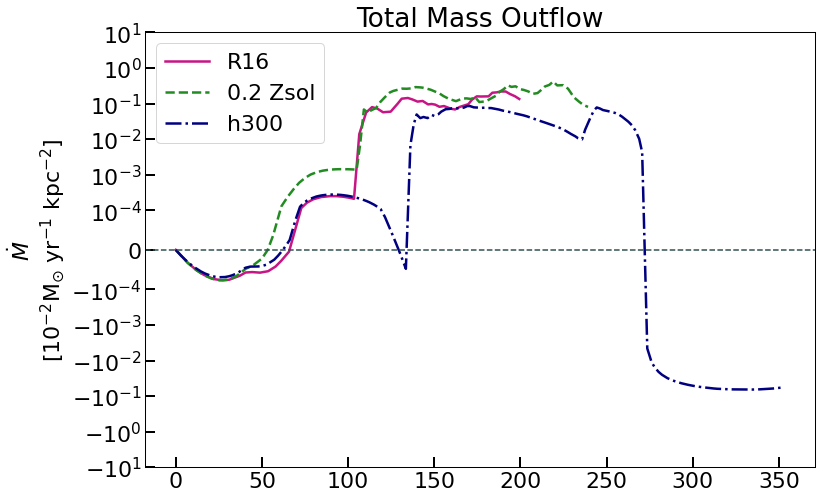

In [9]:


fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))

folder_list = ['SetonixData/R16/4pc/', 'SetonixData/R16-0.2Zsol/4pc/',\
                  'SummitData/GasGravity/Production2pc/R16-h300-Zsol/']
    

label= ['R16', '0.2 Zsol', 'h300']
ls = ['-', '--', '-.']

# colors =  sns.color_palette("rocket", len(folder_list))
colors = ['mediumvioletred', 'forestgreen', 'navy', 'forestgreen', \
         'mediumvioletred', 'forestgreen']

k=0
for folder in folder_list:
    if(source=='Summit'):
        data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder)
    else:
        data_path = os.path.join(scratch, 'sims/', folder)

    os.chdir(data_path)
    list_file = glob.glob("proj_y_*")
    
    infile   = os.path.join(data_path, 'metal_uniform.in')
    dom_min, dom_max, ncells = getdomain(infile)
    fac = 1
    zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
    xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
    yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

    dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
    munit = dx*yr_to_sec/Msun/1.e-2
    
    timestep = np.zeros((len(list_file)))
    tot_mass_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))

    tot_scalar_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))
    
    height = 4. * kpc
    
    index = min(range(zrange.shape[0]), key=lambda i: abs(zrange[i] - height))
    
    i = 0 
    for f in list_file:
        inputfile = os.path.join(data_path, f)
    
        ds   = yt.load(inputfile)
        data = ds.covering_grid(level=0, left_edge=dom_min, dims=ds.domain_dimensions, num_ghost_zones=0)
        timestep[i] = ds.current_time.to('Myr')
        tot_mass_flux[i,:] = np.array(data['mass_outflow'])[:,0,:]
        print(timestep[i])
        i+=1
        
    print('Max timestep = ', (timestep.shape))
    indexes = list(range(len(timestep)))
    indexes.sort(key=timestep.__getitem__)
    sorted_time = list(map(timestep.__getitem__, indexes))
    
    flux_sum = np.sum(tot_mass_flux[:,:,index], axis=1)
    sorted_mdot  = list(map(flux_sum.__getitem__, indexes))
    ax.plot(sorted_time, np.asarray(sorted_mdot)*munit, ls=ls[k],\
            label=label[k],markersize=12, lw=2.5, color=colors[k])
    print(k)
    k+=1

ax.legend()
ax.set_ylabel('$\dot{M}$' + '\n' + '[$10^{-2} $M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$]')
ax.set_title('Total Mass Outflow')
ax.axhline(0.0, ls='--', color='darkslategray')
ax.set_yscale('Symlog', linthresh=1.e-4)
ax.set_ylim(-10., 10.)

# Mass Outflow Rate for R4s

In [21]:
def get_folder_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            # Skip if it is symbolic link
            if not os.path.islink(file_path):
                total_size += os.path.getsize(file_path)
    return total_size

In [ ]:


fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))

folder_list = ['SummitData/GasGravity/Production2pc/R4/',\
               'SummitData/GasGravity/Production2pc/R4-0.2Zsol/',\
               'SummitData/GasGravity/Production2pc/R4-h75-0.2Zsol']
    

label= ['R4', '0.2 Zsol', 'h75']
ls = ['-', '--', '-.']

# colors =  sns.color_palette("rocket", len(folder_list))
colors = ['mediumvioletred', 'forestgreen', 'navy', 'forestgreen', \
         'mediumvioletred', 'forestgreen']

k=0
for folder in folder_list:
    if(source=='Summit'):
        data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder)
    else:
        data_path = os.path.join(scratch, 'sims/', folder)

    os.chdir(data_path)
    list_file = glob.glob("proj_y_*")
    
    file_size = get_folder_size(inputfile) / (1024 * 1024)
        
    if(file_size<1.):
        print('Skipping ', inputfile, '\n')
        continue
    
    infile   = os.path.join(data_path, 'metal_uniform.in')
    dom_min, dom_max, ncells = getdomain(infile)
    fac = 1
    zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
    xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
    yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

    dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
    munit = dx*yr_to_sec/Msun/1.e-2
    
    timestep = np.zeros((len(list_file)))
    tot_mass_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))

    tot_scalar_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))
    
    height = 2. * kpc
    
    index = min(range(zrange.shape[0]), key=lambda i: abs(zrange[i] - height))
    
    i = 0 
    for f in list_file:
        inputfile = os.path.join(data_path, f)
    
        ds   = yt.load(inputfile)
        data = ds.covering_grid(level=0, left_edge=dom_min, dims=ds.domain_dimensions, num_ghost_zones=0)
        timestep[i] = ds.current_time.to('Myr')
        tot_mass_flux[i,:] = np.array(data['mass_outflow'])[:,0,:]
        print(timestep[i])
        i+=1
        
    print('Max timestep = ', (timestep.shape))
    indexes = list(range(len(timestep)))
    indexes.sort(key=timestep.__getitem__)
    sorted_time = list(map(timestep.__getitem__, indexes))
    
    flux_sum = np.sum(tot_mass_flux[:,:,index], axis=1)
    sorted_mdot  = list(map(flux_sum.__getitem__, indexes))
    ax.plot(sorted_time, np.asarray(sorted_mdot)*munit, ls=ls[k],\
            label=label[k],markersize=12, lw=2.5, color=colors[k])
    print(k)
    k+=1

ax.legend()
ax.set_ylabel('$\dot{M}$' + '\n' + '[$10^{-2} $M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$]')
ax.set_title('Total Mass Outflow')
ax.axhline(0.0, ls='--', color='darkslategray')
ax.set_yscale('Symlog', linthresh=1.e-4)
ax.set_ylim(-10., 10.)

yt : [INFO     ] 2024-08-12 16:52:12,858 Parameters: current_time              = 2504910968134104.5
yt : [INFO     ] 2024-08-12 16:52:12,860 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:12,861 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:12,863 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:13,518 Parameters: current_time              = 1050692855127933.4
yt : [INFO     ] 2024-08-12 16:52:13,520 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:13,521 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:13,522 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


79.37583872455778


yt : [INFO     ] 2024-08-12 16:52:14,151 Parameters: current_time              = 2448797312460666.5
yt : [INFO     ] 2024-08-12 16:52:14,152 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:14,154 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:14,155 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


33.29444745886675


yt : [INFO     ] 2024-08-12 16:52:14,805 Parameters: current_time              = 3591777269703311.0
yt : [INFO     ] 2024-08-12 16:52:14,806 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:14,807 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:14,809 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


77.59770427601168


yt : [INFO     ] 2024-08-12 16:52:15,489 Parameters: current_time              = 2433906000642081.0
yt : [INFO     ] 2024-08-12 16:52:15,491 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:15,492 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:15,493 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


113.81655353079167


yt : [INFO     ] 2024-08-12 16:52:16,101 Parameters: current_time              = 3080324443145361.5
yt : [INFO     ] 2024-08-12 16:52:16,102 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:16,103 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:16,105 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


77.12582707943827


yt : [INFO     ] 2024-08-12 16:52:16,773 Parameters: current_time              = 214909373151609.47
yt : [INFO     ] 2024-08-12 16:52:16,774 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:16,776 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:16,777 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


97.60959145009004


yt : [INFO     ] 2024-08-12 16:52:17,444 Parameters: current_time              = 2440984189995762.0
yt : [INFO     ] 2024-08-12 16:52:17,446 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:17,447 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:17,449 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


6.810067088486116


yt : [INFO     ] 2024-08-12 16:52:18,134 Parameters: current_time              = 926993871657302.5
yt : [INFO     ] 2024-08-12 16:52:18,136 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:18,137 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:18,139 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


77.35012136524203


yt : [INFO     ] 2024-08-12 16:52:18,803 Parameters: current_time              = 581946552158659.9
yt : [INFO     ] 2024-08-12 16:52:18,804 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:18,806 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:18,807 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


29.374663208143282


yt : [INFO     ] 2024-08-12 16:52:19,539 Parameters: current_time              = 1212068440092240.8
yt : [INFO     ] 2024-08-12 16:52:19,541 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:19,542 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:19,543 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


18.440773447874992


yt : [INFO     ] 2024-08-12 16:52:20,212 Parameters: current_time              = 3560567500984482.5
yt : [INFO     ] 2024-08-12 16:52:20,213 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:20,214 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:20,216 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


38.40813116625601


yt : [INFO     ] 2024-08-12 16:52:20,824 Parameters: current_time              = 2566686517269269.0
yt : [INFO     ] 2024-08-12 16:52:20,827 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:20,829 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:20,831 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


112.8275756389739


yt : [INFO     ] 2024-08-12 16:52:21,814 Parameters: current_time              = 911301341361844.0
yt : [INFO     ] 2024-08-12 16:52:21,816 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:21,817 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:21,819 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


81.33338775031272


yt : [INFO     ] 2024-08-12 16:52:22,471 Parameters: current_time              = 2332276844750609.5
yt : [INFO     ] 2024-08-12 16:52:22,473 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:22,474 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:22,476 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


28.877396930116486


yt : [INFO     ] 2024-08-12 16:52:23,251 Parameters: current_time              = 1774186051400837.8
yt : [INFO     ] 2024-08-12 16:52:23,253 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:23,254 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:23,255 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


73.90539346308368


yt : [INFO     ] 2024-08-12 16:52:23,938 Parameters: current_time              = 2279498421369463.0
yt : [INFO     ] 2024-08-12 16:52:23,939 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:23,941 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:23,942 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


56.220563395215024


yt : [INFO     ] 2024-08-12 16:52:24,609 Parameters: current_time              = 2715998787608790.0
yt : [INFO     ] 2024-08-12 16:52:24,611 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:24,612 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:24,614 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


72.23294614829591


yt : [INFO     ] 2024-08-12 16:52:25,266 Parameters: current_time              = 1465729751966798.5
yt : [INFO     ] 2024-08-12 16:52:25,268 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:25,269 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:25,270 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


86.0648080845435


yt : [INFO     ] 2024-08-12 16:52:25,954 Parameters: current_time              = 1283227387678827.2
yt : [INFO     ] 2024-08-12 16:52:25,955 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:25,956 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:25,958 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


46.446173091958784


yt : [INFO     ] 2024-08-12 16:52:26,848 Parameters: current_time              = 656323484409546.5
yt : [INFO     ] 2024-08-12 16:52:26,850 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:26,851 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:26,852 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


40.66302214613365


yt : [INFO     ] 2024-08-12 16:52:27,501 Parameters: current_time              = 3041955685999977.5
yt : [INFO     ] 2024-08-12 16:52:27,503 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:27,504 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:27,506 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


20.79763620837917


yt : [INFO     ] 2024-08-12 16:52:28,192 Parameters: current_time              = 2935876205784484.0
yt : [INFO     ] 2024-08-12 16:52:28,193 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:28,195 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:28,196 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


96.39375890435196


yt : [INFO     ] 2024-08-12 16:52:28,860 Parameters: current_time              = 1088888057980631.2
yt : [INFO     ] 2024-08-12 16:52:28,861 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:28,863 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:28,864 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


93.03230302001685


yt : [INFO     ] 2024-08-12 16:52:29,568 Parameters: current_time              = 1272226265578761.8
yt : [INFO     ] 2024-08-12 16:52:29,569 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:29,571 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:29,572 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


34.50478040093769


yt : [INFO     ] 2024-08-12 16:52:30,207 Parameters: current_time              = 507810616152567.0
yt : [INFO     ] 2024-08-12 16:52:30,208 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:30,210 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:30,211 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


40.31441762297392


yt : [INFO     ] 2024-08-12 16:52:30,947 Parameters: current_time              = 3191726798734642.0
yt : [INFO     ] 2024-08-12 16:52:30,948 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:30,950 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:30,951 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


16.09154739753869


yt : [INFO     ] 2024-08-12 16:52:31,648 Parameters: current_time              = 2622642423006847.0
yt : [INFO     ] 2024-08-12 16:52:31,649 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:31,651 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:31,652 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


101.13971907669284


yt : [INFO     ] 2024-08-12 16:52:32,342 Parameters: current_time              = 2294585255894276.0
yt : [INFO     ] 2024-08-12 16:52:32,344 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:32,345 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:32,346 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


83.10652340503863


yt : [INFO     ] 2024-08-12 16:52:32,988 Parameters: current_time              = 3600112942706822.0
yt : [INFO     ] 2024-08-12 16:52:32,990 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:32,991 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:32,993 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


72.7110190855539


yt : [INFO     ] 2024-08-12 16:52:33,676 Parameters: current_time              = 1225705430888938.0
yt : [INFO     ] 2024-08-12 16:52:33,677 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:33,678 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:33,680 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


114.08069506891594


yt : [INFO     ] 2024-08-12 16:52:34,347 Parameters: current_time              = 3357591845060962.5
yt : [INFO     ] 2024-08-12 16:52:34,348 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:34,350 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:34,351 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


38.84026132814086


yt : [INFO     ] 2024-08-12 16:52:35,005 Parameters: current_time              = 1205681332723408.8
yt : [INFO     ] 2024-08-12 16:52:35,007 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:35,008 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:35,010 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


106.39566522995926


yt : [INFO     ] 2024-08-12 16:52:35,632 Parameters: current_time              = 642008765513454.6
yt : [INFO     ] 2024-08-12 16:52:35,633 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:35,635 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:35,636 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


38.205735947074835


yt : [INFO     ] 2024-08-12 16:52:36,230 Parameters: current_time              = 1007286148492894.5
yt : [INFO     ] 2024-08-12 16:52:36,232 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:36,233 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:36,235 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


20.34403013896667


yt : [INFO     ] 2024-08-12 16:52:36,927 Parameters: current_time              = 2910485319927567.0
yt : [INFO     ] 2024-08-12 16:52:36,928 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:36,929 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:36,931 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


31.918971927297846


yt : [INFO     ] 2024-08-12 16:52:37,557 Parameters: current_time              = 1192065411691861.5
yt : [INFO     ] 2024-08-12 16:52:37,558 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:37,559 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:37,561 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


92.22771439930689


yt : [INFO     ] 2024-08-12 16:52:38,209 Parameters: current_time              = 2543763326583979.5
yt : [INFO     ] 2024-08-12 16:52:38,210 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:38,213 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:38,215 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


37.77427344575828


yt : [INFO     ] 2024-08-12 16:52:38,872 Parameters: current_time              = 2464036941169633.0
yt : [INFO     ] 2024-08-12 16:52:38,873 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:38,874 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:38,876 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


80.60699567089955


yt : [INFO     ] 2024-08-12 16:52:39,517 Parameters: current_time              = 2558367108897428.5
yt : [INFO     ] 2024-08-12 16:52:39,519 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:39,520 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:39,521 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


78.08061896879461


yt : [INFO     ] 2024-08-12 16:52:40,245 Parameters: current_time              = 2862362037333624.0
yt : [INFO     ] 2024-08-12 16:52:40,246 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:40,248 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:40,249 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


81.06976160726508


yt : [INFO     ] 2024-08-12 16:52:40,945 Parameters: current_time              = 2130761614778101.0
yt : [INFO     ] 2024-08-12 16:52:40,946 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:40,947 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:40,949 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


90.70277959457069


yt : [INFO     ] 2024-08-12 16:52:41,580 Parameters: current_time              = 804525416676271.4
yt : [INFO     ] 2024-08-12 16:52:41,582 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:41,583 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:41,585 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


67.51976115985059


yt : [INFO     ] 2024-08-12 16:52:42,236 Parameters: current_time              = 551264428045253.7
yt : [INFO     ] 2024-08-12 16:52:42,237 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:42,239 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:42,240 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


25.493872052255917


yt : [INFO     ] 2024-08-12 16:52:42,853 Parameters: current_time              = 1434566530284600.0
yt : [INFO     ] 2024-08-12 16:52:42,854 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:42,856 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:42,857 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


17.46851560464844


yt : [INFO     ] 2024-08-12 16:52:43,565 Parameters: current_time              = 934587498846457.2
yt : [INFO     ] 2024-08-12 16:52:43,567 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:43,568 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:43,569 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


45.45867018672523


yt : [INFO     ] 2024-08-12 16:52:44,257 Parameters: current_time              = 327808348215316.1
yt : [INFO     ] 2024-08-12 16:52:44,259 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:44,260 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:44,262 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


29.615290733340217


yt : [INFO     ] 2024-08-12 16:52:44,915 Parameters: current_time              = 1996956661828641.0
yt : [INFO     ] 2024-08-12 16:52:44,916 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:44,918 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:44,919 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


10.387619724418718


yt : [INFO     ] 2024-08-12 16:52:45,534 Parameters: current_time              = 1737522556032011.2
yt : [INFO     ] 2024-08-12 16:52:45,535 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:45,537 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:45,538 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


63.27973806083609


yt : [INFO     ] 2024-08-12 16:52:46,485 Parameters: current_time              = 2512382046984065.0
yt : [INFO     ] 2024-08-12 16:52:46,487 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:46,488 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:46,490 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


55.05876733439841


yt : [INFO     ] 2024-08-12 16:52:47,122 Parameters: current_time              = 1043674437044848.4
yt : [INFO     ] 2024-08-12 16:52:47,124 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:47,125 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:47,126 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


79.61258292722086


yt : [INFO     ] 2024-08-12 16:52:47,764 Parameters: current_time              = 2677023354625149.0
yt : [INFO     ] 2024-08-12 16:52:47,765 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:47,766 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:47,768 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


33.07204721033438


yt : [INFO     ] 2024-08-12 16:52:48,452 Parameters: current_time              = 441537433681956.5
yt : [INFO     ] 2024-08-12 16:52:48,453 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:48,455 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:48,456 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


84.82975114156808


yt : [INFO     ] 2024-08-12 16:52:49,073 Parameters: current_time              = 3265226651056877.5
yt : [INFO     ] 2024-08-12 16:52:49,075 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:49,076 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:49,077 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


13.991476971694821


yt : [INFO     ] 2024-08-12 16:52:49,799 Parameters: current_time              = 1065987828647827.0
yt : [INFO     ] 2024-08-12 16:52:49,801 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:49,802 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:49,803 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


103.468788851398


yt : [INFO     ] 2024-08-12 16:52:50,464 Parameters: current_time              = 959652423421123.5
yt : [INFO     ] 2024-08-12 16:52:50,466 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:50,467 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:50,468 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


33.77911592287839


yt : [INFO     ] 2024-08-12 16:52:51,105 Parameters: current_time              = 269837066423418.8
yt : [INFO     ] 2024-08-12 16:52:51,107 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:51,108 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:51,110 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


30.409550264314255


yt : [INFO     ] 2024-08-12 16:52:51,821 Parameters: current_time              = 1941975280208329.0
yt : [INFO     ] 2024-08-12 16:52:51,822 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:51,823 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:51,825 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


8.550620656305258


yt : [INFO     ] 2024-08-12 16:52:52,464 Parameters: current_time              = 1302955625705895.5
yt : [INFO     ] 2024-08-12 16:52:52,466 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:52,467 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:52,468 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


61.537483211915


yt : [INFO     ] 2024-08-12 16:52:53,097 Parameters: current_time              = 3288063141394097.5
yt : [INFO     ] 2024-08-12 16:52:53,098 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:53,100 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:53,101 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


41.288172285151454


yt : [INFO     ] 2024-08-12 16:52:53,782 Parameters: current_time              = 2076210258321819.8
yt : [INFO     ] 2024-08-12 16:52:53,783 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:53,785 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:53,787 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


104.19243356256806


yt : [INFO     ] 2024-08-12 16:52:54,457 Parameters: current_time              = 1474044575907297.5
yt : [INFO     ] 2024-08-12 16:52:54,459 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:54,460 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:54,461 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


65.79113298608955


yt : [INFO     ] 2024-08-12 16:52:55,148 Parameters: current_time              = 2425686628286336.5
yt : [INFO     ] 2024-08-12 16:52:55,150 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:55,151 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:55,153 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


46.7096539631435


yt : [INFO     ] 2024-08-12 16:52:55,811 Parameters: current_time              = 2614351151606305.5
yt : [INFO     ] 2024-08-12 16:52:55,812 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:55,813 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:55,815 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


76.86537088645323


yt : [INFO     ] 2024-08-12 16:52:56,465 Parameters: current_time              = 2952699463140682.5
yt : [INFO     ] 2024-08-12 16:52:56,466 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:56,467 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:56,469 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


82.84378886880832


yt : [INFO     ] 2024-08-12 16:52:57,113 Parameters: current_time              = 1175897204594430.8
yt : [INFO     ] 2024-08-12 16:52:57,114 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:57,116 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:57,117 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


93.56539987643808


yt : [INFO     ] 2024-08-12 16:52:58,083 Parameters: current_time              = 1412188266585595.0
yt : [INFO     ] 2024-08-12 16:52:58,085 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:58,086 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:58,088 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


37.26193387945949


yt : [INFO     ] 2024-08-12 16:52:58,816 Parameters: current_time              = 887630924249290.0
yt : [INFO     ] 2024-08-12 16:52:58,818 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:58,819 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:58,820 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


44.74954580150566


yt : [INFO     ] 2024-08-12 16:52:59,508 Parameters: current_time              = 1879942798229459.5
yt : [INFO     ] 2024-08-12 16:52:59,509 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:52:59,510 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:52:59,512 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


28.12732667405918


yt : [INFO     ] 2024-08-12 16:53:00,137 Parameters: current_time              = 3002087531579549.0
yt : [INFO     ] 2024-08-12 16:53:00,138 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:00,140 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:00,141 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


59.57179247564642


yt : [INFO     ] 2024-08-12 16:53:00,831 Parameters: current_time              = 2256690104046682.5
yt : [INFO     ] 2024-08-12 16:53:00,833 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:00,834 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:00,836 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


95.13041332609416


yt : [INFO     ] 2024-08-12 16:53:01,511 Parameters: current_time              = 1855690223917159.5
yt : [INFO     ] 2024-08-12 16:53:01,513 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:01,514 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:01,515 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


71.5101941860814


yt : [INFO     ] 2024-08-12 16:53:02,258 Parameters: current_time              = 531258075443463.3
yt : [INFO     ] 2024-08-12 16:53:02,260 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:02,261 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:02,262 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


58.803274771122


yt : [INFO     ] 2024-08-12 16:53:02,942 Parameters: current_time              = 1863271665936426.5
yt : [INFO     ] 2024-08-12 16:53:02,944 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:02,945 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:02,947 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


16.83455254656448


yt : [INFO     ] 2024-08-12 16:53:03,585 Parameters: current_time              = 1945670795288331.2
yt : [INFO     ] 2024-08-12 16:53:03,587 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:03,588 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:03,589 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


59.043516171585495


yt : [INFO     ] 2024-08-12 16:53:04,293 Parameters: current_time              = 3395968399032421.5
yt : [INFO     ] 2024-08-12 16:53:04,295 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:04,296 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:04,297 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


61.65458701828818


yt : [INFO     ] 2024-08-12 16:53:04,961 Parameters: current_time              = 2731227504752819.0
yt : [INFO     ] 2024-08-12 16:53:04,965 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:04,967 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:04,968 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


107.61174484220668


yt : [INFO     ] 2024-08-12 16:53:05,595 Parameters: current_time              = 2597332045368056.0
yt : [INFO     ] 2024-08-12 16:53:05,597 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:05,598 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:05,600 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


86.5473770106985


yt : [INFO     ] 2024-08-12 16:53:06,310 Parameters: current_time              = 3273398684481957.0
yt : [INFO     ] 2024-08-12 16:53:06,311 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:06,312 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:06,314 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


82.30448593581438


yt : [INFO     ] 2024-08-12 16:53:07,020 Parameters: current_time              = 1607581833091357.2
yt : [INFO     ] 2024-08-12 16:53:07,021 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:07,024 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:07,025 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


103.7277449641911


yt : [INFO     ] 2024-08-12 16:53:07,741 Parameters: current_time              = 2021310939988615.5
yt : [INFO     ] 2024-08-12 16:53:07,743 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:07,744 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:07,746 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


50.941194295236556


yt : [INFO     ] 2024-08-12 16:53:08,442 Parameters: current_time              = 3035427351891109.0
yt : [INFO     ] 2024-08-12 16:53:08,444 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:08,445 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:08,447 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


64.05147856581665


yt : [INFO     ] 2024-08-12 16:53:09,107 Parameters: current_time              = 2944342130656888.0
yt : [INFO     ] 2024-08-12 16:53:09,109 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:09,110 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:09,111 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


96.18688847983081


yt : [INFO     ] 2024-08-12 16:53:09,752 Parameters: current_time              = 1701112746599908.5
yt : [INFO     ] 2024-08-12 16:53:09,753 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:09,754 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:09,756 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


93.30057199080056


yt : [INFO     ] 2024-08-12 16:53:10,436 Parameters: current_time              = 2838454180090500.5
yt : [INFO     ] 2024-08-12 16:53:10,437 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:10,438 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:10,440 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


53.90501009582188


yt : [INFO     ] 2024-08-12 16:53:11,392 Parameters: current_time              = 1665741566530711.5
yt : [INFO     ] 2024-08-12 16:53:11,393 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:11,395 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:11,396 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


89.94518531480533


yt : [INFO     ] 2024-08-12 16:53:12,089 Parameters: current_time              = 3583176515197008.5
yt : [INFO     ] 2024-08-12 16:53:12,091 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:12,092 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:12,093 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


52.78416503570333


yt : [INFO     ] 2024-08-12 16:53:12,735 Parameters: current_time              = 2107336581865247.0
yt : [INFO     ] 2024-08-12 16:53:12,737 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:12,738 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:12,740 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


113.54401206672904


yt : [INFO     ] 2024-08-12 16:53:13,415 Parameters: current_time              = 1751622240554049.8
yt : [INFO     ] 2024-08-12 16:53:13,417 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:13,418 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:13,419 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


66.77746665986156


yt : [INFO     ] 2024-08-12 16:53:14,115 Parameters: current_time              = 2401265588263131.0
yt : [INFO     ] 2024-08-12 16:53:14,117 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:14,118 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:14,119 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


55.50555937568287


yt : [INFO     ] 2024-08-12 16:53:14,792 Parameters: current_time              = 2894038281402527.5
yt : [INFO     ] 2024-08-12 16:53:14,794 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:14,795 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:14,796 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


76.09151482568798


yt : [INFO     ] 2024-08-12 16:53:15,487 Parameters: current_time              = 2543763326583979.5
yt : [INFO     ] 2024-08-12 16:53:15,488 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:15,490 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:15,491 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


91.70653919824471


yt : [INFO     ] 2024-08-12 16:53:16,123 Parameters: current_time              = 1602376216946334.2
yt : [INFO     ] 2024-08-12 16:53:16,124 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:16,125 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:16,127 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


80.60699567089955


yt : [INFO     ] 2024-08-12 16:53:16,772 Parameters: current_time              = 3536235399076238.0
yt : [INFO     ] 2024-08-12 16:53:16,774 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:16,775 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:16,776 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


50.776238273706944


yt : [INFO     ] 2024-08-12 16:53:17,298 Parameters: current_time              = 539044198996489.0
yt : [INFO     ] 2024-08-12 16:53:17,299 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:17,301 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:17,302 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


112.05653785700554


yt : [INFO     ] 2024-08-12 16:53:18,042 Parameters: current_time              = 391143676637263.5
yt : [INFO     ] 2024-08-12 16:53:18,043 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:18,044 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:18,046 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


17.08127991344364


yt : [INFO     ] 2024-08-12 16:53:18,775 Parameters: current_time              = 1847644772650914.0
yt : [INFO     ] 2024-08-12 16:53:18,776 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:18,778 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:18,779 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


12.394595173183749


yt : [INFO     ] 2024-08-12 16:53:19,434 Parameters: current_time              = 1939132233265364.2
yt : [INFO     ] 2024-08-12 16:53:19,436 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:19,437 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:19,439 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


58.54832980489372


yt : [INFO     ] 2024-08-12 16:53:20,095 Parameters: current_time              = 3027075079963050.5
yt : [INFO     ] 2024-08-12 16:53:20,096 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:20,097 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:20,098 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


61.44739249072693


yt : [INFO     ] 2024-08-12 16:53:20,752 Parameters: current_time              = 1184012130684696.8
yt : [INFO     ] 2024-08-12 16:53:20,754 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:20,755 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:20,757 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


95.92222095352786


yt : [INFO     ] 2024-08-12 16:53:21,449 Parameters: current_time              = 433182657452795.06
yt : [INFO     ] 2024-08-12 16:53:21,451 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:21,452 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:21,454 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


37.51908037001219


yt : [INFO     ] 2024-08-12 16:53:22,136 Parameters: current_time              = 1803333119541345.5
yt : [INFO     ] 2024-08-12 16:53:22,138 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:22,139 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:22,140 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


13.726730088878591


yt : [INFO     ] 2024-08-12 16:53:22,763 Parameters: current_time              = 1831769032420208.5
yt : [INFO     ] 2024-08-12 16:53:22,765 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:22,766 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:22,768 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


57.144178249972924


yt : [INFO     ] 2024-08-12 16:53:23,434 Parameters: current_time              = 382305302901537.94
yt : [INFO     ] 2024-08-12 16:53:23,436 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:23,437 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:23,438 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


58.04525795435041


yt : [INFO     ] 2024-08-12 16:53:24,128 Parameters: current_time              = 1249100329896961.2
yt : [INFO     ] 2024-08-12 16:53:24,129 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:24,131 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:24,132 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


12.114524010112872


yt : [INFO     ] 2024-08-12 16:53:24,795 Parameters: current_time              = 2846090195054046.5
yt : [INFO     ] 2024-08-12 16:53:24,797 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:24,798 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:24,800 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


39.58160094230744


yt : [INFO     ] 2024-08-12 16:53:25,431 Parameters: current_time              = 2122646654375540.5
yt : [INFO     ] 2024-08-12 16:53:25,433 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:25,434 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:25,435 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


90.1871560275194


yt : [INFO     ] 2024-08-12 16:53:26,123 Parameters: current_time              = 1963971469346809.5
yt : [INFO     ] 2024-08-12 16:53:26,124 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:26,126 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:26,127 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


67.26261358200688


yt : [INFO     ] 2024-08-12 16:53:26,774 Parameters: current_time              = 2091900655627176.8
yt : [INFO     ] 2024-08-12 16:53:26,775 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:26,776 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:26,778 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


62.23450038490917


yt : [INFO     ] 2024-08-12 16:53:27,432 Parameters: current_time              = 1535009682860099.5
yt : [INFO     ] 2024-08-12 16:53:27,434 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:27,435 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:27,436 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


66.28833167373871


yt : [INFO     ] 2024-08-12 16:53:28,105 Parameters: current_time              = 698637317524386.8
yt : [INFO     ] 2024-08-12 16:53:28,106 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:28,107 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:28,108 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


48.64152162585556


yt : [INFO     ] 2024-08-12 16:53:28,777 Parameters: current_time              = 3294868329653781.5
yt : [INFO     ] 2024-08-12 16:53:28,779 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:28,780 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:28,782 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


22.138480667870393


yt : [INFO     ] 2024-08-12 16:53:29,511 Parameters: current_time              = 1918398061268993.0
yt : [INFO     ] 2024-08-12 16:53:29,513 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:29,514 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:29,515 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


104.40807696573191


yt : [INFO     ] 2024-08-12 16:53:30,165 Parameters: current_time              = 3199719286226427.0
yt : [INFO     ] 2024-08-12 16:53:30,166 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:30,168 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:30,169 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


60.79036622775474


yt : [INFO     ] 2024-08-12 16:53:30,833 Parameters: current_time              = 2700048457955883.5
yt : [INFO     ] 2024-08-12 16:53:30,835 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:30,836 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:30,838 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


101.39298572218505


yt : [INFO     ] 2024-08-12 16:53:31,522 Parameters: current_time              = 943018261839917.1
yt : [INFO     ] 2024-08-12 16:53:31,524 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:31,525 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:31,526 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


85.55937263783949


yt : [INFO     ] 2024-08-12 16:53:32,162 Parameters: current_time              = 2115175299701681.8
yt : [INFO     ] 2024-08-12 16:53:32,164 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:32,165 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:32,167 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


29.882445491416238


yt : [INFO     ] 2024-08-12 16:53:32,808 Parameters: current_time              = 1795573848480963.0
yt : [INFO     ] 2024-08-12 16:53:32,810 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:32,811 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:32,812 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


67.0258606390119


yt : [INFO     ] 2024-08-12 16:53:33,452 Parameters: current_time              = 589719769815966.4
yt : [INFO     ] 2024-08-12 16:53:33,454 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:33,455 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:33,457 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


56.898301787238665


yt : [INFO     ] 2024-08-12 16:53:34,113 Parameters: current_time              = 1371980597068357.5
yt : [INFO     ] 2024-08-12 16:53:34,114 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:34,116 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:34,117 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


18.68709185159728


yt : [INFO     ] 2024-08-12 16:53:34,856 Parameters: current_time              = 1541037925400335.2
yt : [INFO     ] 2024-08-12 16:53:34,857 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:34,859 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:34,860 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


43.47544163904598


yt : [INFO     ] 2024-08-12 16:53:35,831 Parameters: current_time              = 712954641479508.5
yt : [INFO     ] 2024-08-12 16:53:35,832 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:35,834 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:35,835 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


48.832545104834814


yt : [INFO     ] 2024-08-12 16:53:36,507 Parameters: current_time              = 2480616999437985.0
yt : [INFO     ] 2024-08-12 16:53:36,508 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:36,510 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:36,511 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


22.59216928662219


yt : [INFO     ] 2024-08-12 16:53:37,173 Parameters: current_time              = 2332276844750609.5
yt : [INFO     ] 2024-08-12 16:53:37,175 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:37,176 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:37,177 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


78.60600931116387


yt : [INFO     ] 2024-08-12 16:53:37,862 Parameters: current_time              = 62346287220855.555
yt : [INFO     ] 2024-08-12 16:53:37,863 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:37,865 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:37,866 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


73.90539346308368


yt : [INFO     ] 2024-08-12 16:53:38,502 Parameters: current_time              = 2264682203623799.5
yt : [INFO     ] 2024-08-12 16:53:38,504 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:38,505 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:38,507 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


1.9756346243331417


yt : [INFO     ] 2024-08-12 16:53:39,174 Parameters: current_time              = 1781468571047403.2
yt : [INFO     ] 2024-08-12 16:53:39,176 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:39,177 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:39,178 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


71.76344853929955


yt : [INFO     ] 2024-08-12 16:53:39,830 Parameters: current_time              = 2456011424948210.5
yt : [INFO     ] 2024-08-12 16:53:39,831 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:39,833 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:39,834 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


56.451332517282786


yt : [INFO     ] 2024-08-12 16:53:40,507 Parameters: current_time              = 232554673987917.62
yt : [INFO     ] 2024-08-12 16:53:40,508 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:40,510 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:40,511 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


77.82630570601727


yt : [INFO     ] 2024-08-12 16:53:41,162 Parameters: current_time              = 3364904455012622.0
yt : [INFO     ] 2024-08-12 16:53:41,164 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:41,165 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:41,166 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


7.369212930892008


yt : [INFO     ] 2024-08-12 16:53:41,801 Parameters: current_time              = 735220331872332.0
yt : [INFO     ] 2024-08-12 16:53:41,802 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:41,803 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:41,805 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


106.62738785625719


yt : [INFO     ] 2024-08-12 16:53:42,421 Parameters: current_time              = 1096770991859605.0
yt : [INFO     ] 2024-08-12 16:53:42,423 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:42,424 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:42,426 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


23.297726439029965


yt : [INFO     ] 2024-08-12 16:53:43,116 Parameters: current_time              = 1141542949817251.8
yt : [INFO     ] 2024-08-12 16:53:43,118 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:43,119 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:43,121 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


34.754575501926794


yt : [INFO     ] 2024-08-12 16:53:43,875 Parameters: current_time              = 1708597375944299.0
yt : [INFO     ] 2024-08-12 16:53:43,876 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:43,878 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:43,879 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


36.173313237294714


yt : [INFO     ] 2024-08-12 16:53:44,656 Parameters: current_time              = 2386096449653589.5
yt : [INFO     ] 2024-08-12 16:53:44,658 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:44,659 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:44,660 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


54.14218368774238


yt : [INFO     ] 2024-08-12 16:53:45,321 Parameters: current_time              = 596958841056977.4
yt : [INFO     ] 2024-08-12 16:53:45,323 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:45,324 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:45,326 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


75.61083382936565


yt : [INFO     ] 2024-08-12 16:53:45,970 Parameters: current_time              = 1972476318198840.0
yt : [INFO     ] 2024-08-12 16:53:45,971 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:45,972 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:45,974 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


18.91648417677445


yt : [INFO     ] 2024-08-12 16:53:46,658 Parameters: current_time              = 1615641907307663.2
yt : [INFO     ] 2024-08-12 16:53:46,660 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:46,661 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:46,662 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


62.50400278217735


yt : [INFO     ] 2024-08-12 16:53:47,274 Parameters: current_time              = 1563993360591426.2
yt : [INFO     ] 2024-08-12 16:53:47,276 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:47,277 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:47,279 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


51.19660263479045


yt : [INFO     ] 2024-08-12 16:53:47,922 Parameters: current_time              = 1481036222772469.0
yt : [INFO     ] 2024-08-12 16:53:47,923 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:47,924 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:47,926 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


49.55995895097936


yt : [INFO     ] 2024-08-12 16:53:48,562 Parameters: current_time              = 406984348846177.94
yt : [INFO     ] 2024-08-12 16:53:48,563 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:48,565 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:48,566 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


46.93120588297174


yt : [INFO     ] 2024-08-12 16:53:49,215 Parameters: current_time              = 2589994664691486.5
yt : [INFO     ] 2024-08-12 16:53:49,216 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:49,218 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:49,219 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


12.896555785173078


yt : [INFO     ] 2024-08-12 16:53:49,851 Parameters: current_time              = 2083721821741568.0
yt : [INFO     ] 2024-08-12 16:53:49,853 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:49,854 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:49,855 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


82.07197837261029


yt : [INFO     ] 2024-08-12 16:53:50,567 Parameters: current_time              = 151060713402196.84
yt : [INFO     ] 2024-08-12 16:53:50,568 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:50,569 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:50,571 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


66.02916006735518


yt : [INFO     ] 2024-08-12 16:53:51,237 Parameters: current_time              = 3419944249416673.0
yt : [INFO     ] 2024-08-12 16:53:51,239 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:51,240 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:51,241 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


4.7868251515386735


yt : [INFO     ] 2024-08-12 16:53:51,919 Parameters: current_time              = 2960540784127767.5
yt : [INFO     ] 2024-08-12 16:53:51,921 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:51,922 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:51,923 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


108.37149369459885


yt : [INFO     ] 2024-08-12 16:53:52,624 Parameters: current_time              = 3544331377290055.5
yt : [INFO     ] 2024-08-12 16:53:52,625 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:52,627 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:52,628 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


93.81387634445483


yt : [INFO     ] 2024-08-12 16:53:53,275 Parameters: current_time              = 51051238237205.42
yt : [INFO     ] 2024-08-12 16:53:53,277 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:53,278 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:53,280 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


112.31308392558545


yt : [INFO     ] 2024-08-12 16:53:53,915 Parameters: current_time              = 2581571759055028.5
yt : [INFO     ] 2024-08-12 16:53:53,916 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:53,918 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:53,919 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


1.617716120275478


yt : [INFO     ] 2024-08-12 16:53:54,634 Parameters: current_time              = 3412709394596812.5
yt : [INFO     ] 2024-08-12 16:53:54,636 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:54,637 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:54,638 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


81.80507259915292


yt : [INFO     ] 2024-08-12 16:53:55,314 Parameters: current_time              = 1723018087391859.2
yt : [INFO     ] 2024-08-12 16:53:55,315 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:55,317 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:55,318 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


108.14223497974537


yt : [INFO     ] 2024-08-12 16:53:56,046 Parameters: current_time              = 1081544212433831.6
yt : [INFO     ] 2024-08-12 16:53:56,048 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:56,049 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:56,051 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


54.59914845843344


yt : [INFO     ] 2024-08-12 16:53:56,763 Parameters: current_time              = 3256519978837513.0
yt : [INFO     ] 2024-08-12 16:53:56,764 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:56,766 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:56,767 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


34.27206797835804


yt : [INFO     ] 2024-08-12 16:53:57,484 Parameters: current_time              = 1744680953821677.0
yt : [INFO     ] 2024-08-12 16:53:57,485 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:57,487 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:57,488 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


103.19289105754281


yt : [INFO     ] 2024-08-12 16:53:58,153 Parameters: current_time              = 2099647914865307.5
yt : [INFO     ] 2024-08-12 16:53:58,154 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:58,156 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:58,157 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


55.28560327216509


yt : [INFO     ] 2024-08-12 16:53:58,774 Parameters: current_time              = 3404023412012107.5
yt : [INFO     ] 2024-08-12 16:53:58,776 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:58,777 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:58,778 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


66.53382750479464


yt : [INFO     ] 2024-08-12 16:53:59,436 Parameters: current_time              = 133341642922125.73
yt : [INFO     ] 2024-08-12 16:53:59,438 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:53:59,439 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:53:59,440 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


107.86699280085011


yt : [INFO     ] 2024-08-12 16:54:00,443 Parameters: current_time              = 2535382450504614.5
yt : [INFO     ] 2024-08-12 16:54:00,445 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:00,446 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:00,448 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


4.225341690183212


yt : [INFO     ] 2024-08-12 16:54:01,230 Parameters: current_time              = 634431551635978.8
yt : [INFO     ] 2024-08-12 16:54:01,231 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:01,233 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:01,234 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


80.34142173373813


yt : [INFO     ] 2024-08-12 16:54:01,891 Parameters: current_time              = 902896850979341.8
yt : [INFO     ] 2024-08-12 16:54:01,892 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:01,893 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:01,895 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


20.103922720231537


yt : [INFO     ] 2024-08-12 16:54:02,538 Parameters: current_time              = 2927609660506769.0
yt : [INFO     ] 2024-08-12 16:54:02,539 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:02,541 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:02,542 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


28.61107470084359


yt : [INFO     ] 2024-08-12 16:54:03,243 Parameters: current_time              = 649443190060082.9
yt : [INFO     ] 2024-08-12 16:54:03,245 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:03,246 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:03,247 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


92.77035200733798


yt : [INFO     ] 2024-08-12 16:54:03,893 Parameters: current_time              = 2496087031749411.0
yt : [INFO     ] 2024-08-12 16:54:03,894 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:03,896 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:03,897 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


20.579612836846998


yt : [INFO     ] 2024-08-12 16:54:04,600 Parameters: current_time              = 373554363202854.44
yt : [INFO     ] 2024-08-12 16:54:04,601 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:04,603 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:04,604 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


79.0962250535342


yt : [INFO     ] 2024-08-12 16:54:05,365 Parameters: current_time              = 1993398903055398.2
yt : [INFO     ] 2024-08-12 16:54:05,366 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:05,368 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:05,369 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


11.837223464485715


yt : [INFO     ] 2024-08-12 16:54:06,011 Parameters: current_time              = 1233838796007846.0
yt : [INFO     ] 2024-08-12 16:54:06,013 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:06,014 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:06,016 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


63.16699948840844


yt : [INFO     ] 2024-08-12 16:54:06,661 Parameters: current_time              = 1104372838354758.9
yt : [INFO     ] 2024-08-12 16:54:06,662 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:06,663 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:06,665 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


39.09799211625238


yt : [INFO     ] 2024-08-12 16:54:07,387 Parameters: current_time              = 560442144608906.4
yt : [INFO     ] 2024-08-12 16:54:07,388 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:07,390 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:07,392 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


34.995463481213996


yt : [INFO     ] 2024-08-12 16:54:08,101 Parameters: current_time              = 1839547909959052.2
yt : [INFO     ] 2024-08-12 16:54:08,103 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:08,104 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:08,106 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


17.759339893049738


yt : [INFO     ] 2024-08-12 16:54:08,783 Parameters: current_time              = 878833451217601.1
yt : [INFO     ] 2024-08-12 16:54:08,785 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:08,786 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:08,787 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


58.29175570889587


yt : [INFO     ] 2024-08-12 16:54:09,441 Parameters: current_time              = 2778025184612183.5
yt : [INFO     ] 2024-08-12 16:54:09,442 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:09,444 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:09,445 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


27.848551576089474


yt : [INFO     ] 2024-08-12 16:54:10,122 Parameters: current_time              = 1687424977882918.2
yt : [INFO     ] 2024-08-12 16:54:10,124 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:10,125 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:10,126 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


88.03030599957485


yt : [INFO     ] 2024-08-12 16:54:10,794 Parameters: current_time              = 2902001357587875.0
yt : [INFO     ] 2024-08-12 16:54:10,795 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:10,797 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:10,798 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


53.47127087873977


yt : [INFO     ] 2024-08-12 16:54:11,398 Parameters: current_time              = 627461621447100.9
yt : [INFO     ] 2024-08-12 16:54:11,400 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:11,401 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:11,402 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


91.9588738556758


yt : [INFO     ] 2024-08-12 16:54:12,019 Parameters: current_time              = 2369333812241365.5
yt : [INFO     ] 2024-08-12 16:54:12,021 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:12,022 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:12,023 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


19.883058960348723


yt : [INFO     ] 2024-08-12 16:54:12,708 Parameters: current_time              = 95008327879013.48
yt : [INFO     ] 2024-08-12 16:54:12,709 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:12,711 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:12,712 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


75.07965790305236


yt : [INFO     ] 2024-08-12 16:54:13,440 Parameters: current_time              = 3110640042355547.0
yt : [INFO     ] 2024-08-12 16:54:13,442 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:13,443 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:13,445 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


3.010632236894234


yt : [INFO     ] 2024-08-12 16:54:14,203 Parameters: current_time              = 3064685236577671.5
yt : [INFO     ] 2024-08-12 16:54:14,205 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:14,206 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:14,208 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


98.57023481999731


yt : [INFO     ] 2024-08-12 16:54:14,882 Parameters: current_time              = 2770223952816514.0
yt : [INFO     ] 2024-08-12 16:54:14,884 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:14,885 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:14,887 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


97.11401489903135


yt : [INFO     ] 2024-08-12 16:54:15,565 Parameters: current_time              = 2582199197782625.0
yt : [INFO     ] 2024-08-12 16:54:15,566 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:15,568 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:15,569 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


87.78309988137609


yt : [INFO     ] 2024-08-12 16:54:16,212 Parameters: current_time              = 854280941505837.4
yt : [INFO     ] 2024-08-12 16:54:16,213 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:16,214 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:16,216 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


81.82495493265093


yt : [INFO     ] 2024-08-12 16:54:16,877 Parameters: current_time              = 3380325724434558.5
yt : [INFO     ] 2024-08-12 16:54:16,878 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:16,879 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:16,881 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


27.070529492288305


yt : [INFO     ] 2024-08-12 16:54:17,518 Parameters: current_time              = 984426551485352.9
yt : [INFO     ] 2024-08-12 16:54:17,520 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:17,521 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:17,522 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


107.11605839590331


yt : [INFO     ] 2024-08-12 16:54:18,163 Parameters: current_time              = 1629412211907226.5
yt : [INFO     ] 2024-08-12 16:54:18,165 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:18,166 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:18,168 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


31.194595009929554


yt : [INFO     ] 2024-08-12 16:54:18,813 Parameters: current_time              = 466578572769501.25
yt : [INFO     ] 2024-08-12 16:54:18,814 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:18,815 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:18,816 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


51.632957256167344


yt : [INFO     ] 2024-08-12 16:54:19,518 Parameters: current_time              = 2013165683872715.0
yt : [INFO     ] 2024-08-12 16:54:19,520 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:19,522 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:19,523 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


14.784982786064251


yt : [INFO     ] 2024-08-12 16:54:20,205 Parameters: current_time              = 499694073822719.8
yt : [INFO     ] 2024-08-12 16:54:20,207 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:20,208 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:20,209 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


63.793370974748235


yt : [INFO     ] 2024-08-12 16:54:20,875 Parameters: current_time              = 3453468176941515.5
yt : [INFO     ] 2024-08-12 16:54:20,877 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:20,878 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:20,879 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


15.83434969144421


yt : [INFO     ] 2024-08-12 16:54:21,566 Parameters: current_time              = 1338826002023948.5
yt : [INFO     ] 2024-08-12 16:54:21,568 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:21,569 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:21,571 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


109.43380285387721


yt : [INFO     ] 2024-08-12 16:54:22,229 Parameters: current_time              = 279815861430785.72
yt : [INFO     ] 2024-08-12 16:54:22,230 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:22,231 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:22,233 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


42.42483591984018


yt : [INFO     ] 2024-08-12 16:54:22,882 Parameters: current_time              = 2684742515623214.5
yt : [INFO     ] 2024-08-12 16:54:22,883 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:22,885 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:22,886 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


8.866829588776895


yt : [INFO     ] 2024-08-12 16:54:23,566 Parameters: current_time              = 1199078084731636.0
yt : [INFO     ] 2024-08-12 16:54:23,568 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:23,569 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:23,571 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


85.07435659312542


yt : [INFO     ] 2024-08-12 16:54:24,234 Parameters: current_time              = 1642992743434067.2
yt : [INFO     ] 2024-08-12 16:54:24,235 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:24,236 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:24,237 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


37.99649164485373


yt : [INFO     ] 2024-08-12 16:54:25,333 Parameters: current_time              = 692009124206478.5
yt : [INFO     ] 2024-08-12 16:54:25,335 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:25,336 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:25,337 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


52.06329833175106


yt : [INFO     ] 2024-08-12 16:54:26,081 Parameters: current_time              = 2528128012540447.5
yt : [INFO     ] 2024-08-12 16:54:26,083 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:26,084 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:26,085 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


21.928445895964156


yt : [INFO     ] 2024-08-12 16:54:26,820 Parameters: current_time              = 2417651362403283.0
yt : [INFO     ] 2024-08-12 16:54:26,821 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:26,823 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:26,824 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


80.11154246648819


yt : [INFO     ] 2024-08-12 16:54:27,455 Parameters: current_time              = 1917725971854686.0
yt : [INFO     ] 2024-08-12 16:54:27,457 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:27,458 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:27,459 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


76.61074867554196


yt : [INFO     ] 2024-08-12 16:54:28,108 Parameters: current_time              = 1380413507829893.5
yt : [INFO     ] 2024-08-12 16:54:28,109 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:28,110 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:28,112 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


60.7690689993753


yt : [INFO     ] 2024-08-12 16:54:28,730 Parameters: current_time              = 3072791066271065.5
yt : [INFO     ] 2024-08-12 16:54:28,731 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:28,733 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:28,734 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


43.7426644557854


yt : [INFO     ] 2024-08-12 16:54:29,395 Parameters: current_time              = 2740074993041166.5
yt : [INFO     ] 2024-08-12 16:54:29,396 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:29,397 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:29,398 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


97.37087314216117


yt : [INFO     ] 2024-08-12 16:54:30,052 Parameters: current_time              = 812366182382507.2
yt : [INFO     ] 2024-08-12 16:54:30,054 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:30,055 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:30,056 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


86.82773699651325


yt : [INFO     ] 2024-08-12 16:54:30,694 Parameters: current_time              = 692009124206478.5
yt : [INFO     ] 2024-08-12 16:54:30,695 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:30,697 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:30,698 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


25.742330924484346


yt : [INFO     ] 2024-08-12 16:54:31,392 Parameters: current_time              = 951380984318486.6
yt : [INFO     ] 2024-08-12 16:54:31,394 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:31,395 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:31,397 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


21.928445895964156


yt : [INFO     ] 2024-08-12 16:54:32,041 Parameters: current_time              = 1570733860110258.0
yt : [INFO     ] 2024-08-12 16:54:32,043 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:32,044 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:32,046 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


30.147444175681503


yt : [INFO     ] 2024-08-12 16:54:32,740 Parameters: current_time              = 2130761614778101.0
yt : [INFO     ] 2024-08-12 16:54:32,741 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:32,742 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:32,744 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


49.77355249164252


yt : [INFO     ] 2024-08-12 16:54:33,477 Parameters: current_time              = 1465989771868669.2
yt : [INFO     ] 2024-08-12 16:54:33,479 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:33,480 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:33,482 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


67.51976115985059


yt : [INFO     ] 2024-08-12 16:54:34,173 Parameters: current_time              = 104538632744860.16
yt : [INFO     ] 2024-08-12 16:54:34,175 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:34,176 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:34,178 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


46.45441262544266


yt : [INFO     ] 2024-08-12 16:54:34,859 Parameters: current_time              = 1443327035583298.5
yt : [INFO     ] 2024-08-12 16:54:34,865 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:34,868 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:34,870 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


3.312629374377651


yt : [INFO     ] 2024-08-12 16:54:35,517 Parameters: current_time              = 73376651252329.56
yt : [INFO     ] 2024-08-12 16:54:35,518 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:35,519 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:35,521 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


45.73627384792565


yt : [INFO     ] 2024-08-12 16:54:36,160 Parameters: current_time              = 992697344453300.2
yt : [INFO     ] 2024-08-12 16:54:36,161 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:36,162 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:36,164 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


2.3251657683831963


yt : [INFO     ] 2024-08-12 16:54:36,845 Parameters: current_time              = 177470803467919.88
yt : [INFO     ] 2024-08-12 16:54:36,846 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:36,848 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:36,849 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


31.456680623789524


yt : [INFO     ] 2024-08-12 16:54:37,558 Parameters: current_time              = 3301268091684203.5
yt : [INFO     ] 2024-08-12 16:54:37,560 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:37,561 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:37,563 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


5.623710404717719


yt : [INFO     ] 2024-08-12 16:54:38,251 Parameters: current_time              = 1816418173281058.2
yt : [INFO     ] 2024-08-12 16:54:38,252 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:38,254 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:38,255 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


104.61087318694082


yt : [INFO     ] 2024-08-12 16:54:38,937 Parameters: current_time              = 862158325272293.4
yt : [INFO     ] 2024-08-12 16:54:38,939 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:38,940 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:38,942 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


57.55881858192823


yt : [INFO     ] 2024-08-12 16:54:39,607 Parameters: current_time              = 1156181998411466.2
yt : [INFO     ] 2024-08-12 16:54:39,608 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:39,609 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:39,611 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


27.320148720824566


yt : [INFO     ] 2024-08-12 16:54:40,323 Parameters: current_time              = 568463675322651.0
yt : [INFO     ] 2024-08-12 16:54:40,324 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:40,326 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:40,327 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


36.63719669466202


yt : [INFO     ] 2024-08-12 16:54:40,937 Parameters: current_time              = 2249211132187354.8
yt : [INFO     ] 2024-08-12 16:54:40,939 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:40,940 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:40,942 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


18.013526862709806


yt : [INFO     ] 2024-08-12 16:54:41,606 Parameters: current_time              = 1585906273594097.2
yt : [INFO     ] 2024-08-12 16:54:41,608 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:41,609 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:41,610 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


71.27319986904438


yt : [INFO     ] 2024-08-12 16:54:42,254 Parameters: current_time              = 1972444693449730.0
yt : [INFO     ] 2024-08-12 16:54:42,256 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:42,257 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:42,259 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


50.25433726246917


yt : [INFO     ] 2024-08-12 16:54:42,904 Parameters: current_time              = 2004997691363400.0
yt : [INFO     ] 2024-08-12 16:54:42,906 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:42,907 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:42,908 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


62.50300065435046


yt : [INFO     ] 2024-08-12 16:54:43,597 Parameters: current_time              = 3126889437972416.5
yt : [INFO     ] 2024-08-12 16:54:43,599 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:43,600 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:43,602 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


63.534542910848735


yt : [INFO     ] 2024-08-12 16:54:44,293 Parameters: current_time              = 515771552428933.3
yt : [INFO     ] 2024-08-12 16:54:44,294 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:44,296 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:44,297 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


99.08514709522956


yt : [INFO     ] 2024-08-12 16:54:44,939 Parameters: current_time              = 1241518897749255.5
yt : [INFO     ] 2024-08-12 16:54:44,940 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:44,941 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:44,943 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


16.343814245346074


yt : [INFO     ] 2024-08-12 16:54:45,592 Parameters: current_time              = 1324435607891902.0
yt : [INFO     ] 2024-08-12 16:54:45,594 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:45,595 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:45,597 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


39.34135985465484


yt : [INFO     ] 2024-08-12 16:54:46,293 Parameters: current_time              = 3316609326157380.0
yt : [INFO     ] 2024-08-12 16:54:46,294 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:46,295 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:46,297 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


41.9688318469054


yt : [INFO     ] 2024-08-12 16:54:46,936 Parameters: current_time              = 3511856534974408.0
yt : [INFO     ] 2024-08-12 16:54:46,938 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:46,940 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:46,942 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


105.09700757210244


yt : [INFO     ] 2024-08-12 16:54:47,582 Parameters: current_time              = 611803789618419.6
yt : [INFO     ] 2024-08-12 16:54:47,583 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:47,584 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:47,586 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


111.28401827054047


yt : [INFO     ] 2024-08-12 16:54:48,271 Parameters: current_time              = 1918398061268993.0
yt : [INFO     ] 2024-08-12 16:54:48,272 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:48,274 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:48,275 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


19.386892210384175


yt : [INFO     ] 2024-08-12 16:54:48,961 Parameters: current_time              = 1162630225545707.8
yt : [INFO     ] 2024-08-12 16:54:48,963 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:48,964 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:48,966 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


60.79036622775474


yt : [INFO     ] 2024-08-12 16:54:49,950 Parameters: current_time              = 2317720812482431.0
yt : [INFO     ] 2024-08-12 16:54:49,951 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:49,953 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:49,954 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


36.84152868233667


yt : [INFO     ] 2024-08-12 16:54:50,596 Parameters: current_time              = 2302280257006988.5
yt : [INFO     ] 2024-08-12 16:54:50,597 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:50,598 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:50,600 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


73.4441406343458


yt : [INFO     ] 2024-08-12 16:54:51,279 Parameters: current_time              = 1650373210959860.5
yt : [INFO     ] 2024-08-12 16:54:51,281 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:51,282 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:51,283 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


72.9548589565426


yt : [INFO     ] 2024-08-12 16:54:51,911 Parameters: current_time              = 2393815396719998.0
yt : [INFO     ] 2024-08-12 16:54:51,912 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:51,913 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:51,914 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


52.297171234816986


yt : [INFO     ] 2024-08-12 16:54:52,610 Parameters: current_time              = 1956094093101822.8
yt : [INFO     ] 2024-08-12 16:54:52,611 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:52,612 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:52,614 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


75.85543250183784


yt : [INFO     ] 2024-08-12 16:54:53,263 Parameters: current_time              = 3486020364640755.0
yt : [INFO     ] 2024-08-12 16:54:53,264 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:53,266 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:53,267 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


61.98488139471388


yt : [INFO     ] 2024-08-12 16:54:53,886 Parameters: current_time              = 751289083181864.5
yt : [INFO     ] 2024-08-12 16:54:53,887 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:53,889 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:53,890 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


110.46531943622946


yt : [INFO     ] 2024-08-12 16:54:54,587 Parameters: current_time              = 2589434150504745.5
yt : [INFO     ] 2024-08-12 16:54:54,589 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:54,590 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:54,591 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


23.806914441588223


yt : [INFO     ] 2024-08-12 16:54:55,226 Parameters: current_time              = 671536167957289.6
yt : [INFO     ] 2024-08-12 16:54:55,227 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:55,229 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:55,230 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


82.05421674983984


yt : [INFO     ] 2024-08-12 16:54:56,149 Parameters: current_time              = 1035900496939073.4
yt : [INFO     ] 2024-08-12 16:54:56,150 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:56,151 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:56,153 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


21.279697060527088


yt : [INFO     ] 2024-08-12 16:54:56,832 Parameters: current_time              = 1644535522598026.0
yt : [INFO     ] 2024-08-12 16:54:56,834 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:56,835 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:56,837 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


32.82570591360158


yt : [INFO     ] 2024-08-12 16:54:57,443 Parameters: current_time              = 3324681737452848.0
yt : [INFO     ] 2024-08-12 16:54:57,445 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:57,446 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:57,447 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


52.11218605337624


yt : [INFO     ] 2024-08-12 16:54:58,071 Parameters: current_time              = 2638839624868990.0
yt : [INFO     ] 2024-08-12 16:54:58,072 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:58,073 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:58,075 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


105.35280685010419


yt : [INFO     ] 2024-08-12 16:54:58,856 Parameters: current_time              = 1895521752027744.2
yt : [INFO     ] 2024-08-12 16:54:58,858 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:58,859 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:58,861 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


83.61978175998777


yt : [INFO     ] 2024-08-12 16:54:59,524 Parameters: current_time              = 1578493827077470.0
yt : [INFO     ] 2024-08-12 16:54:59,526 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:54:59,527 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:54:59,528 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


60.065459731657164


yt : [INFO     ] 2024-08-12 16:55:00,174 Parameters: current_time              = 782927988722848.9
yt : [INFO     ] 2024-08-12 16:55:00,175 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:00,176 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:00,178 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


50.0194510063335


yt : [INFO     ] 2024-08-12 16:55:00,850 Parameters: current_time              = 3308659675365366.5
yt : [INFO     ] 2024-08-12 16:55:00,851 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:00,852 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:00,854 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


24.809490858710703


yt : [INFO     ] 2024-08-12 16:55:01,531 Parameters: current_time              = 1310038493661140.8
yt : [INFO     ] 2024-08-12 16:55:01,532 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:01,534 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:01,535 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


104.84509833971426


yt : [INFO     ] 2024-08-12 16:55:02,212 Parameters: current_time              = 2044911399576114.2
yt : [INFO     ] 2024-08-12 16:55:02,214 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:02,215 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:02,216 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


41.51261482689244


yt : [INFO     ] 2024-08-12 16:55:02,860 Parameters: current_time              = 1127081530158913.5
yt : [INFO     ] 2024-08-12 16:55:02,862 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:02,863 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:02,865 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


64.79933200167675


yt : [INFO     ] 2024-08-12 16:55:03,475 Parameters: current_time              = 3057351264896361.0
yt : [INFO     ] 2024-08-12 16:55:03,476 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:03,478 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:03,479 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


35.71505850124577


yt : [INFO     ] 2024-08-12 16:55:04,081 Parameters: current_time              = 2310005759885208.5
yt : [INFO     ] 2024-08-12 16:55:04,083 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:04,084 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:04,085 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


96.88161536036837


yt : [INFO     ] 2024-08-12 16:55:04,754 Parameters: current_time              = 288350520108314.8
yt : [INFO     ] 2024-08-12 16:55:04,756 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:04,757 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:04,758 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


73.19966537015516


yt : [INFO     ] 2024-08-12 16:55:05,410 Parameters: current_time              = 163722860454430.12
yt : [INFO     ] 2024-08-12 16:55:05,411 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:05,413 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:05,414 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


9.1372766024132


yt : [INFO     ] 2024-08-12 16:55:06,091 Parameters: current_time              = 3134740410342210.0
yt : [INFO     ] 2024-08-12 16:55:06,092 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:06,093 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:06,095 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


5.18806437924399


yt : [INFO     ] 2024-08-12 16:55:06,789 Parameters: current_time              = 2723708481081799.0
yt : [INFO     ] 2024-08-12 16:55:06,791 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:06,792 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:06,793 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


99.33392939710909


yt : [INFO     ] 2024-08-12 16:55:07,407 Parameters: current_time              = 2060171260354722.2
yt : [INFO     ] 2024-08-12 16:55:07,408 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:07,410 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:07,412 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


86.30911352833546


yt : [INFO     ] 2024-08-12 16:55:08,103 Parameters: current_time              = 2918864192560242.5
yt : [INFO     ] 2024-08-12 16:55:08,105 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:08,106 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:08,108 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


65.28288781005914


yt : [INFO     ] 2024-08-12 16:55:08,727 Parameters: current_time              = 1636295127536604.5
yt : [INFO     ] 2024-08-12 16:55:08,728 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:08,729 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:08,731 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


92.49322485107368


yt : [INFO     ] 2024-08-12 16:55:09,352 Parameters: current_time              = 3183615478480484.0
yt : [INFO     ] 2024-08-12 16:55:09,354 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:09,355 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:09,357 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


51.85106369104762


yt : [INFO     ] 2024-08-12 16:55:10,002 Parameters: current_time              = 2815515432216498.0
yt : [INFO     ] 2024-08-12 16:55:10,004 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:10,005 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:10,006 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


100.88268684819137


yt : [INFO     ] 2024-08-12 16:55:10,673 Parameters: current_time              = 1458362860342277.2
yt : [INFO     ] 2024-08-12 16:55:10,674 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:10,676 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:10,677 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


89.21830025783007


yt : [INFO     ] 2024-08-12 16:55:11,315 Parameters: current_time              = 1823576813294028.2
yt : [INFO     ] 2024-08-12 16:55:11,317 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:11,318 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:11,319 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


46.21273038324452


yt : [INFO     ] 2024-08-12 16:55:11,954 Parameters: current_time              = 3445107088944117.5
yt : [INFO     ] 2024-08-12 16:55:11,956 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:11,957 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:11,959 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


57.78566219528824


yt : [INFO     ] 2024-08-12 16:55:12,608 Parameters: current_time              = 1901778053437074.2
yt : [INFO     ] 2024-08-12 16:55:12,609 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:12,611 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:12,612 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


109.16885596319484


yt : [INFO     ] 2024-08-12 16:55:13,253 Parameters: current_time              = 2598271191894101.0
yt : [INFO     ] 2024-08-12 16:55:13,255 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:13,256 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:13,258 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


60.26370996010705


yt : [INFO     ] 2024-08-12 16:55:14,247 Parameters: current_time              = 1904248493521365.2
yt : [INFO     ] 2024-08-12 16:55:14,248 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:14,249 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:14,251 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


82.33424569340194


yt : [INFO     ] 2024-08-12 16:55:14,912 Parameters: current_time              = 1134244328577633.8
yt : [INFO     ] 2024-08-12 16:55:14,914 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:14,915 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:14,916 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


60.34199348243736


yt : [INFO     ] 2024-08-12 16:55:15,643 Parameters: current_time              = 3216282562050060.5
yt : [INFO     ] 2024-08-12 16:55:15,644 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:15,645 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:15,647 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


35.942033886532364


yt : [INFO     ] 2024-08-12 16:55:16,312 Parameters: current_time              = 2754433601990982.0
yt : [INFO     ] 2024-08-12 16:55:16,314 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:16,315 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:16,316 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


101.91784426097233


yt : [INFO     ] 2024-08-12 16:55:16,910 Parameters: current_time              = 1715768744260869.8
yt : [INFO     ] 2024-08-12 16:55:16,912 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:16,913 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:16,914 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


87.2827338578023


yt : [INFO     ] 2024-08-12 16:55:17,617 Parameters: current_time              = 317569288204425.2
yt : [INFO     ] 2024-08-12 16:55:17,618 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:17,620 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:17,621 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


54.36943063670462


yt : [INFO     ] 2024-08-12 16:55:18,282 Parameters: current_time              = 742711955168320.9
yt : [INFO     ] 2024-08-12 16:55:18,283 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:18,284 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:18,286 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


10.063163491660493


yt : [INFO     ] 2024-08-12 16:55:18,986 Parameters: current_time              = 186478821547114.03
yt : [INFO     ] 2024-08-12 16:55:18,987 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:18,988 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:18,990 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


23.535121655902884


yt : [INFO     ] 2024-08-12 16:55:19,655 Parameters: current_time              = 1520722646461165.2
yt : [INFO     ] 2024-08-12 16:55:19,657 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:19,658 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:19,660 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


5.9091572726415835


yt : [INFO     ] 2024-08-12 16:55:20,299 Parameters: current_time              = 775204785345705.1
yt : [INFO     ] 2024-08-12 16:55:20,300 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:20,301 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:20,302 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


48.18879276184391


yt : [INFO     ] 2024-08-12 16:55:21,009 Parameters: current_time              = 2976841855593352.5
yt : [INFO     ] 2024-08-12 16:55:21,010 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:21,011 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:21,013 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


24.564757311890165


yt : [INFO     ] 2024-08-12 16:55:21,709 Parameters: current_time              = 1931980606940606.2
yt : [INFO     ] 2024-08-12 16:55:21,710 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:21,712 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:21,713 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


94.33042612851904


yt : [INFO     ] 2024-08-12 16:55:22,371 Parameters: current_time              = 2661605760591149.5
yt : [INFO     ] 2024-08-12 16:55:22,372 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:22,373 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:22,375 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


61.22077112773488


yt : [INFO     ] 2024-08-12 16:55:23,069 Parameters: current_time              = 2271409319260572.5
yt : [INFO     ] 2024-08-12 16:55:23,070 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:23,071 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:23,073 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


84.34119706793766


yt : [INFO     ] 2024-08-12 16:55:23,738 Parameters: current_time              = 3387965899118277.0
yt : [INFO     ] 2024-08-12 16:55:23,745 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:23,746 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:23,748 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


71.97661797033274


yt : [INFO     ] 2024-08-12 16:55:24,457 Parameters: current_time              = 3159269832787676.5
yt : [INFO     ] 2024-08-12 16:55:24,458 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:24,460 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:24,461 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


107.35816092219551


yt : [INFO     ] 2024-08-12 16:55:25,126 Parameters: current_time              = 1279811005433170.2
yt : [INFO     ] 2024-08-12 16:55:25,128 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:25,129 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:25,131 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


100.11121988958845


yt : [INFO     ] 2024-08-12 16:55:25,824 Parameters: current_time              = 3118662758631115.5
yt : [INFO     ] 2024-08-12 16:55:25,825 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:25,826 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:25,828 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


40.55476352552698


yt : [INFO     ] 2024-08-12 16:55:26,503 Parameters: current_time              = 1910418548738927.0
yt : [INFO     ] 2024-08-12 16:55:26,505 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:26,506 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:26,507 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


98.82445935784456


yt : [INFO     ] 2024-08-12 16:55:27,121 Parameters: current_time              = 1512728604308301.0
yt : [INFO     ] 2024-08-12 16:55:27,123 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:27,124 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:27,126 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


60.53751073398887


yt : [INFO     ] 2024-08-12 16:55:27,776 Parameters: current_time              = 2792714796035445.0
yt : [INFO     ] 2024-08-12 16:55:27,778 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:27,779 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:27,781 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


47.935476852114896


yt : [INFO     ] 2024-08-12 16:55:28,424 Parameters: current_time              = 2606445469393828.0
yt : [INFO     ] 2024-08-12 16:55:28,425 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:28,427 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:28,428 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


88.49579169630913


yt : [INFO     ] 2024-08-12 16:55:29,144 Parameters: current_time              = 1555788566616100.8
yt : [INFO     ] 2024-08-12 16:55:29,146 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:29,147 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:29,149 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


82.59327291662953


yt : [INFO     ] 2024-08-12 16:55:29,779 Parameters: current_time              = 2762782335388724.0
yt : [INFO     ] 2024-08-12 16:55:29,780 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:29,782 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:29,783 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


49.29996471899323


yt : [INFO     ] 2024-08-12 16:55:30,449 Parameters: current_time              = 398587178989437.06
yt : [INFO     ] 2024-08-12 16:55:30,450 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:30,451 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:30,453 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


87.54728925484586


yt : [INFO     ] 2024-08-12 16:55:31,074 Parameters: current_time              = 260073323089585.78
yt : [INFO     ] 2024-08-12 16:55:31,075 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:31,077 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:31,078 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


12.630465529363356


yt : [INFO     ] 2024-08-12 16:55:31,710 Parameters: current_time              = 1058374713290818.9
yt : [INFO     ] 2024-08-12 16:55:31,711 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:31,712 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:31,714 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


8.241226300149117


yt : [INFO     ] 2024-08-12 16:55:32,348 Parameters: current_time              = 1316995391238043.8
yt : [INFO     ] 2024-08-12 16:55:32,350 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:32,351 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:32,352 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


33.53787085490718


yt : [INFO     ] 2024-08-12 16:55:32,995 Parameters: current_time              = 84555445106011.31
yt : [INFO     ] 2024-08-12 16:55:32,997 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:32,998 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:33,000 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


41.733065608222546


yt : [INFO     ] 2024-08-12 16:55:34,378 Parameters: current_time              = 1594760097452235.0
yt : [INFO     ] 2024-08-12 16:55:34,379 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:34,381 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:34,382 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


2.679400369673591


yt : [INFO     ] 2024-08-12 16:55:35,005 Parameters: current_time              = 1450423533981627.5
yt : [INFO     ] 2024-08-12 16:55:35,006 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:35,008 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:35,009 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


50.53489801037579


yt : [INFO     ] 2024-08-12 16:55:35,609 Parameters: current_time              = 1295123268545998.8
yt : [INFO     ] 2024-08-12 16:55:35,611 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:35,612 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:35,613 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


45.961148312344015


yt : [INFO     ] 2024-08-12 16:55:36,238 Parameters: current_time              = 2068111704293578.0
yt : [INFO     ] 2024-08-12 16:55:36,240 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:36,241 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:36,242 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


41.03997986367781


yt : [INFO     ] 2024-08-12 16:55:36,945 Parameters: current_time              = 168147941637699.75
yt : [INFO     ] 2024-08-12 16:55:36,946 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:36,948 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:36,949 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


65.53450529487597


yt : [INFO     ] 2024-08-12 16:55:37,623 Parameters: current_time              = 552841425957367.56
yt : [INFO     ] 2024-08-12 16:55:37,625 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:37,626 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:37,628 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


5.3282867403636445


yt : [INFO     ] 2024-08-12 16:55:38,242 Parameters: current_time              = 2869651802315355.5
yt : [INFO     ] 2024-08-12 16:55:38,243 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:38,244 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:38,246 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


17.518487652970048


yt : [INFO     ] 2024-08-12 16:55:39,269 Parameters: current_time              = 706105297414381.9
yt : [INFO     ] 2024-08-12 16:55:39,270 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:39,271 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:39,273 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


90.93377830745543


yt : [INFO     ] 2024-08-12 16:55:39,918 Parameters: current_time              = 2340064771784941.5
yt : [INFO     ] 2024-08-12 16:55:39,919 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:39,921 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:39,922 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


22.375126670417963


yt : [INFO     ] 2024-08-12 16:55:40,566 Parameters: current_time              = 926083322847718.6
yt : [INFO     ] 2024-08-12 16:55:40,567 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:40,568 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:40,570 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


74.15217797883685


yt : [INFO     ] 2024-08-12 16:55:41,244 Parameters: current_time              = 123828950491068.53
yt : [INFO     ] 2024-08-12 16:55:41,246 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:41,247 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:41,248 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


29.34580965750623


yt : [INFO     ] 2024-08-12 16:55:41,882 Parameters: current_time              = 269837066423418.8
yt : [INFO     ] 2024-08-12 16:55:41,884 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:41,885 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:41,886 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


3.923902657080023


yt : [INFO     ] 2024-08-12 16:55:42,620 Parameters: current_time              = 1148617395624008.0
yt : [INFO     ] 2024-08-12 16:55:42,621 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:42,622 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:42,624 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


8.550620656305258


yt : [INFO     ] 2024-08-12 16:55:43,242 Parameters: current_time              = 1911079725458604.0
yt : [INFO     ] 2024-08-12 16:55:43,243 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:43,244 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:43,246 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


36.397488897254796


yt : [INFO     ] 2024-08-12 16:55:43,920 Parameters: current_time              = 458118134078391.4
yt : [INFO     ] 2024-08-12 16:55:43,924 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:43,926 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:43,928 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


60.55846215994258


yt : [INFO     ] 2024-08-12 16:55:44,556 Parameters: current_time              = 196007001280558.16
yt : [INFO     ] 2024-08-12 16:55:44,558 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:44,559 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:44,561 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


14.516887661875154


yt : [INFO     ] 2024-08-12 16:55:45,215 Parameters: current_time              = 1264718430768972.2
yt : [INFO     ] 2024-08-12 16:55:45,218 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:45,220 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:45,222 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


6.2110870687428115


yt : [INFO     ] 2024-08-12 16:55:45,889 Parameters: current_time              = 3519856608855761.0
yt : [INFO     ] 2024-08-12 16:55:45,890 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:45,891 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:45,893 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


40.07650869422809


yt : [INFO     ] 2024-08-12 16:55:46,554 Parameters: current_time              = 1105886790235514.9
yt : [INFO     ] 2024-08-12 16:55:46,555 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:46,557 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:46,558 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


111.5375253142115


yt : [INFO     ] 2024-08-12 16:55:47,193 Parameters: current_time              = 2355309939946881.0
yt : [INFO     ] 2024-08-12 16:55:47,195 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:47,196 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:47,198 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


35.043437721357606


yt : [INFO     ] 2024-08-12 16:55:47,835 Parameters: current_time              = 415471595256805.9
yt : [INFO     ] 2024-08-12 16:55:47,836 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:47,839 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:47,840 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


74.63526820629201


yt : [INFO     ] 2024-08-12 16:55:48,505 Parameters: current_time              = 739310541821214.1
yt : [INFO     ] 2024-08-12 16:55:48,507 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:48,508 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:48,509 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


13.165500394732359


yt : [INFO     ] 2024-08-12 16:55:49,185 Parameters: current_time              = 1119335198831821.4
yt : [INFO     ] 2024-08-12 16:55:49,186 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:49,187 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:49,189 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


23.427337371067956


yt : [INFO     ] 2024-08-12 16:55:49,833 Parameters: current_time              = 919266689562366.4
yt : [INFO     ] 2024-08-12 16:55:49,834 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:49,836 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:49,837 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


35.46959207391631


yt : [INFO     ] 2024-08-12 16:55:50,461 Parameters: current_time              = 1548711498706124.8
yt : [INFO     ] 2024-08-12 16:55:50,462 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:50,464 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:50,465 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


29.129803583363955


yt : [INFO     ] 2024-08-12 16:55:51,085 Parameters: current_time              = 2566443583945157.5
yt : [INFO     ] 2024-08-12 16:55:51,086 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:51,088 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:51,089 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


49.075705969596065


yt : [INFO     ] 2024-08-12 16:55:51,805 Parameters: current_time              = 1000375956479796.0
yt : [INFO     ] 2024-08-12 16:55:51,807 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:51,808 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:51,809 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


81.32568965780533


yt : [INFO     ] 2024-08-12 16:55:52,482 Parameters: current_time              = 870551739785769.2
yt : [INFO     ] 2024-08-12 16:55:52,484 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:52,487 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:52,488 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


31.700001155974977


yt : [INFO     ] 2024-08-12 16:55:53,141 Parameters: current_time              = 1680897389820796.5
yt : [INFO     ] 2024-08-12 16:55:53,143 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:53,144 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:53,145 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


27.586119976987135


yt : [INFO     ] 2024-08-12 16:55:53,802 Parameters: current_time              = 484624155855680.6
yt : [INFO     ] 2024-08-12 16:55:53,803 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:53,805 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:53,806 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


53.26442409501345


yt : [INFO     ] 2024-08-12 16:55:54,432 Parameters: current_time              = 1218498305648444.2
yt : [INFO     ] 2024-08-12 16:55:54,434 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:54,436 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:54,438 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


15.35681280755446


yt : [INFO     ] 2024-08-12 16:55:55,091 Parameters: current_time              = 523199866531220.25
yt : [INFO     ] 2024-08-12 16:55:55,093 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:55,094 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:55,096 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


38.611881310633386


yt : [INFO     ] 2024-08-12 16:55:55,738 Parameters: current_time              = 727759645774878.8
yt : [INFO     ] 2024-08-12 16:55:55,740 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:55,741 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:55,742 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


16.579203314929533


yt : [INFO     ] 2024-08-12 16:55:56,373 Parameters: current_time              = 620098225760522.2
yt : [INFO     ] 2024-08-12 16:55:56,375 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:56,376 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:56,377 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


23.06131156282096


yt : [INFO     ] 2024-08-12 16:55:57,086 Parameters: current_time              = 3151468752512939.5
yt : [INFO     ] 2024-08-12 16:55:57,087 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:57,089 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:57,090 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


19.649727031222977


yt : [INFO     ] 2024-08-12 16:55:57,730 Parameters: current_time              = 2876993550488242.5
yt : [INFO     ] 2024-08-12 16:55:57,731 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:57,733 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:57,734 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


99.8640185727983


yt : [INFO     ] 2024-08-12 16:55:58,405 Parameters: current_time              = 2854398957831955.5
yt : [INFO     ] 2024-08-12 16:55:58,407 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:58,408 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:58,410 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


91.16642426826635


yt : [INFO     ] 2024-08-12 16:55:59,104 Parameters: current_time              = 1766717665158703.5
yt : [INFO     ] 2024-08-12 16:55:59,106 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:59,109 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:59,111 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


90.45044483205173


yt : [INFO     ] 2024-08-12 16:55:59,756 Parameters: current_time              = 1520722646461165.2
yt : [INFO     ] 2024-08-12 16:55:59,758 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:55:59,759 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:55:59,760 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


55.98390451614519


yt : [INFO     ] 2024-08-12 16:56:00,438 Parameters: current_time              = 3372661516312324.0
yt : [INFO     ] 2024-08-12 16:56:00,440 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:00,441 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:00,443 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


48.18879276184391


yt : [INFO     ] 2024-08-12 16:56:01,128 Parameters: current_time              = 791024651579934.8
yt : [INFO     ] 2024-08-12 16:56:01,130 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:01,131 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:01,133 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


106.87319429590096


yt : [INFO     ] 2024-08-12 16:56:01,779 Parameters: current_time              = 2036306378341426.0
yt : [INFO     ] 2024-08-12 16:56:01,783 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:01,784 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:01,786 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


25.066058622326626


yt : [INFO     ] 2024-08-12 16:56:02,626 Parameters: current_time              = 1871960434135279.0
yt : [INFO     ] 2024-08-12 16:56:02,627 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:02,629 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:02,630 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


64.52665533315036


yt : [INFO     ] 2024-08-12 16:56:03,627 Parameters: current_time              = 2830616460594579.5
yt : [INFO     ] 2024-08-12 16:56:03,628 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:03,630 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:03,631 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


59.318846621266474


yt : [INFO     ] 2024-08-12 16:56:04,264 Parameters: current_time              = 2348201942136663.5
yt : [INFO     ] 2024-08-12 16:56:04,266 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:04,267 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:04,268 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


89.69682297115685


yt : [INFO     ] 2024-08-12 16:56:04,834 Parameters: current_time              = 2800167455559838.0
yt : [INFO     ] 2024-08-12 16:56:04,835 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:04,837 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:04,838 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


74.41002934749991


yt : [INFO     ] 2024-08-12 16:56:05,467 Parameters: current_time              = 365032333282028.9
yt : [INFO     ] 2024-08-12 16:56:05,468 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:05,469 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:05,471 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


88.73195222576615


yt : [INFO     ] 2024-08-12 16:56:06,134 Parameters: current_time              = 1169239983081554.2
yt : [INFO     ] 2024-08-12 16:56:06,135 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:06,136 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:06,138 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


11.567176632000814


yt : [INFO     ] 2024-08-12 16:56:06,783 Parameters: current_time              = 141969170705380.75
yt : [INFO     ] 2024-08-12 16:56:06,785 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:06,786 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:06,787 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


37.05097925956201


yt : [INFO     ] 2024-08-12 16:56:07,396 Parameters: current_time              = 336959365103705.2
yt : [INFO     ] 2024-08-12 16:56:07,397 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:07,399 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:07,401 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


4.498731548196972


yt : [INFO     ] 2024-08-12 16:56:08,072 Parameters: current_time              = 1028780979433490.2
yt : [INFO     ] 2024-08-12 16:56:08,073 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:08,075 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:08,076 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


10.677597951165652


yt : [INFO     ] 2024-08-12 16:56:08,711 Parameters: current_time              = 575406226496410.0
yt : [INFO     ] 2024-08-12 16:56:08,712 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:08,714 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:08,715 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


32.60010201769115


yt : [INFO     ] 2024-08-12 16:56:09,373 Parameters: current_time              = 797671712997250.6
yt : [INFO     ] 2024-08-12 16:56:09,375 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:09,376 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:09,377 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


18.233523033957272


yt : [INFO     ] 2024-08-12 16:56:10,005 Parameters: current_time              = 159221847249194.34
yt : [INFO     ] 2024-08-12 16:56:10,007 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:10,008 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:10,009 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


25.276691288223777


yt : [INFO     ] 2024-08-12 16:56:10,680 Parameters: current_time              = 975968012172749.4
yt : [INFO     ] 2024-08-12 16:56:10,681 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:10,683 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:10,684 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


5.045435877544374


yt : [INFO     ] 2024-08-12 16:56:11,345 Parameters: current_time              = 1388490109447934.5
yt : [INFO     ] 2024-08-12 16:56:11,346 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:11,348 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:11,349 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


30.926560073413356


yt : [INFO     ] 2024-08-12 16:56:12,025 Parameters: current_time              = 2646794854533720.5
yt : [INFO     ] 2024-08-12 16:56:12,026 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:12,027 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:12,029 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


43.998596517096814


yt : [INFO     ] 2024-08-12 16:56:12,657 Parameters: current_time              = 2472589523671273.5
yt : [INFO     ] 2024-08-12 16:56:12,659 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:12,660 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:12,662 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


83.87186777618452


yt : [INFO     ] 2024-08-12 16:56:13,396 Parameters: current_time              = 1331439569907000.0
yt : [INFO     ] 2024-08-12 16:56:13,398 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:13,399 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:13,401 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


78.35163395414332


yt : [INFO     ] 2024-08-12 16:56:14,089 Parameters: current_time              = 1622312654850982.8
yt : [INFO     ] 2024-08-12 16:56:14,090 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:14,091 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:14,093 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


42.190774010285956


yt : [INFO     ] 2024-08-12 16:56:14,769 Parameters: current_time              = 1980480553184253.0
yt : [INFO     ] 2024-08-12 16:56:14,770 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:14,772 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:14,773 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


51.40798586872838


yt : [INFO     ] 2024-08-12 16:56:15,404 Parameters: current_time              = 1694179174555448.8
yt : [INFO     ] 2024-08-12 16:56:15,405 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:15,407 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:15,408 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


62.75764168327924


yt : [INFO     ] 2024-08-12 16:56:16,087 Parameters: current_time              = 3437415398567553.0
yt : [INFO     ] 2024-08-12 16:56:16,089 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:16,090 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:16,091 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


53.68529845601214


yt : [INFO     ] 2024-08-12 16:56:16,732 Parameters: current_time              = 3575065073689849.5
yt : [INFO     ] 2024-08-12 16:56:16,733 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:16,735 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:16,736 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


108.92512100310394


yt : [INFO     ] 2024-08-12 16:56:17,410 Parameters: current_time              = 3470042164150180.0
yt : [INFO     ] 2024-08-12 16:56:17,412 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:17,413 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:17,415 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


113.28697599595183


yt : [INFO     ] 2024-08-12 16:56:18,097 Parameters: current_time              = 3103683146551756.5
yt : [INFO     ] 2024-08-12 16:56:18,099 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:18,100 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:18,102 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


109.95900081597397


yt : [INFO     ] 2024-08-12 16:56:18,819 Parameters: current_time              = 3567551075387897.0
yt : [INFO     ] 2024-08-12 16:56:18,821 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:18,822 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:18,823 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


98.34978409485375


yt : [INFO     ] 2024-08-12 16:56:19,458 Parameters: current_time              = 678532302636044.2
yt : [INFO     ] 2024-08-12 16:56:19,460 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:19,461 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:19,463 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


113.0488717579251


yt : [INFO     ] 2024-08-12 16:56:20,120 Parameters: current_time              = 1952656910230817.8
yt : [INFO     ] 2024-08-12 16:56:20,122 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:20,123 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:20,124 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


21.501391190586236


yt : [INFO     ] 2024-08-12 16:56:20,779 Parameters: current_time              = 3349230436054162.5
yt : [INFO     ] 2024-08-12 16:56:20,780 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:20,781 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:20,783 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


61.8759636420646


yt : [INFO     ] 2024-08-12 16:56:21,417 Parameters: current_time              = 1658047989338499.8
yt : [INFO     ] 2024-08-12 16:56:21,419 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:21,420 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:21,422 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


106.13070816710277


yt : [INFO     ] 2024-08-12 16:56:22,070 Parameters: current_time              = 3478528835754118.5
yt : [INFO     ] 2024-08-12 16:56:22,071 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:22,073 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:22,074 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


52.54037028603251


yt : [INFO     ] 2024-08-12 16:56:22,709 Parameters: current_time              = 2985504834452471.5
yt : [INFO     ] 2024-08-12 16:56:22,710 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:22,711 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:22,712 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


110.22792721100839


yt : [INFO     ] 2024-08-12 16:56:23,361 Parameters: current_time              = 2377689981029723.0
yt : [INFO     ] 2024-08-12 16:56:23,363 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:23,364 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:23,366 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


94.60493936333788


yt : [INFO     ] 2024-08-12 16:56:24,003 Parameters: current_time              = 1933723293334442.2
yt : [INFO     ] 2024-08-12 16:56:24,005 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:24,006 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:24,007 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


75.3444489134067


yt : [INFO     ] 2024-08-12 16:56:24,698 Parameters: current_time              = 1112079205344090.0
yt : [INFO     ] 2024-08-12 16:56:24,699 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:24,701 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:24,702 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


61.27599352721507


yt : [INFO     ] 2024-08-12 16:56:25,345 Parameters: current_time              = 2807872282237686.0
yt : [INFO     ] 2024-08-12 16:56:25,347 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:25,348 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:25,350 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


35.23966351509905


yt : [INFO     ] 2024-08-12 16:56:26,070 Parameters: current_time              = 837821263607943.2
yt : [INFO     ] 2024-08-12 16:56:26,071 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:26,072 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:26,074 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


88.97610345012568


yt : [INFO     ] 2024-08-12 16:56:26,738 Parameters: current_time              = 1497423715789365.8
yt : [INFO     ] 2024-08-12 16:56:26,740 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:26,741 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:26,742 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


26.548953773669204


yt : [INFO     ] 2024-08-12 16:56:27,761 Parameters: current_time              = 1404036025497477.8
yt : [INFO     ] 2024-08-12 16:56:27,763 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:27,764 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:27,766 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


47.45049420074295


yt : [INFO     ] 2024-08-12 16:56:28,481 Parameters: current_time              = 2000397946160590.8
yt : [INFO     ] 2024-08-12 16:56:28,483 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:28,484 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:28,485 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


44.49121687002427


yt : [INFO     ] 2024-08-12 16:56:29,202 Parameters: current_time              = 1925939259244910.0
yt : [INFO     ] 2024-08-12 16:56:29,203 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:29,205 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:29,206 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


63.388785780939955


yt : [INFO     ] 2024-08-12 16:56:29,869 Parameters: current_time              = 1965581614038606.5
yt : [INFO     ] 2024-08-12 16:56:29,870 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:29,871 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:29,873 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


61.02933237143858


yt : [INFO     ] 2024-08-12 16:56:30,499 Parameters: current_time              = 204993316234752.94
yt : [INFO     ] 2024-08-12 16:56:30,500 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:30,501 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:30,503 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


62.285522791296124


yt : [INFO     ] 2024-08-12 16:56:31,155 Parameters: current_time              = 3167456409983138.0
yt : [INFO     ] 2024-08-12 16:56:31,157 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:31,158 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:31,160 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


6.495846206135857


yt : [INFO     ] 2024-08-12 16:56:31,848 Parameters: current_time              = 1715768744260869.8
yt : [INFO     ] 2024-08-12 16:56:31,849 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:31,851 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:31,852 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


100.37063686665456


yt : [INFO     ] 2024-08-12 16:56:32,513 Parameters: current_time              = 902896850979341.8
yt : [INFO     ] 2024-08-12 16:56:32,514 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:32,515 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:32,517 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


54.36943063670462


yt : [INFO     ] 2024-08-12 16:56:33,147 Parameters: current_time              = 719347123611858.0
yt : [INFO     ] 2024-08-12 16:56:33,148 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:33,149 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:33,150 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


28.61107470084359


yt : [INFO     ] 2024-08-12 16:56:33,819 Parameters: current_time              = 684329801761538.4
yt : [INFO     ] 2024-08-12 16:56:33,820 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:33,822 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:33,823 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


22.794734821781695


yt : [INFO     ] 2024-08-12 16:56:34,457 Parameters: current_time              = 113746628969448.14
yt : [INFO     ] 2024-08-12 16:56:34,459 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:34,460 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:34,462 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


21.68510285197665


yt : [INFO     ] 2024-08-12 16:56:35,128 Parameters: current_time              = 545761999113457.6
yt : [INFO     ] 2024-08-12 16:56:35,130 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:35,131 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:35,133 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


3.604413167333642


yt : [INFO     ] 2024-08-12 16:56:35,807 Parameters: current_time              = 355706669617386.06
yt : [INFO     ] 2024-08-12 16:56:35,809 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:35,810 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:35,812 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


17.294154153467236


yt : [INFO     ] 2024-08-12 16:56:36,443 Parameters: current_time              = 1988638734007150.8
yt : [INFO     ] 2024-08-12 16:56:36,444 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:36,445 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:36,446 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


11.271664182871513


yt : [INFO     ] 2024-08-12 16:56:37,109 Parameters: current_time              = 499694073822719.8
yt : [INFO     ] 2024-08-12 16:56:37,110 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:37,111 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:37,113 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


63.01615883359795


yt : [INFO     ] 2024-08-12 16:56:37,766 Parameters: current_time              = 1419802217761779.8
yt : [INFO     ] 2024-08-12 16:56:37,768 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:37,769 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:37,771 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


15.83434969144421


yt : [INFO     ] 2024-08-12 16:56:38,411 Parameters: current_time              = 1427046334011354.0
yt : [INFO     ] 2024-08-12 16:56:38,412 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:38,414 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:38,415 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


44.99081735498833


yt : [INFO     ] 2024-08-12 16:56:39,085 Parameters: current_time              = 1758933675360257.5
yt : [INFO     ] 2024-08-12 16:56:39,086 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:39,087 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:39,089 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


45.220369546839876


yt : [INFO     ] 2024-08-12 16:56:39,737 Parameters: current_time              = 1505278013396897.0
yt : [INFO     ] 2024-08-12 16:56:39,739 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:39,740 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:39,742 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


55.73724476386853


yt : [INFO     ] 2024-08-12 16:56:40,344 Parameters: current_time              = 2654615711326653.0
yt : [INFO     ] 2024-08-12 16:56:40,345 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:40,347 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:40,348 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


47.69938187304792


yt : [INFO     ] 2024-08-12 16:56:41,047 Parameters: current_time              = 1823576813294028.2
yt : [INFO     ] 2024-08-12 16:56:41,049 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:41,050 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:41,052 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


84.1196957730199


yt : [INFO     ] 2024-08-12 16:56:41,701 Parameters: current_time              = 2574056688566265.0
yt : [INFO     ] 2024-08-12 16:56:41,702 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:41,704 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:41,705 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


57.78566219528824


yt : [INFO     ] 2024-08-12 16:56:42,370 Parameters: current_time              = 1527999451728831.2
yt : [INFO     ] 2024-08-12 16:56:42,371 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:42,373 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:42,375 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


81.56693438557637


yt : [INFO     ] 2024-08-12 16:56:43,028 Parameters: current_time              = 2325477790199312.0
yt : [INFO     ] 2024-08-12 16:56:43,029 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:43,030 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:43,032 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


48.4193808061713


yt : [INFO     ] 2024-08-12 16:56:43,700 Parameters: current_time              = 967769996805020.6
yt : [INFO     ] 2024-08-12 16:56:43,701 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:43,703 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:43,704 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


73.68994442540979


yt : [INFO     ] 2024-08-12 16:56:44,353 Parameters: current_time              = 3192115064789076.0
yt : [INFO     ] 2024-08-12 16:56:44,354 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:44,356 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:44,357 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


30.666780642540008


yt : [INFO     ] 2024-08-12 16:56:45,051 Parameters: current_time              = 2968764174956687.5
yt : [INFO     ] 2024-08-12 16:56:45,053 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:45,054 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:45,055 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


101.15202248552094


yt : [INFO     ] 2024-08-12 16:56:45,681 Parameters: current_time              = 758974194658587.4
yt : [INFO     ] 2024-08-12 16:56:45,683 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:45,684 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:45,686 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


94.07445987517072


yt : [INFO     ] 2024-08-12 16:56:46,350 Parameters: current_time              = 3207983239042690.5
yt : [INFO     ] 2024-08-12 16:56:46,352 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:46,353 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:46,355 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


24.05044092892322


yt : [INFO     ] 2024-08-12 16:56:47,009 Parameters: current_time              = 1489194982231534.8
yt : [INFO     ] 2024-08-12 16:56:47,011 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:47,012 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:47,014 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


101.6548545847178


yt : [INFO     ] 2024-08-12 16:56:47,670 Parameters: current_time              = 450702985240732.44
yt : [INFO     ] 2024-08-12 16:56:47,671 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:47,673 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:47,674 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


47.18974136916415


yt : [INFO     ] 2024-08-12 16:56:48,371 Parameters: current_time              = 2669113790984546.0
yt : [INFO     ] 2024-08-12 16:56:48,372 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:48,374 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:48,375 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


14.281915774353322


yt : [INFO     ] 2024-08-12 16:56:49,072 Parameters: current_time              = 1924513232978557.8
yt : [INFO     ] 2024-08-12 16:56:49,073 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:49,075 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:49,076 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


84.57911219435401


yt : [INFO     ] 2024-08-12 16:56:49,746 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-08-12 16:56:49,748 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:49,749 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:49,750 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


60.984144325885296


yt : [INFO     ] 2024-08-12 16:56:50,438 Parameters: current_time              = 1672975650339349.0
yt : [INFO     ] 2024-08-12 16:56:50,439 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:50,441 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:50,442 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


0.0


yt : [INFO     ] 2024-08-12 16:56:51,134 Parameters: current_time              = 1958681611506226.8
yt : [INFO     ] 2024-08-12 16:56:51,136 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:51,137 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:51,138 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


53.01339931868548


yt : [INFO     ] 2024-08-12 16:56:52,139 Parameters: current_time              = 3223738501333835.5
yt : [INFO     ] 2024-08-12 16:56:52,140 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:52,142 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:52,143 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


62.06687490513305


yt : [INFO     ] 2024-08-12 16:56:52,847 Parameters: current_time              = 3111850148556806.5
yt : [INFO     ] 2024-08-12 16:56:52,849 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:52,850 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:52,852 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


102.15410871973266


yt : [INFO     ] 2024-08-12 16:56:53,477 Parameters: current_time              = 2993619549641403.0
yt : [INFO     ] 2024-08-12 16:56:53,478 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:53,480 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:53,481 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


98.60858077156712


yt : [INFO     ] 2024-08-12 16:56:54,171 Parameters: current_time              = 3503921419912506.0
yt : [INFO     ] 2024-08-12 16:56:54,172 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:54,174 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:54,175 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


94.86207917083057


yt : [INFO     ] 2024-08-12 16:56:54,815 Parameters: current_time              = 2551051722835224.0
yt : [INFO     ] 2024-08-12 16:56:54,817 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:54,818 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:54,820 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


111.0325696476445


yt : [INFO     ] 2024-08-12 16:56:55,424 Parameters: current_time              = 895699125104736.0
yt : [INFO     ] 2024-08-12 16:56:55,426 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:55,427 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:55,429 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


80.83795101133242


yt : [INFO     ] 2024-08-12 16:56:56,050 Parameters: current_time              = 3248608588311820.0
yt : [INFO     ] 2024-08-12 16:56:56,052 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:56,053 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:56,055 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


28.382992531267778


yt : [INFO     ] 2024-08-12 16:56:56,731 Parameters: current_time              = 3332951207995873.5
yt : [INFO     ] 2024-08-12 16:56:56,732 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:56,734 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:56,735 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


102.94219421983357


yt : [INFO     ] 2024-08-12 16:56:57,355 Parameters: current_time              = 26255608512468.707
yt : [INFO     ] 2024-08-12 16:56:57,356 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:57,358 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:57,359 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


105.61485055884711


yt : [INFO     ] 2024-08-12 16:56:58,112 Parameters: current_time              = 3050044799745757.0
yt : [INFO     ] 2024-08-12 16:56:58,114 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:58,115 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:58,116 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


0.8319900281538744


yt : [INFO     ] 2024-08-12 16:56:58,751 Parameters: current_time              = 1074244493118166.2
yt : [INFO     ] 2024-08-12 16:56:58,753 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:58,754 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:58,756 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


96.65008745106589


yt : [INFO     ] 2024-08-12 16:56:59,394 Parameters: current_time              = 1310038493661140.8
yt : [INFO     ] 2024-08-12 16:56:59,396 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:56:59,397 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:56:59,399 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


34.04075383166547


yt : [INFO     ] 2024-08-12 16:57:00,075 Parameters: current_time              = 298169590472625.0
yt : [INFO     ] 2024-08-12 16:57:00,077 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:00,078 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:00,079 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


41.51261482689244


yt : [INFO     ] 2024-08-12 16:57:00,764 Parameters: current_time              = 241552842596406.66
yt : [INFO     ] 2024-08-12 16:57:00,765 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:00,766 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:00,768 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


9.448424166369591


yt : [INFO     ] 2024-08-12 16:57:01,386 Parameters: current_time              = 1396393414752538.8
yt : [INFO     ] 2024-08-12 16:57:01,387 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:01,388 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:01,390 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


7.654347687923247


yt : [INFO     ] 2024-08-12 16:57:02,047 Parameters: current_time              = 2822512717316171.5
yt : [INFO     ] 2024-08-12 16:57:02,049 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:02,050 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:02,052 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


44.249037149610196


yt : [INFO     ] 2024-08-12 16:57:02,785 Parameters: current_time              = 3239928995731123.0
yt : [INFO     ] 2024-08-12 16:57:02,786 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:02,787 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:02,789 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


89.44003084252832


yt : [INFO     ] 2024-08-12 16:57:03,470 Parameters: current_time              = 1256692749192543.8
yt : [INFO     ] 2024-08-12 16:57:03,471 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:03,472 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:03,474 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


102.66715452794645


yt : [INFO     ] 2024-08-12 16:57:04,142 Parameters: current_time              = 2520252990502064.0
yt : [INFO     ] 2024-08-12 16:57:04,144 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:04,145 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:04,147 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


39.822190191666785


yt : [INFO     ] 2024-08-12 16:57:04,816 Parameters: current_time              = 3018574201131159.5
yt : [INFO     ] 2024-08-12 16:57:04,818 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:04,819 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:04,820 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


79.86199807659847


yt : [INFO     ] 2024-08-12 16:57:05,504 Parameters: current_time              = 2708428860337497.5
yt : [INFO     ] 2024-08-12 16:57:05,505 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:05,507 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:05,508 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


95.65284435860647


yt : [INFO     ] 2024-08-12 16:57:06,148 Parameters: current_time              = 363005251816844.4
yt : [INFO     ] 2024-08-12 16:57:06,150 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:06,151 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:06,152 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


85.82493156442497


yt : [INFO     ] 2024-08-12 16:57:06,900 Parameters: current_time              = 1788581070642772.2
yt : [INFO     ] 2024-08-12 16:57:06,902 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:06,903 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:06,904 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


11.502942296525857


yt : [INFO     ] 2024-08-12 16:57:07,613 Parameters: current_time              = 1888013021965678.5
yt : [INFO     ] 2024-08-12 16:57:07,615 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:07,616 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:07,618 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


56.67671402903808


yt : [INFO     ] 2024-08-12 16:57:08,257 Parameters: current_time              = 2488484943118703.0
yt : [INFO     ] 2024-08-12 16:57:08,259 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:08,260 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:08,262 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


59.82752243407859


yt : [INFO     ] 2024-08-12 16:57:08,941 Parameters: current_time              = 2028704564080940.0
yt : [INFO     ] 2024-08-12 16:57:08,942 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:08,944 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:08,945 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


78.8553294014343


yt : [INFO     ] 2024-08-12 16:57:09,638 Parameters: current_time              = 2409459050674766.5
yt : [INFO     ] 2024-08-12 16:57:09,640 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:09,641 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:09,643 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


64.28576837531814


yt : [INFO     ] 2024-08-12 16:57:10,319 Parameters: current_time              = 3142431713024171.0
yt : [INFO     ] 2024-08-12 16:57:10,320 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:10,322 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:10,323 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


76.35114998208883


yt : [INFO     ] 2024-08-12 16:57:11,001 Parameters: current_time              = 1112079205344090.0
yt : [INFO     ] 2024-08-12 16:57:11,003 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:11,004 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:11,005 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


99.57765207189935


yt : [INFO     ] 2024-08-12 16:57:11,649 Parameters: current_time              = 1021434504604950.8
yt : [INFO     ] 2024-08-12 16:57:11,651 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:11,652 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:11,653 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


35.23966351509905


yt : [INFO     ] 2024-08-12 16:57:12,286 Parameters: current_time              = 820743502037702.9
yt : [INFO     ] 2024-08-12 16:57:12,288 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:12,289 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:12,290 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


32.367306278200836


yt : [INFO     ] 2024-08-12 16:57:12,919 Parameters: current_time              = 767376481778027.4
yt : [INFO     ] 2024-08-12 16:57:12,920 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:12,921 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:12,923 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


26.00779216536438


yt : [INFO     ] 2024-08-12 16:57:13,621 Parameters: current_time              = 1948678040974788.2
yt : [INFO     ] 2024-08-12 16:57:13,623 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:13,624 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:13,626 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


24.31669334100272


yt : [INFO     ] 2024-08-12 16:57:14,310 Parameters: current_time              = 3175543420793832.5
yt : [INFO     ] 2024-08-12 16:57:14,311 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:14,313 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:14,314 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


61.749880883679


yt : [INFO     ] 2024-08-12 16:57:14,948 Parameters: current_time              = 346845120167364.06
yt : [INFO     ] 2024-08-12 16:57:14,950 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:14,951 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:14,953 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


100.62689877537684


yt : [INFO     ] 2024-08-12 16:57:15,644 Parameters: current_time              = 2604446155139823.5
yt : [INFO     ] 2024-08-12 16:57:15,645 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:15,647 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:15,648 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


10.990858625730857


yt : [INFO     ] 2024-08-12 16:57:16,624 Parameters: current_time              = 1986552270086375.2
yt : [INFO     ] 2024-08-12 16:57:16,626 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:16,627 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:16,629 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


82.52991847098079


yt : [INFO     ] 2024-08-12 16:57:17,292 Parameters: current_time              = 3528377916303481.5
yt : [INFO     ] 2024-08-12 16:57:17,296 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:17,297 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:17,299 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


62.95004278165561


yt : [INFO     ] 2024-08-12 16:57:17,951 Parameters: current_time              = 308240794858016.5
yt : [INFO     ] 2024-08-12 16:57:17,953 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:17,954 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:17,956 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


111.8075492529052


yt : [INFO     ] 2024-08-12 16:57:18,731 Parameters: current_time              = 3183615478480484.0
yt : [INFO     ] 2024-08-12 16:57:18,732 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:18,734 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:18,735 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


9.76756137532691


yt : [INFO     ] 2024-08-12 16:57:19,410 Parameters: current_time              = 3495338543760189.0
yt : [INFO     ] 2024-08-12 16:57:19,412 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:19,413 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:19,415 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


100.88268684819137


yt : [INFO     ] 2024-08-12 16:57:20,057 Parameters: current_time              = 2630274552202855.0
yt : [INFO     ] 2024-08-12 16:57:20,058 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:20,059 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:20,061 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


110.76059471443294


yt : [INFO     ] 2024-08-12 16:57:20,757 Parameters: current_time              = 223355500230496.0
yt : [INFO     ] 2024-08-12 16:57:20,758 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:20,759 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:20,761 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


83.34837098520974


yt : [INFO     ] 2024-08-12 16:57:21,424 Parameters: current_time              = 2551423263779904.5
yt : [INFO     ] 2024-08-12 16:57:21,426 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:21,427 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:21,428 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


7.077708705050321


yt : [INFO     ] 2024-08-12 16:57:22,117 Parameters: current_time              = 2574081072201271.5
yt : [INFO     ] 2024-08-12 16:57:22,119 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:22,120 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:22,122 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


80.84972443341397


yt : [INFO     ] 2024-08-12 16:57:22,762 Parameters: current_time              = 1824219205941970.2
yt : [INFO     ] 2024-08-12 16:57:22,763 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:22,765 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:22,766 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


81.56770705634368


yt : [INFO     ] 2024-08-12 16:57:23,463 Parameters: current_time              = 3340789293947354.5
yt : [INFO     ] 2024-08-12 16:57:23,466 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:23,468 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:23,469 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


57.80601838992732


yt : [INFO     ] 2024-08-12 16:57:24,161 Parameters: current_time              = 664098778929904.6
yt : [INFO     ] 2024-08-12 16:57:24,162 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:24,164 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:24,165 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


105.86322451477155


yt : [INFO     ] 2024-08-12 16:57:24,862 Parameters: current_time              = 604541872928998.8
yt : [INFO     ] 2024-08-12 16:57:24,866 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:24,871 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:24,873 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


21.044020423920216


yt : [INFO     ] 2024-08-12 16:57:25,533 Parameters: current_time              = 423972239326787.3
yt : [INFO     ] 2024-08-12 16:57:25,534 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:25,535 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:25,537 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


19.156775956631645


yt : [INFO     ] 2024-08-12 16:57:26,236 Parameters: current_time              = 846010367459176.5
yt : [INFO     ] 2024-08-12 16:57:26,238 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:26,239 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:26,240 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


13.434869550497735


yt : [INFO     ] 2024-08-12 16:57:26,918 Parameters: current_time              = 2692021061723638.5
yt : [INFO     ] 2024-08-12 16:57:26,920 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:26,922 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:26,923 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


26.808450815625285


yt : [INFO     ] 2024-08-12 16:57:27,658 Parameters: current_time              = 1345956112479231.8
yt : [INFO     ] 2024-08-12 16:57:27,661 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:27,663 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:27,664 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


85.3049998011141


yt : [INFO     ] 2024-08-12 16:57:28,475 Parameters: current_time              = 3010286124510932.5
yt : [INFO     ] 2024-08-12 16:57:28,476 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:28,478 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:28,479 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


42.65077548607092


yt : [INFO     ] 2024-08-12 16:57:29,157 Parameters: current_time              = 40173563357907.41
yt : [INFO     ] 2024-08-12 16:57:29,158 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:29,160 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:29,162 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


95.39021105885531


yt : [INFO     ] 2024-08-12 16:57:29,854 Parameters: current_time              = 3461681138530731.0
yt : [INFO     ] 2024-08-12 16:57:29,856 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:29,857 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:29,858 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


1.2730234034878256


yt : [INFO     ] 2024-08-12 16:57:30,499 Parameters: current_time              = 2746872273580653.0
yt : [INFO     ] 2024-08-12 16:57:30,500 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:30,502 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:30,504 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


109.69405590192952


yt : [INFO     ] 2024-08-12 16:57:31,142 Parameters: current_time              = 1809681572868454.5
yt : [INFO     ] 2024-08-12 16:57:31,144 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:31,145 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:31,147 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


87.04312981914508


yt : [INFO     ] 2024-08-12 16:57:31,820 Parameters: current_time              = 492995123710076.5
yt : [INFO     ] 2024-08-12 16:57:31,822 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:31,823 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:31,824 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


57.345348596485614


yt : [INFO     ] 2024-08-12 16:57:32,486 Parameters: current_time              = 3552864008529938.0
yt : [INFO     ] 2024-08-12 16:57:32,487 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:32,489 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:32,490 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


15.62207277201297


yt : [INFO     ] 2024-08-12 16:57:33,134 Parameters: current_time              = 1287084157498096.0
yt : [INFO     ] 2024-08-12 16:57:33,135 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:33,136 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:33,137 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


112.58346669359958


yt : [INFO     ] 2024-08-12 16:57:33,818 Parameters: current_time              = 2612905373807390.5
yt : [INFO     ] 2024-08-12 16:57:33,819 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:33,821 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:33,822 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


40.78523580684514


yt : [INFO     ] 2024-08-12 16:57:34,471 Parameters: current_time              = 2362457644820914.5
yt : [INFO     ] 2024-08-12 16:57:34,473 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:34,474 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:34,476 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


82.79797493495673


yt : [INFO     ] 2024-08-12 16:57:35,133 Parameters: current_time              = 3103683146551756.5
yt : [INFO     ] 2024-08-12 16:57:35,134 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:35,135 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:35,137 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


74.86176530600915


yt : [INFO     ] 2024-08-12 16:57:35,780 Parameters: current_time              = 3387965899118277.0
yt : [INFO     ] 2024-08-12 16:57:35,782 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:35,783 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:35,785 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


98.34978409485375


yt : [INFO     ] 2024-08-12 16:57:36,499 Parameters: current_time              = 3280462484219226.5
yt : [INFO     ] 2024-08-12 16:57:36,500 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:36,502 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:36,503 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


107.35816092219551


yt : [INFO     ] 2024-08-12 16:57:37,196 Parameters: current_time              = 3096289003031625.0
yt : [INFO     ] 2024-08-12 16:57:37,197 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:37,199 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:37,200 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


103.9515832705664


yt : [INFO     ] 2024-08-12 16:57:37,886 Parameters: current_time              = 1354889088638297.5
yt : [INFO     ] 2024-08-12 16:57:37,887 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:37,889 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:37,891 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


98.11547782567828


yt : [INFO     ] 2024-08-12 16:57:38,572 Parameters: current_time              = 3088080576755814.0
yt : [INFO     ] 2024-08-12 16:57:38,574 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:38,575 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:38,576 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


42.93384441904003


yt : [INFO     ] 2024-08-12 16:57:39,241 Parameters: current_time              = 1363355938388068.0
yt : [INFO     ] 2024-08-12 16:57:39,245 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:39,246 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:39,248 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


97.8553684930354


yt : [INFO     ] 2024-08-12 16:57:39,899 Parameters: current_time              = 829291269071351.8
yt : [INFO     ] 2024-08-12 16:57:39,900 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:39,901 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:39,903 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


43.20214269741894


yt : [INFO     ] 2024-08-12 16:57:40,562 Parameters: current_time              = 475284638818751.56
yt : [INFO     ] 2024-08-12 16:57:40,564 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:40,565 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:40,566 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


26.278654557740506


yt : [INFO     ] 2024-08-12 16:57:41,579 Parameters: current_time              = 2287422327450170.0
yt : [INFO     ] 2024-08-12 16:57:41,581 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:41,583 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:41,585 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


15.060861371547633


yt : [INFO     ] 2024-08-12 16:57:42,240 Parameters: current_time              = 2535382450504614.5
yt : [INFO     ] 2024-08-12 16:57:42,242 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:42,243 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:42,245 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


72.48403958001147


yt : [INFO     ] 2024-08-12 16:57:42,943 Parameters: current_time              = 1014825475958941.8
yt : [INFO     ] 2024-08-12 16:57:42,944 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:42,945 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:42,947 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


80.34142173373813


yt : [INFO     ] 2024-08-12 16:57:43,628 Parameters: current_time              = 2885867597921556.5
yt : [INFO     ] 2024-08-12 16:57:43,631 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:43,632 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:43,633 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


32.15787879810067


yt : [INFO     ] 2024-08-12 16:57:44,288 Parameters: current_time              = 1979513681579316.5
yt : [INFO     ] 2024-08-12 16:57:44,290 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:44,291 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:44,292 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


91.44762586259907


yt : [INFO     ] 2024-08-12 16:57:44,962 Parameters: current_time              = 2052883250958637.5
yt : [INFO     ] 2024-08-12 16:57:44,964 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:44,965 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:44,966 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


62.72700337095712


yt : [INFO     ] 2024-08-12 16:57:45,684 Parameters: current_time              = 1730102926995657.2
yt : [INFO     ] 2024-08-12 16:57:45,685 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:45,687 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:45,688 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


65.05194472832653


yt : [INFO     ] 2024-08-12 16:57:46,435 Parameters: current_time              = 2559323918564145.5
yt : [INFO     ] 2024-08-12 16:57:46,438 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:46,439 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:46,441 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


54.823653477946905


yt : [INFO     ] 2024-08-12 16:57:47,134 Parameters: current_time              = 3232574664038899.0
yt : [INFO     ] 2024-08-12 16:57:47,135 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:47,137 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:47,138 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


81.10008107600532


yt : [INFO     ] 2024-08-12 16:57:47,784 Parameters: current_time              = 3428500111332895.0
yt : [INFO     ] 2024-08-12 16:57:47,785 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:47,787 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:47,788 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


102.43410981946977


yt : [INFO     ] 2024-08-12 16:57:48,503 Parameters: current_time              = 2785669302227966.5
yt : [INFO     ] 2024-08-12 16:57:48,505 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:48,507 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:48,509 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


108.6426125983248


yt : [INFO     ] 2024-08-12 16:57:49,165 Parameters: current_time              = 251425255150033.62
yt : [INFO     ] 2024-08-12 16:57:49,167 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:49,168 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:49,169 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


88.27253346984455
7.9671855638589
Max timestep =  (493,)
0


yt : [INFO     ] 2024-08-12 16:57:50,257 Parameters: current_time              = 3831759926055774.5
yt : [INFO     ] 2024-08-12 16:57:50,259 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:50,260 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:50,262 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:50,890 Parameters: current_time              = 2225200593092499.5
yt : [INFO     ] 2024-08-12 16:57:50,892 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:50,893 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:50,894 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


121.42114501913245


yt : [INFO     ] 2024-08-12 16:57:51,656 Parameters: current_time              = 3746565408933140.5
yt : [INFO     ] 2024-08-12 16:57:51,658 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:51,659 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:51,660 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


70.51235179774443


yt : [INFO     ] 2024-08-12 16:57:52,310 Parameters: current_time              = 3431253229708773.0
yt : [INFO     ] 2024-08-12 16:57:52,312 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:52,313 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:52,314 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


118.72149367927663


yt : [INFO     ] 2024-08-12 16:57:52,987 Parameters: current_time              = 945179872586257.2
yt : [INFO     ] 2024-08-12 16:57:52,989 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:52,990 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:52,991 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


108.72985365518204


yt : [INFO     ] 2024-08-12 16:57:53,747 Parameters: current_time              = 2178513523125985.2
yt : [INFO     ] 2024-08-12 16:57:53,748 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:53,750 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:53,751 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


29.950942802566015


yt : [INFO     ] 2024-08-12 16:57:54,370 Parameters: current_time              = 3172223102192184.0
yt : [INFO     ] 2024-08-12 16:57:54,371 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:54,373 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:54,374 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


69.03292782486581


yt : [INFO     ] 2024-08-12 16:57:55,020 Parameters: current_time              = 2164682660929922.5
yt : [INFO     ] 2024-08-12 16:57:55,022 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:55,023 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:55,025 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


100.52168422795725


yt : [INFO     ] 2024-08-12 16:57:55,770 Parameters: current_time              = 2729193449919340.5
yt : [INFO     ] 2024-08-12 16:57:55,772 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:55,773 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:55,774 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


68.59465424905324


yt : [INFO     ] 2024-08-12 16:57:56,426 Parameters: current_time              = 186925710552203.75
yt : [INFO     ] 2024-08-12 16:57:56,428 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:56,429 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:56,430 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


86.48292170251668


yt : [INFO     ] 2024-08-12 16:57:57,161 Parameters: current_time              = 2171434847579381.5
yt : [INFO     ] 2024-08-12 16:57:57,163 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:57,164 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:57,166 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


5.92331833067799


yt : [INFO     ] 2024-08-12 16:57:57,879 Parameters: current_time              = 835437753079387.9
yt : [INFO     ] 2024-08-12 16:57:57,881 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:57,882 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:57,884 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


68.80861813253802


yt : [INFO     ] 2024-08-12 16:57:58,543 Parameters: current_time              = 523122309334743.56
yt : [INFO     ] 2024-08-12 16:57:58,544 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:58,546 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:58,547 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


26.473424882734676


yt : [INFO     ] 2024-08-12 16:57:59,199 Parameters: current_time              = 1092637224294284.6
yt : [INFO     ] 2024-08-12 16:57:59,201 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:59,202 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:59,204 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


16.57674567567697


yt : [INFO     ] 2024-08-12 16:57:59,919 Parameters: current_time              = 3144883340393984.0
yt : [INFO     ] 2024-08-12 16:57:59,920 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:57:59,922 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:57:59,923 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


34.62358431231414


yt : [INFO     ] 2024-08-12 16:58:00,565 Parameters: current_time              = 2278467605163272.5
yt : [INFO     ] 2024-08-12 16:58:00,567 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:00,568 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:00,570 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


99.65533945528126


yt : [INFO     ] 2024-08-12 16:58:01,243 Parameters: current_time              = 822000725952503.8
yt : [INFO     ] 2024-08-12 16:58:01,244 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:01,246 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:01,247 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


72.20028155383402


yt : [INFO     ] 2024-08-12 16:58:01,947 Parameters: current_time              = 1592296633482904.2
yt : [INFO     ] 2024-08-12 16:58:01,948 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:01,950 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:01,951 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


26.047631187178485


yt : [INFO     ] 2024-08-12 16:58:02,583 Parameters: current_time              = 2033235188156145.2
yt : [INFO     ] 2024-08-12 16:58:02,584 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:02,586 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:02,587 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


50.45683554778894


yt : [INFO     ] 2024-08-12 16:58:03,268 Parameters: current_time              = 2409892814503791.5
yt : [INFO     ] 2024-08-12 16:58:03,270 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:03,271 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:03,272 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


64.42933518886561


yt : [INFO     ] 2024-08-12 16:58:03,951 Parameters: current_time              = 1465729751966798.5
yt : [INFO     ] 2024-08-12 16:58:03,953 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:03,954 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:03,956 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


76.36489512839353


yt : [INFO     ] 2024-08-12 16:58:04,668 Parameters: current_time              = 1283227387678827.2
yt : [INFO     ] 2024-08-12 16:58:04,669 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:04,671 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:04,672 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


46.446173091958784


yt : [INFO     ] 2024-08-12 16:58:05,350 Parameters: current_time              = 594465936936769.0
yt : [INFO     ] 2024-08-12 16:58:05,352 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:05,353 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:05,355 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


40.66302214613365


yt : [INFO     ] 2024-08-12 16:58:06,138 Parameters: current_time              = 2693077169437319.0
yt : [INFO     ] 2024-08-12 16:58:06,140 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:06,141 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:06,143 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


18.83748881210133


yt : [INFO     ] 2024-08-12 16:58:07,170 Parameters: current_time              = 2603178608685423.0
yt : [INFO     ] 2024-08-12 16:58:07,171 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:07,172 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:07,174 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


85.33846583508628


yt : [INFO     ] 2024-08-12 16:58:07,865 Parameters: current_time              = 980771927347727.0
yt : [INFO     ] 2024-08-12 16:58:07,866 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:07,868 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:07,869 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


82.48975234762538


yt : [INFO     ] 2024-08-12 16:58:08,594 Parameters: current_time              = 3846664161679596.0
yt : [INFO     ] 2024-08-12 16:58:08,595 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:08,597 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:08,598 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


31.078786959329193


yt : [INFO     ] 2024-08-12 16:58:09,241 Parameters: current_time              = 1147885410484034.5
yt : [INFO     ] 2024-08-12 16:58:09,242 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:09,244 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:09,245 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


121.8934317463811


yt : [INFO     ] 2024-08-12 16:58:09,906 Parameters: current_time              = 448918158196031.94
yt : [INFO     ] 2024-08-12 16:58:09,907 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:09,909 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:09,910 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


36.37429368786075


yt : [INFO     ] 2024-08-12 16:58:10,577 Parameters: current_time              = 2326518153667729.5
yt : [INFO     ] 2024-08-12 16:58:10,579 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:10,580 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:10,581 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


14.225358018228


yt : [INFO     ] 2024-08-12 16:58:11,267 Parameters: current_time              = 2045796828489021.5
yt : [INFO     ] 2024-08-12 16:58:11,268 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:11,270 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:11,271 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


73.7229115543555


yt : [INFO     ] 2024-08-12 16:58:11,920 Parameters: current_time              = 3178707961069311.0
yt : [INFO     ] 2024-08-12 16:58:11,922 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:11,923 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:11,925 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


64.82738955082203


yt : [INFO     ] 2024-08-12 16:58:12,580 Parameters: current_time              = 3767542606579939.5
yt : [INFO     ] 2024-08-12 16:58:12,581 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:12,582 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:12,584 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


100.72717700551725


yt : [INFO     ] 2024-08-12 16:58:13,398 Parameters: current_time              = 1105886790235514.9
yt : [INFO     ] 2024-08-12 16:58:13,399 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:13,400 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:13,402 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


119.38622096040065


yt : [INFO     ] 2024-08-12 16:58:14,079 Parameters: current_time              = 3431253229708773.0
yt : [INFO     ] 2024-08-12 16:58:14,081 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:14,082 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:14,083 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


35.043437721357606


yt : [INFO     ] 2024-08-12 16:58:14,714 Parameters: current_time              = 2970627684839318.5
yt : [INFO     ] 2024-08-12 16:58:14,715 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:14,717 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:14,718 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


108.72985365518204


yt : [INFO     ] 2024-08-12 16:58:15,374 Parameters: current_time              = 1086530086806880.5
yt : [INFO     ] 2024-08-12 16:58:15,376 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:15,377 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:15,378 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


94.13351093997385


yt : [INFO     ] 2024-08-12 16:58:16,032 Parameters: current_time              = 579944779138522.9
yt : [INFO     ] 2024-08-12 16:58:16,034 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:16,035 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:16,037 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


34.43006080332093


yt : [INFO     ] 2024-08-12 16:58:16,698 Parameters: current_time              = 906142295273310.0
yt : [INFO     ] 2024-08-12 16:58:16,699 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:16,700 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:16,702 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


18.377341088629137


yt : [INFO     ] 2024-08-12 16:58:17,362 Parameters: current_time              = 2582913532376490.0
yt : [INFO     ] 2024-08-12 16:58:17,363 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:17,365 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:17,366 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


28.713916624626396


yt : [INFO     ] 2024-08-12 16:58:18,190 Parameters: current_time              = 4016176632884805.0
yt : [INFO     ] 2024-08-12 16:58:18,192 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:18,193 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:18,194 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


81.84759082998993


yt : [INFO     ] 2024-08-12 16:58:18,853 Parameters: current_time              = 1073472009227934.9
yt : [INFO     ] 2024-08-12 16:58:18,855 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:18,856 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:18,858 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


127.26495781950482


yt : [INFO     ] 2024-08-12 16:58:19,569 Parameters: current_time              = 2259587848856971.5
yt : [INFO     ] 2024-08-12 16:58:19,570 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:19,571 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:19,573 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


34.0162752943169


yt : [INFO     ] 2024-08-12 16:58:20,220 Parameters: current_time              = 2191880183068178.5
yt : [INFO     ] 2024-08-12 16:58:20,222 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:20,223 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:20,225 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


71.6020181780925


yt : [INFO     ] 2024-08-12 16:58:20,871 Parameters: current_time              = 3956721800794987.0
yt : [INFO     ] 2024-08-12 16:58:20,872 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:20,874 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:20,875 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


69.45649171889428


yt : [INFO     ] 2024-08-12 16:58:21,526 Parameters: current_time              = 2541552014897539.0
yt : [INFO     ] 2024-08-12 16:58:21,527 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:21,528 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:21,530 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


125.38094787927432


yt : [INFO     ] 2024-08-12 16:58:22,152 Parameters: current_time              = 3895444851202777.0
yt : [INFO     ] 2024-08-12 16:58:22,154 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:22,155 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:22,156 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


80.53692343199543


yt : [INFO     ] 2024-08-12 16:58:22,806 Parameters: current_time              = 732055176560433.5
yt : [INFO     ] 2024-08-12 16:58:22,807 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:22,809 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:22,810 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


123.43919851962053


yt : [INFO     ] 2024-08-12 16:58:23,477 Parameters: current_time              = 551264428045253.7
yt : [INFO     ] 2024-08-12 16:58:23,479 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:23,480 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:23,481 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


23.197428719561483


yt : [INFO     ] 2024-08-12 16:58:24,185 Parameters: current_time              = 1283227387678827.2
yt : [INFO     ] 2024-08-12 16:58:24,186 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:24,187 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:24,189 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


17.46851560464844


yt : [INFO     ] 2024-08-12 16:58:24,886 Parameters: current_time              = 842068957338374.0
yt : [INFO     ] 2024-08-12 16:58:24,888 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:24,889 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:24,891 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


40.66302214613365


yt : [INFO     ] 2024-08-12 16:58:25,548 Parameters: current_time              = 282406696938871.44
yt : [INFO     ] 2024-08-12 16:58:25,550 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:25,551 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:25,552 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


26.683555065606193


yt : [INFO     ] 2024-08-12 16:58:26,174 Parameters: current_time              = 1784227150410769.2
yt : [INFO     ] 2024-08-12 16:58:26,175 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:26,176 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:26,177 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


8.948928211868818


yt : [INFO     ] 2024-08-12 16:58:26,911 Parameters: current_time              = 1559456565591149.2
yt : [INFO     ] 2024-08-12 16:58:26,913 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:26,914 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:26,915 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


56.538746622391095


yt : [INFO     ] 2024-08-12 16:58:27,563 Parameters: current_time              = 2231920215886981.2
yt : [INFO     ] 2024-08-12 16:58:27,564 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:27,565 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:27,567 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


49.41619659261634


yt : [INFO     ] 2024-08-12 16:58:28,246 Parameters: current_time              = 938961167401192.9
yt : [INFO     ] 2024-08-12 16:58:28,248 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:28,249 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:28,252 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


70.72528379493312


yt : [INFO     ] 2024-08-12 16:58:28,902 Parameters: current_time              = 2374825989757771.0
yt : [INFO     ] 2024-08-12 16:58:28,903 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:28,905 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:28,906 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


29.753883926572136


yt : [INFO     ] 2024-08-12 16:58:29,587 Parameters: current_time              = 3514420080305524.0
yt : [INFO     ] 2024-08-12 16:58:29,588 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:29,590 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:29,591 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


75.25369450648246


yt : [INFO     ] 2024-08-12 16:58:30,342 Parameters: current_time              = 386258677327574.5
yt : [INFO     ] 2024-08-12 16:58:30,343 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:30,345 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:30,346 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


111.36525212010812


yt : [INFO     ] 2024-08-12 16:58:31,057 Parameters: current_time              = 2889006573765823.5
yt : [INFO     ] 2024-08-12 16:58:31,059 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:31,060 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:31,062 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


12.239798886086854


yt : [INFO     ] 2024-08-12 16:58:32,018 Parameters: current_time              = 959379663886856.5
yt : [INFO     ] 2024-08-12 16:58:32,020 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:32,021 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:32,023 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


91.54709400479832


yt : [INFO     ] 2024-08-12 16:58:32,691 Parameters: current_time              = 864292541488038.5
yt : [INFO     ] 2024-08-12 16:58:32,693 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:32,694 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:32,696 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


30.400907036240287


yt : [INFO     ] 2024-08-12 16:58:33,406 Parameters: current_time              = 234436819256390.56
yt : [INFO     ] 2024-08-12 16:58:33,407 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:33,408 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:33,410 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


27.387777951683223


yt : [INFO     ] 2024-08-12 16:58:34,065 Parameters: current_time              = 1738122130973619.5
yt : [INFO     ] 2024-08-12 16:58:34,066 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:34,068 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:34,069 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


7.428854515438137


yt : [INFO     ] 2024-08-12 16:58:34,720 Parameters: current_time              = 1174545064497350.2
yt : [INFO     ] 2024-08-12 16:58:34,722 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:34,723 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:34,725 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


55.077766717799186


yt : [INFO     ] 2024-08-12 16:58:35,319 Parameters: current_time              = 3803334710335259.0
yt : [INFO     ] 2024-08-12 16:58:35,320 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:35,322 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:35,323 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


37.219087145326334


yt : [INFO     ] 2024-08-12 16:58:36,019 Parameters: current_time              = 2909993604364569.5
yt : [INFO     ] 2024-08-12 16:58:36,020 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:36,022 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:36,023 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


120.52040428724804


yt : [INFO     ] 2024-08-12 16:58:36,689 Parameters: current_time              = 1850235790121564.8
yt : [INFO     ] 2024-08-12 16:58:36,690 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:36,691 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:36,693 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


92.2121328733671


yt : [INFO     ] 2024-08-12 16:58:37,366 Parameters: current_time              = 1316412904121557.0
yt : [INFO     ] 2024-08-12 16:58:37,367 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:37,369 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:37,370 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


58.63043419403138


yt : [INFO     ] 2024-08-12 16:58:38,048 Parameters: current_time              = 2158291520465244.5
yt : [INFO     ] 2024-08-12 16:58:38,050 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:38,051 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:38,053 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


41.714607705324774


yt : [INFO     ] 2024-08-12 16:58:38,706 Parameters: current_time              = 2319100267662546.0
yt : [INFO     ] 2024-08-12 16:58:38,707 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:38,709 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:38,710 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


68.39213122877673


yt : [INFO     ] 2024-08-12 16:58:39,365 Parameters: current_time              = 2617939336021337.5
yt : [INFO     ] 2024-08-12 16:58:39,367 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:39,368 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:39,369 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


73.4878529312288


yt : [INFO     ] 2024-08-12 16:58:40,035 Parameters: current_time              = 1060448024414109.6
yt : [INFO     ] 2024-08-12 16:58:40,036 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:40,038 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:40,039 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


82.95749157164478


yt : [INFO     ] 2024-08-12 16:58:40,707 Parameters: current_time              = 1264577517654787.8
yt : [INFO     ] 2024-08-12 16:58:40,709 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:40,710 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:40,712 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


33.603570119847824


yt : [INFO     ] 2024-08-12 16:58:41,365 Parameters: current_time              = 801317044741639.8
yt : [INFO     ] 2024-08-12 16:58:41,366 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:41,367 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:41,369 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


40.07204342709166


yt : [INFO     ] 2024-08-12 16:58:42,003 Parameters: current_time              = 1684705809603339.5
yt : [INFO     ] 2024-08-12 16:58:42,005 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:42,006 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:42,008 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


25.392204880651246


yt : [INFO     ] 2024-08-12 16:58:42,724 Parameters: current_time              = 2657766185737557.0
yt : [INFO     ] 2024-08-12 16:58:42,725 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:42,727 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:42,728 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


53.38510563551536


yt : [INFO     ] 2024-08-12 16:58:43,370 Parameters: current_time              = 2013346077749759.0
yt : [INFO     ] 2024-08-12 16:58:43,371 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:43,373 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:43,374 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


84.21952828280848


yt : [INFO     ] 2024-08-12 16:58:44,045 Parameters: current_time              = 3438030869113418.0
yt : [INFO     ] 2024-08-12 16:58:44,046 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:44,047 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:44,049 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


63.79908731176512


yt : [INFO     ] 2024-08-12 16:58:44,682 Parameters: current_time              = 1665452899249475.2
yt : [INFO     ] 2024-08-12 16:58:44,684 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:44,685 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:44,687 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


108.94462408780826


yt : [INFO     ] 2024-08-12 16:58:45,349 Parameters: current_time              = 471873073200411.75
yt : [INFO     ] 2024-08-12 16:58:45,350 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:45,351 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:45,353 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


52.77501772154648


yt : [INFO     ] 2024-08-12 16:58:45,996 Parameters: current_time              = 3994755579389962.0
yt : [INFO     ] 2024-08-12 16:58:45,997 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:45,998 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:46,000 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


14.952755380650359


yt : [INFO     ] 2024-08-12 16:58:46,742 Parameters: current_time              = 1671987586780933.2
yt : [INFO     ] 2024-08-12 16:58:46,744 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:46,745 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:46,746 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


126.5861655952912


yt : [INFO     ] 2024-08-12 16:58:47,385 Parameters: current_time              = 1945670795288331.2
yt : [INFO     ] 2024-08-12 16:58:47,387 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:47,388 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:47,389 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


52.98208947388056


yt : [INFO     ] 2024-08-12 16:58:48,037 Parameters: current_time              = 3361085638564490.0
yt : [INFO     ] 2024-08-12 16:58:48,038 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:48,039 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:48,041 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


61.65458701828818


yt : [INFO     ] 2024-08-12 16:58:48,741 Parameters: current_time              = 3006325551000063.0
yt : [INFO     ] 2024-08-12 16:58:48,742 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:48,743 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:48,745 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


106.50637686530312


yt : [INFO     ] 2024-08-12 16:58:49,396 Parameters: current_time              = 2424370190826567.0
yt : [INFO     ] 2024-08-12 16:58:49,397 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:49,399 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:49,400 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


95.26470805764896


yt : [INFO     ] 2024-08-12 16:58:50,080 Parameters: current_time              = 2347123556928676.5
yt : [INFO     ] 2024-08-12 16:58:50,082 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:50,083 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:50,084 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


76.82365550062637


yt : [INFO     ] 2024-08-12 16:58:50,738 Parameters: current_time              = 4009355519539638.5
yt : [INFO     ] 2024-08-12 16:58:50,739 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:50,741 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:50,742 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


74.37585738233187


yt : [INFO     ] 2024-08-12 16:58:51,415 Parameters: current_time              = 2896170626355467.5
yt : [INFO     ] 2024-08-12 16:58:51,417 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:51,418 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:51,420 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


127.04880978083372


yt : [INFO     ] 2024-08-12 16:58:52,093 Parameters: current_time              = 1440048557394223.2
yt : [INFO     ] 2024-08-12 16:58:52,094 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:52,095 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:52,097 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


91.77410913236328


yt : [INFO     ] 2024-08-12 16:58:52,913 Parameters: current_time              = 1804088394700585.0
yt : [INFO     ] 2024-08-12 16:58:52,915 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:52,916 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:52,917 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


45.632385143173856


yt : [INFO     ] 2024-08-12 16:58:53,574 Parameters: current_time              = 3444860007571764.0
yt : [INFO     ] 2024-08-12 16:58:53,576 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:53,577 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:53,578 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


57.16811147554266


yt : [INFO     ] 2024-08-12 16:58:54,248 Parameters: current_time              = 2687438093246680.5
yt : [INFO     ] 2024-08-12 16:58:54,250 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:54,251 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:54,252 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


109.1610264269705


yt : [INFO     ] 2024-08-12 16:58:55,025 Parameters: current_time              = 2610158271579032.5
yt : [INFO     ] 2024-08-12 16:58:55,026 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:55,027 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:55,029 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


85.15977429356734


yt : [INFO     ] 2024-08-12 16:58:55,689 Parameters: current_time              = 1525540788013325.8
yt : [INFO     ] 2024-08-12 16:58:55,690 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:55,691 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:55,693 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


82.7109245183104


yt : [INFO     ] 2024-08-12 16:58:56,647 Parameters: current_time              = 2521246859574659.5
yt : [INFO     ] 2024-08-12 16:58:56,648 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:56,649 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:56,651 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


48.34147045444919


yt : [INFO     ] 2024-08-12 16:58:57,290 Parameters: current_time              = 1491820959276699.2
yt : [INFO     ] 2024-08-12 16:58:57,292 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:57,293 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:57,295 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


79.89349188704652


yt : [INFO     ] 2024-08-12 16:58:58,001 Parameters: current_time              = 3164921484679625.5
yt : [INFO     ] 2024-08-12 16:58:58,002 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:58,003 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:58,005 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


47.272953560368954


yt : [INFO     ] 2024-08-12 16:58:58,665 Parameters: current_time              = 1877479150028099.2
yt : [INFO     ] 2024-08-12 16:58:58,667 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:58,668 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:58,669 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


100.29030993103486


yt : [INFO     ] 2024-08-12 16:58:59,322 Parameters: current_time              = 1572165402699391.8
yt : [INFO     ] 2024-08-12 16:58:59,323 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:58:59,325 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:58:59,326 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


59.49372417509884


yt : [INFO     ] 2024-08-12 16:58:59,998 Parameters: current_time              = 2138217272396110.2
yt : [INFO     ] 2024-08-12 16:59:00,000 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:00,001 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:00,002 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


49.81891533891651


yt : [INFO     ] 2024-08-12 16:59:00,681 Parameters: current_time              = 2569951904764971.5
yt : [INFO     ] 2024-08-12 16:59:00,683 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:00,684 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:00,685 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


67.7560166931614


yt : [INFO     ] 2024-08-12 16:59:01,353 Parameters: current_time              = 1433641587185143.2
yt : [INFO     ] 2024-08-12 16:59:01,355 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:01,356 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:01,357 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


81.43686163602338


yt : [INFO     ] 2024-08-12 16:59:02,027 Parameters: current_time              = 3125150787500494.5
yt : [INFO     ] 2024-08-12 16:59:02,029 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:02,030 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:02,031 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


45.42936050856666


yt : [INFO     ] 2024-08-12 16:59:02,705 Parameters: current_time              = 478940945418778.2
yt : [INFO     ] 2024-08-12 16:59:02,706 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:02,707 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:02,709 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


99.03005258639739


yt : [INFO     ] 2024-08-12 16:59:03,329 Parameters: current_time              = 338194654157502.0
yt : [INFO     ] 2024-08-12 16:59:03,330 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:03,332 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:03,333 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


15.17672273616429


yt : [INFO     ] 2024-08-12 16:59:04,010 Parameters: current_time              = 3200062429692700.5
yt : [INFO     ] 2024-08-12 16:59:04,012 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:04,013 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:04,014 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


10.716741899178075


yt : [INFO     ] 2024-08-12 16:59:04,669 Parameters: current_time              = 1658410906184458.8
yt : [INFO     ] 2024-08-12 16:59:04,670 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:04,672 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:04,673 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


101.40385928247714


yt : [INFO     ] 2024-08-12 16:59:05,322 Parameters: current_time              = 3831759926055774.5
yt : [INFO     ] 2024-08-12 16:59:05,324 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:05,325 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:05,327 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


52.55187042691646


yt : [INFO     ] 2024-08-12 16:59:05,984 Parameters: current_time              = 1939132233265364.2
yt : [INFO     ] 2024-08-12 16:59:05,985 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:05,986 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:05,988 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


121.42114501913245


yt : [INFO     ] 2024-08-12 16:59:06,632 Parameters: current_time              = 2680422419638107.0
yt : [INFO     ] 2024-08-12 16:59:06,634 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:06,635 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:06,636 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


61.44739249072693


yt : [INFO     ] 2024-08-12 16:59:07,306 Parameters: current_time              = 3381510595630125.5
yt : [INFO     ] 2024-08-12 16:59:07,308 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:07,309 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:07,311 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


84.93746101218429


yt : [INFO     ] 2024-08-12 16:59:08,006 Parameters: current_time              = 1066983895614091.4
yt : [INFO     ] 2024-08-12 16:59:08,007 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:08,009 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:08,010 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


107.15360469839676


yt : [INFO     ] 2024-08-12 16:59:08,673 Parameters: current_time              = 378675307738865.4
yt : [INFO     ] 2024-08-12 16:59:08,674 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:08,675 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:08,677 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


33.810679380374026


yt : [INFO     ] 2024-08-12 16:59:09,326 Parameters: current_time              = 1618878161849566.5
yt : [INFO     ] 2024-08-12 16:59:09,328 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:09,329 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:09,330 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


11.999496404633602


yt : [INFO     ] 2024-08-12 16:59:10,216 Parameters: current_time              = 3318745244789692.0
yt : [INFO     ] 2024-08-12 16:59:10,218 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:10,219 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:10,220 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


51.299153352902835


yt : [INFO     ] 2024-08-12 16:59:10,870 Parameters: current_time              = 3395061474855160.5
yt : [INFO     ] 2024-08-12 16:59:10,871 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:10,872 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:10,874 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


105.16469074928676


yt : [INFO     ] 2024-08-12 16:59:11,588 Parameters: current_time              = 2962944717153670.0
yt : [INFO     ] 2024-08-12 16:59:11,590 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:11,591 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:11,592 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


107.58300614923697


yt : [INFO     ] 2024-08-12 16:59:12,236 Parameters: current_time              = 1644535522598026.0
yt : [INFO     ] 2024-08-12 16:59:12,237 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:12,239 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:12,240 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


93.89005238527866


yt : [INFO     ] 2024-08-12 16:59:12,900 Parameters: current_time              = 330207540089515.0
yt : [INFO     ] 2024-08-12 16:59:12,902 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:12,903 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:12,905 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


52.11218605337624


yt : [INFO     ] 2024-08-12 16:59:13,578 Parameters: current_time              = 3818275494790169.5
yt : [INFO     ] 2024-08-12 16:59:13,579 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:13,581 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:13,582 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


10.463645527211035


yt : [INFO     ] 2024-08-12 16:59:14,213 Parameters: current_time              = 1126989140532772.8
yt : [INFO     ] 2024-08-12 16:59:14,214 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:14,216 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:14,217 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


120.99384917706573


yt : [INFO     ] 2024-08-12 16:59:14,871 Parameters: current_time              = 2528066192608935.0
yt : [INFO     ] 2024-08-12 16:59:14,873 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:14,874 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:14,875 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


35.71213085065951


yt : [INFO     ] 2024-08-12 16:59:15,528 Parameters: current_time              = 1890587476629600.0
yt : [INFO     ] 2024-08-12 16:59:15,529 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:15,530 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:15,532 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


80.10958351106976


yt : [INFO     ] 2024-08-12 16:59:16,199 Parameters: current_time              = 1757846725614466.2
yt : [INFO     ] 2024-08-12 16:59:16,201 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:16,202 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:16,204 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


59.90910197954217


yt : [INFO     ] 2024-08-12 16:59:16,846 Parameters: current_time              = 1863962486837308.2
yt : [INFO     ] 2024-08-12 16:59:16,847 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:16,848 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:16,849 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


55.70280140487446


yt : [INFO     ] 2024-08-12 16:59:17,532 Parameters: current_time              = 1371975568161221.8
yt : [INFO     ] 2024-08-12 16:59:17,534 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:17,535 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:17,537 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


59.0654069649564


yt : [INFO     ] 2024-08-12 16:59:18,203 Parameters: current_time              = 634685616897408.1
yt : [INFO     ] 2024-08-12 16:59:18,204 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:18,206 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:18,207 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


43.47528228259505


yt : [INFO     ] 2024-08-12 16:59:18,862 Parameters: current_time              = 2916138352486521.0
yt : [INFO     ] 2024-08-12 16:59:18,864 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:18,865 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:18,867 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


20.111973562546204


yt : [INFO     ] 2024-08-12 16:59:19,489 Parameters: current_time              = 1718595821931895.2
yt : [INFO     ] 2024-08-12 16:59:19,490 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:19,492 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:19,493 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


92.40684819145058


yt : [INFO     ] 2024-08-12 16:59:20,186 Parameters: current_time              = 3409583987600393.0
yt : [INFO     ] 2024-08-12 16:59:20,187 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:20,188 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:20,190 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


54.459015322201154


yt : [INFO     ] 2024-08-12 16:59:21,153 Parameters: current_time              = 2834068669125101.5
yt : [INFO     ] 2024-08-12 16:59:21,154 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:21,155 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:21,157 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


108.04319680838825


yt : [INFO     ] 2024-08-12 16:59:21,805 Parameters: current_time              = 2395767401315692.5
yt : [INFO     ] 2024-08-12 16:59:21,806 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:21,807 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:21,809 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


89.80621685822437


yt : [INFO     ] 2024-08-12 16:59:22,448 Parameters: current_time              = 3731384708683806.0
yt : [INFO     ] 2024-08-12 16:59:22,449 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:22,451 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:22,452 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


75.9172877948796


yt : [INFO     ] 2024-08-12 16:59:23,089 Parameters: current_time              = 849786129495269.1
yt : [INFO     ] 2024-08-12 16:59:23,091 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:23,092 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:23,094 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


118.24044631669727


yt : [INFO     ] 2024-08-12 16:59:23,768 Parameters: current_time              = 3346201006996601.5
yt : [INFO     ] 2024-08-12 16:59:23,770 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:23,771 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:23,772 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


26.928097494589863


yt : [INFO     ] 2024-08-12 16:59:24,359 Parameters: current_time              = 1883632145248353.8
yt : [INFO     ] 2024-08-12 16:59:24,360 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:24,362 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:24,363 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


106.0347113531004


yt : [INFO     ] 2024-08-12 16:59:25,018 Parameters: current_time              = 3775042089363830.0
yt : [INFO     ] 2024-08-12 16:59:25,019 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:25,020 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:25,022 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


59.68870082795757


yt : [INFO     ] 2024-08-12 16:59:25,712 Parameters: current_time              = 1612480646417310.0
yt : [INFO     ] 2024-08-12 16:59:25,714 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:25,715 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:25,717 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


119.62386522941637


yt : [INFO     ] 2024-08-12 16:59:26,433 Parameters: current_time              = 530557487092301.4
yt : [INFO     ] 2024-08-12 16:59:26,434 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:26,436 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:26,437 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


51.096428322093885


yt : [INFO     ] 2024-08-12 16:59:27,118 Parameters: current_time              = 3082808189435061.5
yt : [INFO     ] 2024-08-12 16:59:27,120 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:27,121 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:27,123 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


16.81235224137138


yt : [INFO     ] 2024-08-12 16:59:27,749 Parameters: current_time              = 1230472883335629.5
yt : [INFO     ] 2024-08-12 16:59:27,750 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:27,751 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:27,753 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


97.68829662062582


yt : [INFO     ] 2024-08-12 16:59:28,381 Parameters: current_time              = 1378335161718483.0
yt : [INFO     ] 2024-08-12 16:59:28,383 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:28,384 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:28,386 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


38.991332779920825


yt : [INFO     ] 2024-08-12 16:59:29,077 Parameters: current_time              = 648878936945208.5
yt : [INFO     ] 2024-08-12 16:59:29,078 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:29,080 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:29,081 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


43.67680564169908


yt : [INFO     ] 2024-08-12 16:59:29,792 Parameters: current_time              = 2204358261412730.0
yt : [INFO     ] 2024-08-12 16:59:29,794 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:29,795 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:29,796 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


20.56173273459352


yt : [INFO     ] 2024-08-12 16:59:30,466 Parameters: current_time              = 2078697676279266.0
yt : [INFO     ] 2024-08-12 16:59:30,468 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:30,469 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:30,470 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


69.85189816122677


yt : [INFO     ] 2024-08-12 16:59:31,170 Parameters: current_time              = 55588402433809.86
yt : [INFO     ] 2024-08-12 16:59:31,171 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:31,172 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:31,174 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


65.8699545047553


yt : [INFO     ] 2024-08-12 16:59:31,826 Parameters: current_time              = 3625761130598013.0
yt : [INFO     ] 2024-08-12 16:59:31,827 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:31,829 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:31,830 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


1.7614901777641474


yt : [INFO     ] 2024-08-12 16:59:32,534 Parameters: current_time              = 3666655696714389.0
yt : [INFO     ] 2024-08-12 16:59:32,537 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:32,538 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:32,540 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


114.89343709908272


yt : [INFO     ] 2024-08-12 16:59:33,173 Parameters: current_time              = 2020531912344256.8
yt : [INFO     ] 2024-08-12 16:59:33,175 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:33,176 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:33,177 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


116.18930770129506


yt : [INFO     ] 2024-08-12 16:59:33,827 Parameters: current_time              = 1598994345054815.2
yt : [INFO     ] 2024-08-12 16:59:33,828 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:33,829 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:33,831 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


64.02679266941266


yt : [INFO     ] 2024-08-12 16:59:34,648 Parameters: current_time              = 2779224384875698.5
yt : [INFO     ] 2024-08-12 16:59:34,650 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:34,651 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:34,652 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


50.66907322023269


yt : [INFO     ] 2024-08-12 16:59:35,326 Parameters: current_time              = 3934911271103182.5
yt : [INFO     ] 2024-08-12 16:59:35,327 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:35,328 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:35,330 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


88.06830636283172


yt : [INFO     ] 2024-08-12 16:59:35,990 Parameters: current_time              = 2185157683789516.5
yt : [INFO     ] 2024-08-12 16:59:35,991 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:35,993 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:35,994 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


124.68981389912992


yt : [INFO     ] 2024-08-12 16:59:36,785 Parameters: current_time              = 201487110806089.84
yt : [INFO     ] 2024-08-12 16:59:36,786 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:36,787 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:36,789 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


69.2434685714223


yt : [INFO     ] 2024-08-12 16:59:37,468 Parameters: current_time              = 2977873612416192.0
yt : [INFO     ] 2024-08-12 16:59:37,471 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:37,473 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:37,475 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


6.384741260618356


yt : [INFO     ] 2024-08-12 16:59:38,153 Parameters: current_time              = 3681206004911904.0
yt : [INFO     ] 2024-08-12 16:59:38,155 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:38,156 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:38,157 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


94.36312052932391


yt : [INFO     ] 2024-08-12 16:59:38,853 Parameters: current_time              = 668343337842436.6
yt : [INFO     ] 2024-08-12 16:59:38,855 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:38,856 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:38,858 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


116.6503791451791


yt : [INFO     ] 2024-08-12 16:59:39,535 Parameters: current_time              = 986804373853454.4
yt : [INFO     ] 2024-08-12 16:59:39,536 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:39,538 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:39,539 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


21.178522379472348


yt : [INFO     ] 2024-08-12 16:59:40,226 Parameters: current_time              = 1028323367117759.2
yt : [INFO     ] 2024-08-12 16:59:40,228 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:40,229 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:40,230 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


31.269943653936117


yt : [INFO     ] 2024-08-12 16:59:40,859 Parameters: current_time              = 1532482021717716.0
yt : [INFO     ] 2024-08-12 16:59:40,861 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:40,862 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:40,864 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


32.585601158445485


yt : [INFO     ] 2024-08-12 16:59:41,603 Parameters: current_time              = 2125060042713693.2
yt : [INFO     ] 2024-08-12 16:59:41,605 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:41,606 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:41,607 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


48.56142487761161


yt : [INFO     ] 2024-08-12 16:59:42,347 Parameters: current_time              = 537496902086681.5
yt : [INFO     ] 2024-08-12 16:59:42,349 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:42,350 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:42,352 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


67.33908924359562


yt : [INFO     ] 2024-08-12 16:59:43,028 Parameters: current_time              = 1764572023901292.5
yt : [INFO     ] 2024-08-12 16:59:43,029 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:43,030 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:43,032 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


17.032249033091283


yt : [INFO     ] 2024-08-12 16:59:43,748 Parameters: current_time              = 1446532971467328.2
yt : [INFO     ] 2024-08-12 16:59:43,749 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:43,751 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:43,752 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


55.91591324756295


yt : [INFO     ] 2024-08-12 16:59:44,401 Parameters: current_time              = 1398887779237479.5
yt : [INFO     ] 2024-08-12 16:59:44,405 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:44,406 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:44,408 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


45.83786382574493


yt : [INFO     ] 2024-08-12 16:59:45,088 Parameters: current_time              = 1323359301665979.5
yt : [INFO     ] 2024-08-12 16:59:45,089 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:45,090 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:45,092 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


44.3280787904492


yt : [INFO     ] 2024-08-12 16:59:45,740 Parameters: current_time              = 354690099235202.7
yt : [INFO     ] 2024-08-12 16:59:45,745 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:45,747 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:45,748 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


41.934725760703586


yt : [INFO     ] 2024-08-12 16:59:46,827 Parameters: current_time              = 2298492178883155.0
yt : [INFO     ] 2024-08-12 16:59:46,828 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:46,830 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:46,831 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


11.239451011331745


yt : [INFO     ] 2024-08-12 16:59:47,558 Parameters: current_time              = 1856595885528779.0
yt : [INFO     ] 2024-08-12 16:59:47,559 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:47,561 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:47,562 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


72.83482200430815


yt : [INFO     ] 2024-08-12 16:59:48,229 Parameters: current_time              = 3927994103859608.0
yt : [INFO     ] 2024-08-12 16:59:48,231 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:48,232 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:48,233 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


58.83197345580079


yt : [INFO     ] 2024-08-12 16:59:49,135 Parameters: current_time              = 134195333002372.92
yt : [INFO     ] 2024-08-12 16:59:49,136 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:49,138 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:49,139 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


124.4706220960912


yt : [INFO     ] 2024-08-12 16:59:49,885 Parameters: current_time              = 3027598972722216.5
yt : [INFO     ] 2024-08-12 16:59:49,886 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:49,887 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:49,889 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


4.252393496412051


yt : [INFO     ] 2024-08-12 16:59:50,482 Parameters: current_time              = 3534444384508025.0
yt : [INFO     ] 2024-08-12 16:59:50,483 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:50,485 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:50,486 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


95.93882211328544


yt : [INFO     ] 2024-08-12 16:59:51,273 Parameters: current_time              = 2623961761874491.0
yt : [INFO     ] 2024-08-12 16:59:51,274 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:51,276 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:51,277 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


111.9997840300918


yt : [INFO     ] 2024-08-12 16:59:51,972 Parameters: current_time              = 3131870140903736.0
yt : [INFO     ] 2024-08-12 16:59:51,973 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:51,975 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:51,976 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


83.148330730933


yt : [INFO     ] 2024-08-12 16:59:52,611 Parameters: current_time              = 45518703877069.01
yt : [INFO     ] 2024-08-12 16:59:52,613 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:52,614 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:52,616 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


99.24297604709281


yt : [INFO     ] 2024-08-12 16:59:53,289 Parameters: current_time              = 3228768047310806.5
yt : [INFO     ] 2024-08-12 16:59:53,290 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:53,292 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:53,293 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


1.4424006856373428


yt : [INFO     ] 2024-08-12 16:59:53,946 Parameters: current_time              = 3825343404732190.5
yt : [INFO     ] 2024-08-12 16:59:53,950 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:53,951 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:53,953 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


102.31348541431562


yt : [INFO     ] 2024-08-12 16:59:54,592 Parameters: current_time              = 3659418446491050.5
yt : [INFO     ] 2024-08-12 16:59:54,594 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:54,595 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:54,596 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


121.21781772797014


yt : [INFO     ] 2024-08-12 16:59:55,287 Parameters: current_time              = 3020350127354895.0
yt : [INFO     ] 2024-08-12 16:59:55,289 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:55,291 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:55,292 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


115.95997308068581


yt : [INFO     ] 2024-08-12 16:59:55,929 Parameters: current_time              = 1546749201609381.0
yt : [INFO     ] 2024-08-12 16:59:55,931 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:55,932 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:55,934 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


95.70912006473543


yt : [INFO     ] 2024-08-12 16:59:56,677 Parameters: current_time              = 973549382524685.9
yt : [INFO     ] 2024-08-12 16:59:56,679 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:56,680 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:56,682 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


49.013524526877234


yt : [INFO     ] 2024-08-12 16:59:57,352 Parameters: current_time              = 2881928369938898.0
yt : [INFO     ] 2024-08-12 16:59:57,354 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:57,355 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:57,356 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


30.849918324735906


yt : [INFO     ] 2024-08-12 16:59:58,042 Parameters: current_time              = 3881579630120579.0
yt : [INFO     ] 2024-08-12 16:59:58,043 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:58,045 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:58,047 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


91.32279926036512


yt : [INFO     ] 2024-08-12 16:59:58,717 Parameters: current_time              = 1565429150677192.5
yt : [INFO     ] 2024-08-12 16:59:58,721 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:58,722 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:58,723 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


122.99983617640692


yt : [INFO     ] 2024-08-12 16:59:59,360 Parameters: current_time              = 1871050035448239.8
yt : [INFO     ] 2024-08-12 16:59:59,361 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:59:59,363 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:59:59,364 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


49.60545639329963


yt : [INFO     ] 2024-08-12 17:00:00,045 Parameters: current_time              = 3235327270128478.5
yt : [INFO     ] 2024-08-12 17:00:00,047 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:00,048 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:00,049 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


59.2899978277258


yt : [INFO     ] 2024-08-12 17:00:00,735 Parameters: current_time              = 3590321502780214.5
yt : [INFO     ] 2024-08-12 17:00:00,737 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:00,738 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:00,740 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


102.52133464295379


yt : [INFO     ] 2024-08-12 17:00:01,402 Parameters: current_time              = 3583512105693657.0
yt : [INFO     ] 2024-08-12 17:00:01,403 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:01,404 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:01,407 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


113.77042306069582


yt : [INFO     ] 2024-08-12 17:00:02,106 Parameters: current_time              = 3921204394554386.5
yt : [INFO     ] 2024-08-12 17:00:02,107 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:02,109 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:02,111 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


113.5546462878564


yt : [INFO     ] 2024-08-12 17:00:02,711 Parameters: current_time              = 3013452256492422.5
yt : [INFO     ] 2024-08-12 17:00:02,714 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:02,715 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:02,717 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


124.25546919139562


yt : [INFO     ] 2024-08-12 17:00:03,398 Parameters: current_time              = 118054172624667.2
yt : [INFO     ] 2024-08-12 17:00:03,399 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:03,401 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:03,402 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


95.49053972711557


yt : [INFO     ] 2024-08-12 17:00:04,081 Parameters: current_time              = 573452116176474.6
yt : [INFO     ] 2024-08-12 17:00:04,083 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:04,084 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:04,086 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


3.740910988942987


yt : [INFO     ] 2024-08-12 17:00:04,774 Parameters: current_time              = 3860568772706994.5
yt : [INFO     ] 2024-08-12 17:00:04,775 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:04,777 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:04,778 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


18.171601014540858


yt : [INFO     ] 2024-08-12 17:00:05,505 Parameters: current_time              = 2597094160966292.0
yt : [INFO     ] 2024-08-12 17:00:05,508 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:05,510 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:05,512 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


122.33404228163721


yt : [INFO     ] 2024-08-12 17:00:06,181 Parameters: current_time              = 586855505567172.6
yt : [INFO     ] 2024-08-12 17:00:06,188 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:06,190 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:06,192 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


82.2969478340017


yt : [INFO     ] 2024-08-12 17:00:06,849 Parameters: current_time              = 2218875999958224.5
yt : [INFO     ] 2024-08-12 17:00:06,850 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:06,852 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:06,853 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


18.59632879455892


yt : [INFO     ] 2024-08-12 17:00:07,527 Parameters: current_time              = 322403164329200.06
yt : [INFO     ] 2024-08-12 17:00:07,528 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:07,530 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:07,532 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


70.31193753511751


yt : [INFO     ] 2024-08-12 17:00:08,172 Parameters: current_time              = 3964493845250578.5
yt : [INFO     ] 2024-08-12 17:00:08,174 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:08,175 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:08,177 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


10.216339782784498


yt : [INFO     ] 2024-08-12 17:00:08,841 Parameters: current_time              = 1993398903055398.2
yt : [INFO     ] 2024-08-12 17:00:08,844 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:08,846 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:08,847 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


125.62722910647763


yt : [INFO     ] 2024-08-12 17:00:09,535 Parameters: current_time              = 1113745983627531.8
yt : [INFO     ] 2024-08-12 17:00:09,536 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:09,538 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:09,539 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


63.16699948840844


yt : [INFO     ] 2024-08-12 17:00:10,244 Parameters: current_time              = 993633672811399.1
yt : [INFO     ] 2024-08-12 17:00:10,245 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:10,247 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:10,249 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


35.29248053171128


yt : [INFO     ] 2024-08-12 17:00:10,966 Parameters: current_time              = 499207064216045.44
yt : [INFO     ] 2024-08-12 17:00:10,967 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:10,969 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:10,970 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


31.486351079023724


yt : [INFO     ] 2024-08-12 17:00:11,650 Parameters: current_time              = 1651682451431959.5
yt : [INFO     ] 2024-08-12 17:00:11,652 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:11,653 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:11,654 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


15.818917288261638


yt : [INFO     ] 2024-08-12 17:00:12,706 Parameters: current_time              = 794977226185645.4
yt : [INFO     ] 2024-08-12 17:00:12,707 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:12,708 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:12,710 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


52.33865856186654


yt : [INFO     ] 2024-08-12 17:00:13,431 Parameters: current_time              = 2464305924535577.5
yt : [INFO     ] 2024-08-12 17:00:13,434 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:13,436 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:13,438 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


25.191308153523885


yt : [INFO     ] 2024-08-12 17:00:14,142 Parameters: current_time              = 1512784640750145.8
yt : [INFO     ] 2024-08-12 17:00:14,143 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:14,144 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:14,146 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


78.08914253731518


yt : [INFO     ] 2024-08-12 17:00:14,856 Parameters: current_time              = 3646157851538354.0
yt : [INFO     ] 2024-08-12 17:00:14,863 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:14,864 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:14,866 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


47.93725253980486


yt : [INFO     ] 2024-08-12 17:00:15,530 Parameters: current_time              = 3423512699988624.0
yt : [INFO     ] 2024-08-12 17:00:15,532 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:15,533 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:15,534 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


115.5397701833585


yt : [INFO     ] 2024-08-12 17:00:16,195 Parameters: current_time              = 2576546536601700.0
yt : [INFO     ] 2024-08-12 17:00:16,197 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:16,198 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:16,200 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


108.48457106968286


yt : [INFO     ] 2024-08-12 17:00:16,823 Parameters: current_time              = 565984444200468.6
yt : [INFO     ] 2024-08-12 17:00:16,824 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:16,826 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:16,827 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


81.64583290876682


yt : [INFO     ] 2024-08-12 17:00:17,470 Parameters: current_time              = 3214457454055617.0
yt : [INFO     ] 2024-08-12 17:00:17,471 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 17:00:17,473 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 17:00:17,474 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


17.934964769198817


yt : [INFO     ] 2024-07-31 14:09:25,772 Parameters: current_time              = 3759050146000240.0
yt : [INFO     ] 2024-07-31 14:09:25,774 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:09:25,775 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:09:25,777 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:09:26,705 Parameters: current_time              = 1613131438720997.5
yt : [INFO     ] 2024-07-31 14:09:26,707 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:09:26,708 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:09:26,710 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:09:27,356 Parameters: current_time              = 3687213992955750.0
yt : [INFO     ] 2024-07-31 14:09:

yt : [INFO     ] 2024-07-31 14:09:39,694 Parameters: current_time              = 1943044603071830.0
yt : [INFO     ] 2024-07-31 14:09:39,695 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:09:39,697 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:09:39,698 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:09:40,388 Parameters: current_time              = 772778552421327.4
yt : [INFO     ] 2024-07-31 14:09:40,390 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:09:40,391 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:09:40,392 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:09:41,079 Parameters: current_time              = 3932753828939510.5
yt : [INFO     ] 2024-07-31 14:09:4

yt : [INFO     ] 2024-07-31 14:09:53,741 Parameters: current_time              = 3771755976374022.5
yt : [INFO     ] 2024-07-31 14:09:53,742 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:09:53,743 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:09:53,745 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:09:54,471 Parameters: current_time              = 1602908950600369.2
yt : [INFO     ] 2024-07-31 14:09:54,472 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:09:54,474 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:09:54,475 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:09:55,211 Parameters: current_time              = 4009912878889360.5
yt : [INFO     ] 2024-07-31 14:09:

yt : [INFO     ] 2024-07-31 14:10:07,602 Parameters: current_time              = 3407748547870240.5
yt : [INFO     ] 2024-07-31 14:10:07,603 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:10:07,605 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:10:07,606 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:10:08,383 Parameters: current_time              = 2817266090212480.5
yt : [INFO     ] 2024-07-31 14:10:08,384 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:10:08,385 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:10:08,387 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:10:09,199 Parameters: current_time              = 807747643955243.5
yt : [INFO     ] 2024-07-31 14:10:0

yt : [INFO     ] 2024-07-31 14:10:21,421 Parameters: current_time              = 2422074606114331.0
yt : [INFO     ] 2024-07-31 14:10:21,423 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:10:21,424 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:10:21,426 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:10:22,158 Parameters: current_time              = 819710241807796.1
yt : [INFO     ] 2024-07-31 14:10:22,160 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:10:22,161 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:10:22,163 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:10:22,882 Parameters: current_time              = 602830340998559.1
yt : [INFO     ] 2024-07-31 14:10:22

yt : [INFO     ] 2024-07-31 14:10:34,933 Parameters: current_time              = 2905107491047945.0
yt : [INFO     ] 2024-07-31 14:10:34,934 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:10:34,936 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:10:34,937 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:10:35,632 Parameters: current_time              = 1043426640739960.8
yt : [INFO     ] 2024-07-31 14:10:35,634 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:10:35,635 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:10:35,636 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:10:36,344 Parameters: current_time              = 4041535142088838.5
yt : [INFO     ] 2024-07-31 14:10:

yt : [INFO     ] 2024-07-31 14:10:48,872 Parameters: current_time              = 1742235344615842.2
yt : [INFO     ] 2024-07-31 14:10:48,873 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:10:48,874 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:10:48,876 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:10:49,593 Parameters: current_time              = 2591440037576808.0
yt : [INFO     ] 2024-07-31 14:10:49,595 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:10:49,596 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:10:49,597 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:10:50,392 Parameters: current_time              = 3595762955609680.5
yt : [INFO     ] 2024-07-31 14:10:

yt : [INFO     ] 2024-07-31 14:11:02,886 Parameters: current_time              = 978557158140275.0
yt : [INFO     ] 2024-07-31 14:11:02,887 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:11:02,889 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:02,890 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:03,580 Parameters: current_time              = 4364379668753734.5
yt : [INFO     ] 2024-07-31 14:11:03,581 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:11:03,583 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:03,584 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:04,245 Parameters: current_time              = 1006526174751027.5
yt : [INFO     ] 2024-07-31 14:11:0

yt : [INFO     ] 2024-07-31 14:11:16,473 Parameters: current_time              = 4144083448849001.0
yt : [INFO     ] 2024-07-31 14:11:16,474 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:11:16,476 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:16,477 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:17,282 Parameters: current_time              = 3878559481495385.0
yt : [INFO     ] 2024-07-31 14:11:17,283 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:11:17,285 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:17,286 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:17,882 Parameters: current_time              = 1324620695854256.8
yt : [INFO     ] 2024-07-31 14:11:

yt : [INFO     ] 2024-07-31 14:11:30,546 Parameters: current_time              = 4098176637285493.0
yt : [INFO     ] 2024-07-31 14:11:30,547 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:11:30,548 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:30,550 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:31,281 Parameters: current_time              = 1260857816934955.2
yt : [INFO     ] 2024-07-31 14:11:31,282 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:11:31,284 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:31,285 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:31,959 Parameters: current_time              = 1467313986402304.0
yt : [INFO     ] 2024-07-31 14:11:

yt : [INFO     ] 2024-07-31 14:11:44,289 Parameters: current_time              = 3037543961378028.5
yt : [INFO     ] 2024-07-31 14:11:44,291 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:11:44,292 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:44,293 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:45,021 Parameters: current_time              = 4647033123075396.0
yt : [INFO     ] 2024-07-31 14:11:45,022 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:11:45,024 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:45,025 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:45,741 Parameters: current_time              = 783973412813553.2
yt : [INFO     ] 2024-07-31 14:11:4

yt : [INFO     ] 2024-07-31 14:11:58,425 Parameters: current_time              = 3094939891174490.0
yt : [INFO     ] 2024-07-31 14:11:58,427 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:11:58,429 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:58,430 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:59,126 Parameters: current_time              = 1721391778294954.2
yt : [INFO     ] 2024-07-31 14:11:59,127 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:11:59,129 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:59,130 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:11:59,891 Parameters: current_time              = 4547010648237532.0
yt : [INFO     ] 2024-07-31 14:11:

yt : [INFO     ] 2024-07-31 14:12:12,245 Parameters: current_time              = 301936950708400.9
yt : [INFO     ] 2024-07-31 14:12:12,247 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:12:12,248 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:12:12,250 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:12:13,026 Parameters: current_time              = 1208008666654246.5
yt : [INFO     ] 2024-07-31 14:12:13,028 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:12:13,029 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:12:13,031 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:12:13,779 Parameters: current_time              = 4432675065274620.0
yt : [INFO     ] 2024-07-31 14:12:1

yt : [INFO     ] 2024-07-31 14:12:26,436 Parameters: current_time              = 147032988734835.12
yt : [INFO     ] 2024-07-31 14:12:26,438 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:12:26,439 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:12:26,441 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:12:27,479 Parameters: current_time              = 2410266999510552.5
yt : [INFO     ] 2024-07-31 14:12:27,482 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:12:27,483 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:12:27,485 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:12:28,205 Parameters: current_time              = 2197622132255855.0
yt : [INFO     ] 2024-07-31 14:12:

yt : [INFO     ] 2024-07-31 14:12:40,835 Parameters: current_time              = 1420440749514735.2
yt : [INFO     ] 2024-07-31 14:12:40,837 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:12:40,838 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:12:40,840 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:12:41,623 Parameters: current_time              = 2339923436077299.5
yt : [INFO     ] 2024-07-31 14:12:41,624 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:12:41,626 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:12:41,627 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:12:42,330 Parameters: current_time              = 1536200184445755.5
yt : [INFO     ] 2024-07-31 14:12:

yt : [INFO     ] 2024-07-31 14:12:55,283 Parameters: current_time              = 3539462098182063.0
yt : [INFO     ] 2024-07-31 14:12:55,285 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:12:55,286 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:12:55,288 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:12:56,026 Parameters: current_time              = 4188545144731251.5
yt : [INFO     ] 2024-07-31 14:12:56,027 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:12:56,029 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:12:56,030 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:12:56,772 Parameters: current_time              = 565915171723675.5
yt : [INFO     ] 2024-07-31 14:12:5

yt : [INFO     ] 2024-07-31 14:13:09,545 Parameters: current_time              = 2570789204536983.0
yt : [INFO     ] 2024-07-31 14:13:09,546 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:13:09,549 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:13:09,550 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:13:10,320 Parameters: current_time              = 2736699902676659.5
yt : [INFO     ] 2024-07-31 14:13:10,322 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:13:10,323 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:13:10,325 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:13:11,100 Parameters: current_time              = 1054664934085418.5
yt : [INFO     ] 2024-07-31 14:13:

yt : [INFO     ] 2024-07-31 14:13:23,921 Parameters: current_time              = 1124124478636104.4
yt : [INFO     ] 2024-07-31 14:13:23,922 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:13:23,923 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:13:23,925 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:13:24,711 Parameters: current_time              = 1065642128284696.4
yt : [INFO     ] 2024-07-31 14:13:24,712 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:13:24,715 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:13:24,716 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:13:25,387 Parameters: current_time              = 191403496204713.62
yt : [INFO     ] 2024-07-31 14:13:

yt : [INFO     ] 2024-07-31 14:13:37,788 Parameters: current_time              = 2254379456923837.0
yt : [INFO     ] 2024-07-31 14:13:37,790 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:13:37,792 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:13:37,794 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:13:38,422 Parameters: current_time              = 687791028395372.8
yt : [INFO     ] 2024-07-31 14:13:38,424 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:13:38,425 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:13:38,427 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:13:39,181 Parameters: current_time              = 3998854790941101.5
yt : [INFO     ] 2024-07-31 14:13:3

yt : [INFO     ] 2024-07-31 14:13:52,086 Parameters: current_time              = 3584697089889457.0
yt : [INFO     ] 2024-07-31 14:13:52,088 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:13:52,089 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:13:52,091 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:13:52,835 Parameters: current_time              = 1920548823369796.8
yt : [INFO     ] 2024-07-31 14:13:52,837 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:13:52,838 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:13:52,839 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:13:53,627 Parameters: current_time              = 3782867778081158.5
yt : [INFO     ] 2024-07-31 14:13:

yt : [INFO     ] 2024-07-31 14:14:06,623 Parameters: current_time              = 484259368538438.94
yt : [INFO     ] 2024-07-31 14:14:06,625 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:14:06,626 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:14:06,628 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:14:07,368 Parameters: current_time              = 3943052995042302.5
yt : [INFO     ] 2024-07-31 14:14:07,369 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:14:07,370 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:14:07,372 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:14:08,108 Parameters: current_time              = 358762011097153.3
yt : [INFO     ] 2024-07-31 14:14:0

yt : [INFO     ] 2024-07-31 14:14:20,656 Parameters: current_time              = 1900455951219445.8
yt : [INFO     ] 2024-07-31 14:14:20,658 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:14:20,659 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:14:20,661 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:14:21,354 Parameters: current_time              = 4601907991689642.0
yt : [INFO     ] 2024-07-31 14:14:21,356 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:14:21,357 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:14:21,359 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:14:22,063 Parameters: current_time              = 2060555913739436.5
yt : [INFO     ] 2024-07-31 14:14:

(416, 512, 4096)


yt : [INFO     ] 2024-07-31 14:14:33,553 Parameters: current_time              = 6203371598433323.0
yt : [INFO     ] 2024-07-31 14:14:33,554 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:14:33,556 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:14:33,557 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:14:34,293 Parameters: current_time              = 2445347387600728.5
yt : [INFO     ] 2024-07-31 14:14:34,295 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:14:34,296 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:14:34,298 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:14:34,978 Parameters: current_time              = 6062279817809211.0
yt : [INFO     ] 2024-07-31 14:14:

yt : [INFO     ] 2024-07-31 14:14:46,917 Parameters: current_time              = 2846109354743891.0
yt : [INFO     ] 2024-07-31 14:14:46,919 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:14:46,920 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:14:46,922 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:14:47,657 Parameters: current_time              = 1438645164078513.8
yt : [INFO     ] 2024-07-31 14:14:47,658 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:14:47,659 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:14:47,661 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:14:48,374 Parameters: current_time              = 2331023082801178.0
yt : [INFO     ] 2024-07-31 14:14:

yt : [INFO     ] 2024-07-31 14:15:00,286 Parameters: current_time              = 3529127306801957.0
yt : [INFO     ] 2024-07-31 14:15:00,287 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:15:00,289 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:00,290 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:00,957 Parameters: current_time              = 6009978725734348.0
yt : [INFO     ] 2024-07-31 14:15:00,958 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:15:00,959 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:00,961 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:01,696 Parameters: current_time              = 2766197641549027.5
yt : [INFO     ] 2024-07-31 14:15:

yt : [INFO     ] 2024-07-31 14:15:13,876 Parameters: current_time              = 3855561367150117.0
yt : [INFO     ] 2024-07-31 14:15:13,878 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:15:13,879 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:13,881 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:14,557 Parameters: current_time              = 1172044066303149.8
yt : [INFO     ] 2024-07-31 14:15:14,559 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:15:14,560 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:14,561 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:15,274 Parameters: current_time              = 807008551002381.4
yt : [INFO     ] 2024-07-31 14:15:1

yt : [INFO     ] 2024-07-31 14:15:28,023 Parameters: current_time              = 5183207173657812.0
yt : [INFO     ] 2024-07-31 14:15:28,024 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:15:28,026 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:28,027 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:28,719 Parameters: current_time              = 4342132082010958.0
yt : [INFO     ] 2024-07-31 14:15:28,722 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:15:28,724 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:28,725 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:29,406 Parameters: current_time              = 1308076851606368.0
yt : [INFO     ] 2024-07-31 14:15:

yt : [INFO     ] 2024-07-31 14:15:42,485 Parameters: current_time              = 4782315869052777.0
yt : [INFO     ] 2024-07-31 14:15:42,487 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:15:42,488 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:42,489 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:43,201 Parameters: current_time              = 3885592220331619.0
yt : [INFO     ] 2024-07-31 14:15:43,204 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:15:43,205 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:43,207 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:43,893 Parameters: current_time              = 3751521545776083.5
yt : [INFO     ] 2024-07-31 14:15:

yt : [INFO     ] 2024-07-31 14:15:56,160 Parameters: current_time              = 2582688800090784.5
yt : [INFO     ] 2024-07-31 14:15:56,162 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:15:56,164 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:56,165 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:56,834 Parameters: current_time              = 1228533879404768.5
yt : [INFO     ] 2024-07-31 14:15:56,836 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:15:56,837 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:56,839 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:15:57,550 Parameters: current_time              = 4459199600592401.0
yt : [INFO     ] 2024-07-31 14:15:

yt : [INFO     ] 2024-07-31 14:16:10,565 Parameters: current_time              = 5996353850782407.0
yt : [INFO     ] 2024-07-31 14:16:10,567 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:16:10,568 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:16:10,570 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:16:11,293 Parameters: current_time              = 5297512297645157.0
yt : [INFO     ] 2024-07-31 14:16:11,294 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:16:11,295 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:16:11,297 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:16:11,991 Parameters: current_time              = 3365914093130080.5
yt : [INFO     ] 2024-07-31 14:16:

yt : [INFO     ] 2024-07-31 14:16:25,935 Parameters: current_time              = 5576354120718702.0
yt : [INFO     ] 2024-07-31 14:16:25,939 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:16:25,941 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:16:25,943 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:16:26,675 Parameters: current_time              = 3815796138676969.0
yt : [INFO     ] 2024-07-31 14:16:26,678 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:16:26,680 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:16:26,682 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:16:27,336 Parameters: current_time              = 5486182776908103.0
yt : [INFO     ] 2024-07-31 14:16:

yt : [INFO     ] 2024-07-31 14:16:40,246 Parameters: current_time              = 1806962430194587.5
yt : [INFO     ] 2024-07-31 14:16:40,249 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:16:40,250 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:16:40,252 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:16:40,989 Parameters: current_time              = 4977193616080731.0
yt : [INFO     ] 2024-07-31 14:16:40,992 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:16:40,994 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:16:40,996 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:16:41,831 Parameters: current_time              = 2639982106025059.0
yt : [INFO     ] 2024-07-31 14:16:

yt : [INFO     ] 2024-07-31 14:16:54,736 Parameters: current_time              = 3632465580663687.5
yt : [INFO     ] 2024-07-31 14:16:54,737 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:16:54,739 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:16:54,740 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:16:55,416 Parameters: current_time              = 3732161120350974.0
yt : [INFO     ] 2024-07-31 14:16:55,420 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:16:55,421 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:16:55,422 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:16:56,249 Parameters: current_time              = 830533107526948.1
yt : [INFO     ] 2024-07-31 14:16:5

yt : [INFO     ] 2024-07-31 14:17:08,431 Parameters: current_time              = 5278992649402586.0
yt : [INFO     ] 2024-07-31 14:17:08,432 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:17:08,434 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:17:08,435 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:17:09,295 Parameters: current_time              = 964467152276342.4
yt : [INFO     ] 2024-07-31 14:17:09,296 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:17:09,298 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:17:09,299 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:17:10,044 Parameters: current_time              = 402517569735734.0
yt : [INFO     ] 2024-07-31 14:17:10

yt : [INFO     ] 2024-07-31 14:17:22,052 Parameters: current_time              = 1821444237238397.8
yt : [INFO     ] 2024-07-31 14:17:22,053 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:17:22,055 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:17:22,056 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:17:22,776 Parameters: current_time              = 4958417957860424.0
yt : [INFO     ] 2024-07-31 14:17:22,777 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:17:22,779 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:17:22,780 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:17:23,682 Parameters: current_time              = 4533762750425069.0
yt : [INFO     ] 2024-07-31 14:17:

yt : [INFO     ] 2024-07-31 14:17:36,233 Parameters: current_time              = 1553902965769798.8
yt : [INFO     ] 2024-07-31 14:17:36,236 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:17:36,237 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:17:36,238 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:17:36,953 Parameters: current_time              = 5419110816232130.0
yt : [INFO     ] 2024-07-31 14:17:36,954 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:17:36,956 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:17:36,957 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:17:37,635 Parameters: current_time              = 4014312669658462.0
yt : [INFO     ] 2024-07-31 14:17:

yt : [INFO     ] 2024-07-31 14:17:50,390 Parameters: current_time              = 4826652655438665.0
yt : [INFO     ] 2024-07-31 14:17:50,393 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:17:50,396 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:17:50,398 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:17:51,152 Parameters: current_time              = 1060774674488663.5
yt : [INFO     ] 2024-07-31 14:17:51,154 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:17:51,155 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:17:51,157 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:17:51,881 Parameters: current_time              = 3385444819000442.5
yt : [INFO     ] 2024-07-31 14:17:

yt : [INFO     ] 2024-07-31 14:18:04,314 Parameters: current_time              = 2508521343730085.5
yt : [INFO     ] 2024-07-31 14:18:04,316 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:18:04,317 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:04,319 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:05,027 Parameters: current_time              = 3104952946321808.5
yt : [INFO     ] 2024-07-31 14:18:05,032 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:18:05,034 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:05,035 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:05,719 Parameters: current_time              = 634822185197637.5
yt : [INFO     ] 2024-07-31 14:18:0

yt : [INFO     ] 2024-07-31 14:18:18,567 Parameters: current_time              = 652163250554945.0
yt : [INFO     ] 2024-07-31 14:18:18,569 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:18:18,570 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:18,572 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:19,203 Parameters: current_time              = 463884655680977.94
yt : [INFO     ] 2024-07-31 14:18:19,204 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:18:19,206 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:19,207 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:19,914 Parameters: current_time              = 4426813812734145.5
yt : [INFO     ] 2024-07-31 14:18:1

yt : [INFO     ] 2024-07-31 14:18:32,120 Parameters: current_time              = 5674284269047797.0
yt : [INFO     ] 2024-07-31 14:18:32,121 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:18:32,123 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:32,124 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:32,783 Parameters: current_time              = 2351042614411131.5
yt : [INFO     ] 2024-07-31 14:18:32,784 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:18:32,787 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:32,789 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:33,454 Parameters: current_time              = 5509465971382922.0
yt : [INFO     ] 2024-07-31 14:18:

(329, 512, 4096)


yt : [INFO     ] 2024-07-31 14:18:36,737 Parameters: current_time              = 2504910968134104.5
yt : [INFO     ] 2024-07-31 14:18:36,738 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:18:36,739 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:36,741 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:37,637 Parameters: current_time              = 1050692855127933.4
yt : [INFO     ] 2024-07-31 14:18:37,638 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:18:37,640 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:37,641 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:38,527 Parameters: current_time              = 2448797312460666.5
yt : [INFO     ] 2024-07-31 14:18:

yt : [INFO     ] 2024-07-31 14:18:50,907 Parameters: current_time              = 507810616152567.0
yt : [INFO     ] 2024-07-31 14:18:50,909 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:18:50,910 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:50,912 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:51,698 Parameters: current_time              = 2622642423006847.0
yt : [INFO     ] 2024-07-31 14:18:51,699 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:18:51,700 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:51,702 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:18:52,541 Parameters: current_time              = 2294585255894276.0
yt : [INFO     ] 2024-07-31 14:18:5

yt : [INFO     ] 2024-07-31 14:19:04,587 Parameters: current_time              = 2512382046984065.0
yt : [INFO     ] 2024-07-31 14:19:04,589 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:19:04,590 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:19:04,591 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:19:05,320 Parameters: current_time              = 1043674437044848.4
yt : [INFO     ] 2024-07-31 14:19:05,322 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:19:05,323 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:19:05,324 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:19:05,988 Parameters: current_time              = 441537433681956.5
yt : [INFO     ] 2024-07-31 14:19:0

yt : [INFO     ] 2024-07-31 14:19:18,458 Parameters: current_time              = 1863271665936426.5
yt : [INFO     ] 2024-07-31 14:19:18,459 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:19:18,460 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:19:18,462 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:19:19,162 Parameters: current_time              = 1945670795288331.2
yt : [INFO     ] 2024-07-31 14:19:19,164 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:19:19,165 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:19:19,166 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:19:19,911 Parameters: current_time              = 2597332045368056.0
yt : [INFO     ] 2024-07-31 14:19:

yt : [INFO     ] 2024-07-31 14:19:32,721 Parameters: current_time              = 1831769032420208.5
yt : [INFO     ] 2024-07-31 14:19:32,723 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:19:32,724 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:19:32,726 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:19:33,507 Parameters: current_time              = 382305302901537.94
yt : [INFO     ] 2024-07-31 14:19:33,509 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:19:33,510 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:19:33,511 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:19:34,250 Parameters: current_time              = 1249100329896961.2
yt : [INFO     ] 2024-07-31 14:19:

yt : [INFO     ] 2024-07-31 14:19:46,673 Parameters: current_time              = 2264682203623799.5
yt : [INFO     ] 2024-07-31 14:19:46,675 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:19:46,676 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:19:46,678 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:19:47,416 Parameters: current_time              = 1781468571047403.2
yt : [INFO     ] 2024-07-31 14:19:47,417 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:19:47,419 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:19:47,420 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:19:48,081 Parameters: current_time              = 2456011424948210.5
yt : [INFO     ] 2024-07-31 14:19:

yt : [INFO     ] 2024-07-31 14:20:00,753 Parameters: current_time              = 2581571759055028.5
yt : [INFO     ] 2024-07-31 14:20:00,756 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:20:00,758 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:00,759 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:01,517 Parameters: current_time              = 1723018087391859.2
yt : [INFO     ] 2024-07-31 14:20:01,519 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:20:01,520 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:01,521 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:02,263 Parameters: current_time              = 1081544212433831.6
yt : [INFO     ] 2024-07-31 14:20:

yt : [INFO     ] 2024-07-31 14:20:14,780 Parameters: current_time              = 627461621447100.9
yt : [INFO     ] 2024-07-31 14:20:14,788 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:20:14,789 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:14,791 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:15,599 Parameters: current_time              = 2369333812241365.5
yt : [INFO     ] 2024-07-31 14:20:15,601 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:20:15,602 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:15,603 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:16,279 Parameters: current_time              = 95008327879013.48
yt : [INFO     ] 2024-07-31 14:20:16

yt : [INFO     ] 2024-07-31 14:20:28,965 Parameters: current_time              = 812366182382507.2
yt : [INFO     ] 2024-07-31 14:20:28,966 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:20:28,968 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:28,969 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:29,664 Parameters: current_time              = 692009124206478.5
yt : [INFO     ] 2024-07-31 14:20:29,666 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:20:29,667 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:29,669 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:30,439 Parameters: current_time              = 951380984318486.6
yt : [INFO     ] 2024-07-31 14:20:30,

yt : [INFO     ] 2024-07-31 14:20:43,119 Parameters: current_time              = 515771552428933.3
yt : [INFO     ] 2024-07-31 14:20:43,124 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:20:43,126 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:43,127 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:43,853 Parameters: current_time              = 1241518897749255.5
yt : [INFO     ] 2024-07-31 14:20:43,860 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:20:43,862 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:43,864 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:44,563 Parameters: current_time              = 1324435607891902.0
yt : [INFO     ] 2024-07-31 14:20:4

yt : [INFO     ] 2024-07-31 14:20:57,850 Parameters: current_time              = 1310038493661140.8
yt : [INFO     ] 2024-07-31 14:20:57,852 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:20:57,853 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:57,855 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:58,531 Parameters: current_time              = 2044911399576114.2
yt : [INFO     ] 2024-07-31 14:20:58,535 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:20:58,536 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:58,538 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:20:59,290 Parameters: current_time              = 1127081530158913.5
yt : [INFO     ] 2024-07-31 14:20:

yt : [INFO     ] 2024-07-31 14:21:11,745 Parameters: current_time              = 775204785345705.1
yt : [INFO     ] 2024-07-31 14:21:11,748 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:21:11,751 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:21:11,753 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:21:12,428 Parameters: current_time              = 1931980606940606.2
yt : [INFO     ] 2024-07-31 14:21:12,430 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:21:12,431 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:21:12,433 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:21:13,070 Parameters: current_time              = 2271409319260572.5
yt : [INFO     ] 2024-07-31 14:21:1

yt : [INFO     ] 2024-07-31 14:21:26,032 Parameters: current_time              = 706105297414381.9
yt : [INFO     ] 2024-07-31 14:21:26,033 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:21:26,035 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:21:26,036 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:21:26,770 Parameters: current_time              = 2340064771784941.5
yt : [INFO     ] 2024-07-31 14:21:26,772 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:21:26,774 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:21:26,775 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:21:27,527 Parameters: current_time              = 926083322847718.6
yt : [INFO     ] 2024-07-31 14:21:27

yt : [INFO     ] 2024-07-31 14:21:39,815 Parameters: current_time              = 870551739785769.2
yt : [INFO     ] 2024-07-31 14:21:39,817 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:21:39,819 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:21:39,820 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:21:40,521 Parameters: current_time              = 1680897389820796.5
yt : [INFO     ] 2024-07-31 14:21:40,523 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:21:40,524 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:21:40,526 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:21:41,178 Parameters: current_time              = 484624155855680.6
yt : [INFO     ] 2024-07-31 14:21:41

yt : [INFO     ] 2024-07-31 14:21:53,854 Parameters: current_time              = 797671712997250.6
yt : [INFO     ] 2024-07-31 14:21:53,856 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:21:53,858 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:21:53,859 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:21:54,532 Parameters: current_time              = 159221847249194.34
yt : [INFO     ] 2024-07-31 14:21:54,533 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:21:54,535 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:21:54,537 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:21:55,300 Parameters: current_time              = 975968012172749.4
yt : [INFO     ] 2024-07-31 14:21:55

yt : [INFO     ] 2024-07-31 14:22:08,885 Parameters: current_time              = 1925939259244910.0
yt : [INFO     ] 2024-07-31 14:22:08,886 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:22:08,887 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:22:08,889 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:22:09,574 Parameters: current_time              = 1965581614038606.5
yt : [INFO     ] 2024-07-31 14:22:09,577 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:22:09,582 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:22:09,585 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:22:10,371 Parameters: current_time              = 204993316234752.94
yt : [INFO     ] 2024-07-31 14:22:

yt : [INFO     ] 2024-07-31 14:22:22,880 Parameters: current_time              = 2325477790199312.0
yt : [INFO     ] 2024-07-31 14:22:22,884 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:22:22,885 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:22:22,886 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:22:23,739 Parameters: current_time              = 967769996805020.6
yt : [INFO     ] 2024-07-31 14:22:23,740 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:22:23,742 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:22:23,743 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:22:24,623 Parameters: current_time              = 758974194658587.4
yt : [INFO     ] 2024-07-31 14:22:24

yt : [INFO     ] 2024-07-31 14:22:37,101 Parameters: current_time              = 363005251816844.4
yt : [INFO     ] 2024-07-31 14:22:37,104 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:22:37,105 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:22:37,108 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:22:37,806 Parameters: current_time              = 1788581070642772.2
yt : [INFO     ] 2024-07-31 14:22:37,808 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:22:37,810 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:22:37,812 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:22:38,590 Parameters: current_time              = 1888013021965678.5
yt : [INFO     ] 2024-07-31 14:22:3

yt : [INFO     ] 2024-07-31 14:22:51,051 Parameters: current_time              = 664098778929904.6
yt : [INFO     ] 2024-07-31 14:22:51,053 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:22:51,054 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:22:51,056 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:22:51,756 Parameters: current_time              = 604541872928998.8
yt : [INFO     ] 2024-07-31 14:22:51,757 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:22:51,759 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:22:51,760 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:22:52,483 Parameters: current_time              = 423972239326787.3
yt : [INFO     ] 2024-07-31 14:22:52,

yt : [INFO     ] 2024-07-31 14:23:05,143 Parameters: current_time              = 2052883250958637.5
yt : [INFO     ] 2024-07-31 14:23:05,144 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:23:05,146 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:05,147 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:05,971 Parameters: current_time              = 1730102926995657.2
yt : [INFO     ] 2024-07-31 14:23:05,975 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:23:05,977 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:05,979 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:06,691 Parameters: current_time              = 2559323918564145.5
yt : [INFO     ] 2024-07-31 14:23:

(365, 512, 4096)


yt : [INFO     ] 2024-07-31 14:23:08,677 Parameters: current_time              = 945179872586257.2
yt : [INFO     ] 2024-07-31 14:23:08,678 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:23:08,679 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:08,681 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:09,533 Parameters: current_time              = 186925710552203.75
yt : [INFO     ] 2024-07-31 14:23:09,535 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:23:09,536 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:09,537 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:10,286 Parameters: current_time              = 835437753079387.9
yt : [INFO     ] 2024-07-31 14:23:10

yt : [INFO     ] 2024-07-31 14:23:23,083 Parameters: current_time              = 551264428045253.7
yt : [INFO     ] 2024-07-31 14:23:23,085 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:23:23,086 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:23,087 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:23,787 Parameters: current_time              = 1283227387678827.2
yt : [INFO     ] 2024-07-31 14:23:23,788 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:23:23,790 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:23,791 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:24,513 Parameters: current_time              = 842068957338374.0
yt : [INFO     ] 2024-07-31 14:23:24

yt : [INFO     ] 2024-07-31 14:23:37,404 Parameters: current_time              = 1665452899249475.2
yt : [INFO     ] 2024-07-31 14:23:37,405 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:23:37,406 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:37,408 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:38,130 Parameters: current_time              = 471873073200411.75
yt : [INFO     ] 2024-07-31 14:23:38,133 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:23:38,134 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:38,136 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:38,817 Parameters: current_time              = 1671987586780933.2
yt : [INFO     ] 2024-07-31 14:23:

yt : [INFO     ] 2024-07-31 14:23:51,632 Parameters: current_time              = 330207540089515.0
yt : [INFO     ] 2024-07-31 14:23:51,633 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:23:51,634 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:51,636 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:52,318 Parameters: current_time              = 1126989140532772.8
yt : [INFO     ] 2024-07-31 14:23:52,319 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:23:52,321 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:52,322 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:23:53,064 Parameters: current_time              = 1890587476629600.0
yt : [INFO     ] 2024-07-31 14:23:5

yt : [INFO     ] 2024-07-31 14:24:05,794 Parameters: current_time              = 986804373853454.4
yt : [INFO     ] 2024-07-31 14:24:05,796 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:24:05,797 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:24:05,798 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:24:06,659 Parameters: current_time              = 1028323367117759.2
yt : [INFO     ] 2024-07-31 14:24:06,663 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:24:06,664 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:24:06,666 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:24:07,360 Parameters: current_time              = 1532482021717716.0
yt : [INFO     ] 2024-07-31 14:24:0

yt : [INFO     ] 2024-07-31 14:24:19,616 Parameters: current_time              = 322403164329200.06
yt : [INFO     ] 2024-07-31 14:24:19,620 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:24:19,622 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:24:19,623 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:24:20,319 Parameters: current_time              = 1993398903055398.2
yt : [INFO     ] 2024-07-31 14:24:20,320 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:24:20,322 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:24:20,323 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:24:21,031 Parameters: current_time              = 1113745983627531.8
yt : [INFO     ] 2024-07-31 14:24:

yt : [INFO     ] 2024-07-31 14:24:34,074 Parameters: current_time              = 627404440692029.6
yt : [INFO     ] 2024-07-31 14:24:34,075 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:24:34,077 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:24:34,078 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:24:34,776 Parameters: current_time              = 1917725971854686.0
yt : [INFO     ] 2024-07-31 14:24:34,786 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:24:34,788 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:24:34,790 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:24:35,620 Parameters: current_time              = 1237482755486961.2
yt : [INFO     ] 2024-07-31 14:24:3

yt : [INFO     ] 2024-07-31 14:24:48,363 Parameters: current_time              = 1972444693449730.0
yt : [INFO     ] 2024-07-31 14:24:48,366 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:24:48,368 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:24:48,370 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:24:49,119 Parameters: current_time              = 1790890652321734.2
yt : [INFO     ] 2024-07-31 14:24:49,122 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:24:49,123 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:24:49,125 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:24:49,834 Parameters: current_time              = 456709954442944.5
yt : [INFO     ] 2024-07-31 14:24:4

yt : [INFO     ] 2024-07-31 14:25:02,939 Parameters: current_time              = 163722860454430.12
yt : [INFO     ] 2024-07-31 14:25:02,941 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:25:02,942 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:25:02,943 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:25:03,554 Parameters: current_time              = 1837321070214824.2
yt : [INFO     ] 2024-07-31 14:25:03,556 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:25:03,557 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:25:03,558 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:25:04,508 Parameters: current_time              = 1465729751966798.5
yt : [INFO     ] 2024-07-31 14:25:

yt : [INFO     ] 2024-07-31 14:25:17,125 Parameters: current_time              = 952065021437855.2
yt : [INFO     ] 2024-07-31 14:25:17,133 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:25:17,135 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:25:17,137 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:25:17,858 Parameters: current_time              = 1187572560438098.0
yt : [INFO     ] 2024-07-31 14:25:17,860 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:25:17,861 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:25:17,863 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:25:18,537 Parameters: current_time              = 74777735039781.3
yt : [INFO     ] 2024-07-31 14:25:18,

yt : [INFO     ] 2024-07-31 14:25:31,211 Parameters: current_time              = 739310541821214.1
yt : [INFO     ] 2024-07-31 14:25:31,213 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:25:31,214 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:25:31,215 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:25:31,924 Parameters: current_time              = 1008011984740889.5
yt : [INFO     ] 2024-07-31 14:25:31,925 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:25:31,926 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:25:31,927 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:25:32,641 Parameters: current_time              = 828783219529515.9
yt : [INFO     ] 2024-07-31 14:25:32

yt : [INFO     ] 2024-07-31 14:25:45,059 Parameters: current_time              = 1054013923083616.2
yt : [INFO     ] 2024-07-31 14:25:45,060 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:25:45,062 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:25:45,063 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:25:45,804 Parameters: current_time              = 125943912486434.98
yt : [INFO     ] 2024-07-31 14:25:45,807 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:25:45,808 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:25:45,810 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:25:46,528 Parameters: current_time              = 289427394470779.06
yt : [INFO     ] 2024-07-31 14:25:

yt : [INFO     ] 2024-07-31 14:25:59,320 Parameters: current_time              = 1257775964822787.2
yt : [INFO     ] 2024-07-31 14:25:59,321 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:25:59,323 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:25:59,324 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:26:00,074 Parameters: current_time              = 2000397946160590.8
yt : [INFO     ] 2024-07-31 14:26:00,075 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:26:00,077 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:26:00,078 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:26:00,777 Parameters: current_time              = 1725076453134684.8
yt : [INFO     ] 2024-07-31 14:26:

yt : [INFO     ] 2024-07-31 14:26:12,984 Parameters: current_time              = 1365384056463728.2
yt : [INFO     ] 2024-07-31 14:26:12,985 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:26:12,986 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:26:12,989 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:26:13,728 Parameters: current_time              = 871469039165547.0
yt : [INFO     ] 2024-07-31 14:26:13,730 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:26:13,733 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:26:13,734 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:26:14,433 Parameters: current_time              = 689252054832805.4
yt : [INFO     ] 2024-07-31 14:26:14

yt : [INFO     ] 2024-07-31 14:26:27,090 Parameters: current_time              = 1691696887850207.8
yt : [INFO     ] 2024-07-31 14:26:27,093 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:26:27,095 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:26:27,097 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:26:27,872 Parameters: current_time              = 1810156712778611.0
yt : [INFO     ] 2024-07-31 14:26:27,874 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:26:27,876 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:26:27,877 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:26:28,614 Parameters: current_time              = 1000661296335998.4
yt : [INFO     ] 2024-07-31 14:26:

yt : [INFO     ] 2024-07-31 14:26:41,154 Parameters: current_time              = 433245076316740.2
yt : [INFO     ] 2024-07-31 14:26:41,157 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:26:41,159 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:26:41,160 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:26:41,798 Parameters: current_time              = 1161354769994079.2
yt : [INFO     ] 2024-07-31 14:26:41,799 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-31 14:26:41,800 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-31 14:26:41,802 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-31 14:26:42,579 Parameters: current_time              = 1217789968480739.5
yt : [INFO     ] 2024-07-31 14:26:4

(296, 512, 4096)


(-10.0, 10.0)

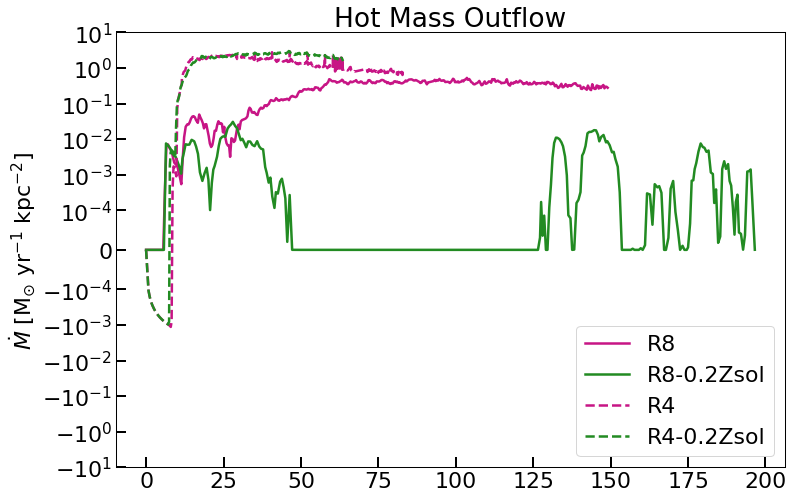

In [5]:
k=0

fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))


index = min(range(zrange.shape[0]), key=lambda i: abs(zrange[i] - height))
label= ['R8',  'R8-0.2Zsol','R4', 'R4-0.2Zsol']
ls = ['-', '-', '--', '--' ]
munit = dx*yr_to_sec/Msun/1.e-2
colors = ['mediumvioletred', 'forestgreen', 'mediumvioletred', 'forestgreen']

for folder in folder_list:
    if(source=='Summit'):
        data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder)
    else:
        data_path = os.path.join(scratch, 'sims/', folder)

    os.chdir(data_path)
    list_file = glob.glob("proj_y_*")
    
    dom_min, dom_max, ncells = getdomain(infile)
    fac = 1
    zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
    xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
    yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

    dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
    
    
    timestep = np.zeros((len(list_file)))
    tot_mass_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))

    tot_scalar_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))

    
    i = 0 
    for f in list_file:
        inputfile = os.path.join(data_path, f)
        ds   = yt.load(inputfile)
        
        data = ds.covering_grid(level=0, left_edge=dom_min, dims=ds.domain_dimensions, num_ghost_zones=0)
        timestep[i] = ds.current_time.to('Myr')
        tot_mass_flux[i,:] = np.array(data['hot_mass_outflow'])[:,0,:]
        i+=1
        
    print(tot_mass_flux.shape)
    indexes = list(range(len(timestep)))
    indexes.sort(key=timestep.__getitem__)
    sorted_time = list(map(timestep.__getitem__, indexes))
    
    flux_sum = np.sum(tot_mass_flux[:,:,index], axis=1)
    sorted_mdot  = list(map(flux_sum.__getitem__, indexes))
    ax.plot(sorted_time, np.asarray(sorted_mdot)*munit, ls=ls[k],\
            label=label[k],markersize=12, lw=2.5, color=colors[k])
    k+=1

ax.legend()
ax.set_ylabel('$\dot{M}$ [M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$]')
ax.set_title('Hot Mass Outflow')
ax.set_yscale('Symlog', linthresh=1.e-4)
ax.set_ylim(-10., 10.)

yt : [INFO     ] 2024-08-04 22:03:26,595 Parameters: current_time              = 5271973861069715.0
yt : [INFO     ] 2024-08-04 22:03:26,597 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:03:26,598 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:03:26,600 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:03:27,163 Parameters: current_time              = 4990735053590423.0
yt : [INFO     ] 2024-08-04 22:03:27,165 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:03:27,166 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:03:27,168 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:03:27,722 Parameters: current_time              = 3759050146000240.0
yt : [INFO     ] 2024-08-04 22:03:

yt : [INFO     ] 2024-08-04 22:03:39,184 Parameters: current_time              = 1018500894792761.6
yt : [INFO     ] 2024-08-04 22:03:39,195 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:03:39,198 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:03:39,199 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:03:39,866 Parameters: current_time              = 4525296269261153.0
yt : [INFO     ] 2024-08-04 22:03:39,868 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:03:39,869 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:03:39,870 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:03:40,565 Parameters: current_time              = 4376433551222982.0
yt : [INFO     ] 2024-08-04 22:03:

yt : [INFO     ] 2024-08-04 22:03:51,859 Parameters: current_time              = 1250217876518597.5
yt : [INFO     ] 2024-08-04 22:03:51,863 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:03:51,867 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:03:51,868 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:03:52,556 Parameters: current_time              = 2175453385163304.0
yt : [INFO     ] 2024-08-04 22:03:52,560 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:03:52,561 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:03:52,563 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:03:53,175 Parameters: current_time              = 1445597814158567.8
yt : [INFO     ] 2024-08-04 22:03:

yt : [INFO     ] 2024-08-04 22:04:05,035 Parameters: current_time              = 3652434518450309.5
yt : [INFO     ] 2024-08-04 22:04:05,036 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:04:05,037 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:05,038 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:05,675 Parameters: current_time              = 3921091447557017.5
yt : [INFO     ] 2024-08-04 22:04:05,678 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:04:05,680 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:05,681 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:06,353 Parameters: current_time              = 4399027956958366.0
yt : [INFO     ] 2024-08-04 22:04:

yt : [INFO     ] 2024-08-04 22:04:17,863 Parameters: current_time              = 4513956409920443.0
yt : [INFO     ] 2024-08-04 22:04:17,865 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:04:17,867 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:17,868 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:18,734 Parameters: current_time              = 4388342905656235.5
yt : [INFO     ] 2024-08-04 22:04:18,736 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:04:18,737 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:18,738 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:19,361 Parameters: current_time              = 2580921163714380.0
yt : [INFO     ] 2024-08-04 22:04:

yt : [INFO     ] 2024-08-04 22:04:30,342 Parameters: current_time              = 1809200600358082.2
yt : [INFO     ] 2024-08-04 22:04:30,344 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:04:30,345 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:30,346 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:31,100 Parameters: current_time              = 663111142877743.9
yt : [INFO     ] 2024-08-04 22:04:31,103 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:04:31,106 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:31,108 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:31,791 Parameters: current_time              = 2736699902676659.5
yt : [INFO     ] 2024-08-04 22:04:3

yt : [INFO     ] 2024-08-04 22:04:42,828 Parameters: current_time              = 3187476261874390.0
yt : [INFO     ] 2024-08-04 22:04:42,829 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:04:42,832 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:42,834 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:43,529 Parameters: current_time              = 2725644102085334.0
yt : [INFO     ] 2024-08-04 22:04:43,530 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:04:43,532 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:43,533 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:44,220 Parameters: current_time              = 906414279343975.5
yt : [INFO     ] 2024-08-04 22:04:4

yt : [INFO     ] 2024-08-04 22:04:56,287 Parameters: current_time              = 916132082041700.9
yt : [INFO     ] 2024-08-04 22:04:56,289 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:04:56,290 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:56,291 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:56,947 Parameters: current_time              = 2989155873674914.5
yt : [INFO     ] 2024-08-04 22:04:56,949 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:04:56,950 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:56,952 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:04:57,654 Parameters: current_time              = 2445326239589969.5
yt : [INFO     ] 2024-08-04 22:04:5

yt : [INFO     ] 2024-08-04 22:05:09,143 Parameters: current_time              = 3169651224005664.0
yt : [INFO     ] 2024-08-04 22:05:09,145 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:05:09,146 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:05:09,147 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:05:09,776 Parameters: current_time              = 5410902324185913.0
yt : [INFO     ] 2024-08-04 22:05:09,778 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:05:09,779 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:05:09,781 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:05:10,356 Parameters: current_time              = 5047238643724913.0
yt : [INFO     ] 2024-08-04 22:05:

yt : [INFO     ] 2024-08-04 22:05:21,927 Parameters: current_time              = 5377551240300158.0
yt : [INFO     ] 2024-08-04 22:05:21,928 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:05:21,929 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:05:21,931 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:05:22,550 Parameters: current_time              = 3573386507028983.5
yt : [INFO     ] 2024-08-04 22:05:22,552 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:05:22,553 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:05:22,555 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:05:23,211 Parameters: current_time              = 160296693617451.97
yt : [INFO     ] 2024-08-04 22:05:

yt : [INFO     ] 2024-08-04 22:05:34,748 Parameters: current_time              = 2489494933592303.0
yt : [INFO     ] 2024-08-04 22:05:34,750 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:05:34,751 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:05:34,752 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:05:35,436 Parameters: current_time              = 1078705890017058.0
yt : [INFO     ] 2024-08-04 22:05:35,438 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:05:35,439 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:05:35,441 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:05:36,088 Parameters: current_time              = 3795088061725415.5
yt : [INFO     ] 2024-08-04 22:05:

yt : [INFO     ] 2024-08-04 22:05:47,775 Parameters: current_time              = 287285753410318.4
yt : [INFO     ] 2024-08-04 22:05:47,776 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:05:47,778 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:05:47,779 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:05:48,457 Parameters: current_time              = 4899593748557796.0
yt : [INFO     ] 2024-08-04 22:05:48,459 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:05:48,460 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:05:48,461 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:05:49,142 Parameters: current_time              = 2758122800057865.0
yt : [INFO     ] 2024-08-04 22:05:4

yt : [INFO     ] 2024-08-04 22:06:00,550 Parameters: current_time              = 3469931591787398.5
yt : [INFO     ] 2024-08-04 22:06:00,551 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:06:00,553 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:00,554 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:01,407 Parameters: current_time              = 2502010996154730.0
yt : [INFO     ] 2024-08-04 22:06:01,408 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:06:01,410 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:01,411 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:02,075 Parameters: current_time              = 3608211598720167.0
yt : [INFO     ] 2024-08-04 22:06:

yt : [INFO     ] 2024-08-04 22:06:13,034 Parameters: current_time              = 4659450588275067.0
yt : [INFO     ] 2024-08-04 22:06:13,035 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:06:13,037 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:13,038 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:13,741 Parameters: current_time              = 4074181291341562.0
yt : [INFO     ] 2024-08-04 22:06:13,742 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:06:13,743 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:13,745 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:14,318 Parameters: current_time              = 3117633405309200.0
yt : [INFO     ] 2024-08-04 22:06:

yt : [INFO     ] 2024-08-04 22:06:24,377 Parameters: current_time              = 4432675065274620.0
yt : [INFO     ] 2024-08-04 22:06:24,378 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:06:24,380 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:24,381 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:24,906 Parameters: current_time              = 3268957514167658.5
yt : [INFO     ] 2024-08-04 22:06:24,907 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:06:24,909 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:24,910 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:25,425 Parameters: current_time              = 3986829997601765.0
yt : [INFO     ] 2024-08-04 22:06:

yt : [INFO     ] 2024-08-04 22:06:35,824 Parameters: current_time              = 2410266999510552.5
yt : [INFO     ] 2024-08-04 22:06:35,826 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:06:35,827 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:35,829 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:36,377 Parameters: current_time              = 2197622132255855.0
yt : [INFO     ] 2024-08-04 22:06:36,379 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:06:36,380 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:36,382 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:37,037 Parameters: current_time              = 1974796063926360.8
yt : [INFO     ] 2024-08-04 22:06:

yt : [INFO     ] 2024-08-04 22:06:47,174 Parameters: current_time              = 1420440749514735.2
yt : [INFO     ] 2024-08-04 22:06:47,175 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:06:47,176 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:47,178 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:47,778 Parameters: current_time              = 2339923436077299.5
yt : [INFO     ] 2024-08-04 22:06:47,779 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:06:47,780 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:47,782 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:48,392 Parameters: current_time              = 1536200184445755.5
yt : [INFO     ] 2024-08-04 22:06:

yt : [INFO     ] 2024-08-04 22:06:58,763 Parameters: current_time              = 4232280733652889.0
yt : [INFO     ] 2024-08-04 22:06:58,765 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:06:58,766 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:58,767 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:59,352 Parameters: current_time              = 3539462098182063.0
yt : [INFO     ] 2024-08-04 22:06:59,354 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:06:59,355 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:06:59,356 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:00,176 Parameters: current_time              = 4188545144731251.5
yt : [INFO     ] 2024-08-04 22:07:

yt : [INFO     ] 2024-08-04 22:07:10,357 Parameters: current_time              = 3001489391215121.0
yt : [INFO     ] 2024-08-04 22:07:10,358 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:07:10,359 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:10,361 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:10,915 Parameters: current_time              = 2570789204536983.0
yt : [INFO     ] 2024-08-04 22:07:10,916 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:07:10,918 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:10,919 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:11,544 Parameters: current_time              = 5093568745472705.0
yt : [INFO     ] 2024-08-04 22:07:

yt : [INFO     ] 2024-08-04 22:07:21,726 Parameters: current_time              = 2129269933621307.5
yt : [INFO     ] 2024-08-04 22:07:21,728 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:07:21,729 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:21,731 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:22,261 Parameters: current_time              = 3382185090318602.5
yt : [INFO     ] 2024-08-04 22:07:22,263 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:07:22,264 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:22,266 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:22,818 Parameters: current_time              = 2916980168035655.0
yt : [INFO     ] 2024-08-04 22:07:

yt : [INFO     ] 2024-08-04 22:07:32,858 Parameters: current_time              = 2277344548520090.0
yt : [INFO     ] 2024-08-04 22:07:32,859 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:07:32,860 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:32,862 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:33,405 Parameters: current_time              = 3975677274975226.5
yt : [INFO     ] 2024-08-04 22:07:33,407 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:07:33,408 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:33,410 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:33,955 Parameters: current_time              = 3867410239443610.5
yt : [INFO     ] 2024-08-04 22:07:

yt : [INFO     ] 2024-08-04 22:07:44,019 Parameters: current_time              = 4784739065604895.0
yt : [INFO     ] 2024-08-04 22:07:44,020 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:07:44,021 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:44,023 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:44,644 Parameters: current_time              = 4457031704289044.5
yt : [INFO     ] 2024-08-04 22:07:44,646 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:07:44,647 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:44,648 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:45,288 Parameters: current_time              = 5182597102264829.0
yt : [INFO     ] 2024-08-04 22:07:

yt : [INFO     ] 2024-08-04 22:07:55,364 Parameters: current_time              = 4491013538847234.5
yt : [INFO     ] 2024-08-04 22:07:55,366 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:07:55,367 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:55,368 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:55,896 Parameters: current_time              = 5330800629353599.0
yt : [INFO     ] 2024-08-04 22:07:55,898 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:07:55,899 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:55,900 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:07:56,432 Parameters: current_time              = 4053398381418194.0
yt : [INFO     ] 2024-08-04 22:07:

yt : [INFO     ] 2024-08-04 22:08:06,325 Parameters: current_time              = 484259368538438.94
yt : [INFO     ] 2024-08-04 22:08:06,326 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:08:06,328 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:06,329 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:06,864 Parameters: current_time              = 5169833441814769.0
yt : [INFO     ] 2024-08-04 22:08:06,865 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:08:06,867 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:06,868 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:07,379 Parameters: current_time              = 3943052995042302.5
yt : [INFO     ] 2024-08-04 22:08:

yt : [INFO     ] 2024-08-04 22:08:16,741 Parameters: current_time              = 749126371871299.8
yt : [INFO     ] 2024-08-04 22:08:16,742 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:08:16,744 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:16,745 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:17,310 Parameters: current_time              = 5247777538738277.0
yt : [INFO     ] 2024-08-04 22:08:17,313 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:08:17,314 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:17,316 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:17,860 Parameters: current_time              = 1965018531224836.2
yt : [INFO     ] 2024-08-04 22:08:1

yt : [INFO     ] 2024-08-04 22:08:27,538 Parameters: current_time              = 2624095637776806.5
yt : [INFO     ] 2024-08-04 22:08:27,539 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:08:27,541 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:27,542 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:28,086 Parameters: current_time              = 3844778361746377.0
yt : [INFO     ] 2024-08-04 22:08:28,087 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:08:28,088 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:28,090 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:28,616 Parameters: current_time              = 4796410845507001.0
yt : [INFO     ] 2024-08-04 22:08:

(481, 512, 4096)


yt : [INFO     ] 2024-08-04 22:08:31,296 Parameters: current_time              = 6203371598433323.0
yt : [INFO     ] 2024-08-04 22:08:31,298 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:08:31,299 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:31,300 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:31,992 Parameters: current_time              = 2445347387600728.5
yt : [INFO     ] 2024-08-04 22:08:31,993 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:08:31,995 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:31,996 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:32,644 Parameters: current_time              = 6062279817809211.0
yt : [INFO     ] 2024-08-04 22:08:

yt : [INFO     ] 2024-08-04 22:08:43,958 Parameters: current_time              = 2846109354743891.0
yt : [INFO     ] 2024-08-04 22:08:43,959 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:08:43,960 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:43,962 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:44,608 Parameters: current_time              = 1438645164078513.8
yt : [INFO     ] 2024-08-04 22:08:44,610 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:08:44,611 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:44,613 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:45,283 Parameters: current_time              = 2331023082801178.0
yt : [INFO     ] 2024-08-04 22:08:

yt : [INFO     ] 2024-08-04 22:08:57,149 Parameters: current_time              = 3529127306801957.0
yt : [INFO     ] 2024-08-04 22:08:57,151 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:08:57,152 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:57,154 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:57,886 Parameters: current_time              = 6009978725734348.0
yt : [INFO     ] 2024-08-04 22:08:57,888 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:08:57,889 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:57,891 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:08:58,562 Parameters: current_time              = 2766197641549027.5
yt : [INFO     ] 2024-08-04 22:08:

yt : [INFO     ] 2024-08-04 22:09:10,390 Parameters: current_time              = 3855561367150117.0
yt : [INFO     ] 2024-08-04 22:09:10,392 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:09:10,393 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:09:10,394 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:09:11,089 Parameters: current_time              = 1172044066303149.8
yt : [INFO     ] 2024-08-04 22:09:11,091 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:09:11,093 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:09:11,094 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:09:11,811 Parameters: current_time              = 807008551002381.4
yt : [INFO     ] 2024-08-04 22:09:1

yt : [INFO     ] 2024-08-04 22:09:23,396 Parameters: current_time              = 5183207173657812.0
yt : [INFO     ] 2024-08-04 22:09:23,398 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:09:23,399 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:09:23,401 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:09:24,083 Parameters: current_time              = 4342132082010958.0
yt : [INFO     ] 2024-08-04 22:09:24,085 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:09:24,086 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:09:24,088 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:09:24,779 Parameters: current_time              = 1308076851606368.0
yt : [INFO     ] 2024-08-04 22:09:

yt : [INFO     ] 2024-08-04 22:09:36,506 Parameters: current_time              = 4782315869052777.0
yt : [INFO     ] 2024-08-04 22:09:36,507 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:09:36,509 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:09:36,510 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:09:37,135 Parameters: current_time              = 3885592220331619.0
yt : [INFO     ] 2024-08-04 22:09:37,138 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:09:37,141 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:09:37,142 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:09:37,855 Parameters: current_time              = 3751521545776083.5
yt : [INFO     ] 2024-08-04 22:09:

yt : [INFO     ] 2024-08-04 22:09:50,089 Parameters: current_time              = 2582688800090784.5
yt : [INFO     ] 2024-08-04 22:09:50,091 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:09:50,092 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:09:50,093 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:09:50,727 Parameters: current_time              = 1228533879404768.5
yt : [INFO     ] 2024-08-04 22:09:50,730 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:09:50,731 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:09:50,732 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:09:51,298 Parameters: current_time              = 4459199600592401.0
yt : [INFO     ] 2024-08-04 22:09:

yt : [INFO     ] 2024-08-04 22:10:02,938 Parameters: current_time              = 5996353850782407.0
yt : [INFO     ] 2024-08-04 22:10:02,940 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:10:02,942 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:02,943 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:03,654 Parameters: current_time              = 5297512297645157.0
yt : [INFO     ] 2024-08-04 22:10:03,656 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:10:03,657 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:03,658 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:04,448 Parameters: current_time              = 3365914093130080.5
yt : [INFO     ] 2024-08-04 22:10:

yt : [INFO     ] 2024-08-04 22:10:16,525 Parameters: current_time              = 5576354120718702.0
yt : [INFO     ] 2024-08-04 22:10:16,527 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:10:16,529 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:16,530 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:17,359 Parameters: current_time              = 3815796138676969.0
yt : [INFO     ] 2024-08-04 22:10:17,365 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:10:17,367 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:17,368 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:18,078 Parameters: current_time              = 5486182776908103.0
yt : [INFO     ] 2024-08-04 22:10:

yt : [INFO     ] 2024-08-04 22:10:29,787 Parameters: current_time              = 1806962430194587.5
yt : [INFO     ] 2024-08-04 22:10:29,789 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:10:29,790 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:29,792 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:30,450 Parameters: current_time              = 4977193616080731.0
yt : [INFO     ] 2024-08-04 22:10:30,452 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:10:30,453 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:30,455 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:31,149 Parameters: current_time              = 2639982106025059.0
yt : [INFO     ] 2024-08-04 22:10:

yt : [INFO     ] 2024-08-04 22:10:43,117 Parameters: current_time              = 3632465580663687.5
yt : [INFO     ] 2024-08-04 22:10:43,118 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:10:43,120 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:43,121 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:43,794 Parameters: current_time              = 3732161120350974.0
yt : [INFO     ] 2024-08-04 22:10:43,795 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:10:43,797 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:43,798 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:44,536 Parameters: current_time              = 830533107526948.1
yt : [INFO     ] 2024-08-04 22:10:4

yt : [INFO     ] 2024-08-04 22:10:56,682 Parameters: current_time              = 5278992649402586.0
yt : [INFO     ] 2024-08-04 22:10:56,688 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:10:56,690 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:56,691 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:57,226 Parameters: current_time              = 964467152276342.4
yt : [INFO     ] 2024-08-04 22:10:57,228 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:10:57,229 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:57,230 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:10:57,920 Parameters: current_time              = 402517569735734.0
yt : [INFO     ] 2024-08-04 22:10:57

yt : [INFO     ] 2024-08-04 22:11:09,803 Parameters: current_time              = 1821444237238397.8
yt : [INFO     ] 2024-08-04 22:11:09,804 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:11:09,805 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:11:09,807 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:11:10,496 Parameters: current_time              = 4958417957860424.0
yt : [INFO     ] 2024-08-04 22:11:10,497 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:11:10,499 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:11:10,501 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:11:11,027 Parameters: current_time              = 4533762750425069.0
yt : [INFO     ] 2024-08-04 22:11:

yt : [INFO     ] 2024-08-04 22:11:23,329 Parameters: current_time              = 1553902965769798.8
yt : [INFO     ] 2024-08-04 22:11:23,330 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:11:23,332 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:11:23,333 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:11:23,995 Parameters: current_time              = 5419110816232130.0
yt : [INFO     ] 2024-08-04 22:11:23,997 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:11:23,998 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:11:24,000 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:11:24,631 Parameters: current_time              = 4014312669658462.0
yt : [INFO     ] 2024-08-04 22:11:

yt : [INFO     ] 2024-08-04 22:11:37,234 Parameters: current_time              = 4826652655438665.0
yt : [INFO     ] 2024-08-04 22:11:37,236 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:11:37,238 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:11:37,239 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:11:37,889 Parameters: current_time              = 1060774674488663.5
yt : [INFO     ] 2024-08-04 22:11:37,891 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:11:37,892 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:11:37,893 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:11:38,604 Parameters: current_time              = 3385444819000442.5
yt : [INFO     ] 2024-08-04 22:11:

yt : [INFO     ] 2024-08-04 22:11:50,979 Parameters: current_time              = 2508521343730085.5
yt : [INFO     ] 2024-08-04 22:11:50,983 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:11:50,985 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:11:50,987 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:11:51,775 Parameters: current_time              = 3104952946321808.5
yt : [INFO     ] 2024-08-04 22:11:51,776 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:11:51,778 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:11:51,779 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:11:52,603 Parameters: current_time              = 634822185197637.5
yt : [INFO     ] 2024-08-04 22:11:5

yt : [INFO     ] 2024-08-04 22:12:05,077 Parameters: current_time              = 652163250554945.0
yt : [INFO     ] 2024-08-04 22:12:05,078 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:12:05,080 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:05,081 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:05,606 Parameters: current_time              = 463884655680977.94
yt : [INFO     ] 2024-08-04 22:12:05,608 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:12:05,609 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:05,610 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:06,273 Parameters: current_time              = 4426813812734145.5
yt : [INFO     ] 2024-08-04 22:12:0

yt : [INFO     ] 2024-08-04 22:12:18,163 Parameters: current_time              = 5674284269047797.0
yt : [INFO     ] 2024-08-04 22:12:18,164 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:12:18,165 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:18,167 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:18,876 Parameters: current_time              = 2351042614411131.5
yt : [INFO     ] 2024-08-04 22:12:18,878 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:12:18,879 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:18,881 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:19,729 Parameters: current_time              = 5509465971382922.0
yt : [INFO     ] 2024-08-04 22:12:

(329, 512, 4096)


yt : [INFO     ] 2024-08-04 22:12:22,776 Parameters: current_time              = 2504910968134104.5
yt : [INFO     ] 2024-08-04 22:12:22,777 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:12:22,778 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:22,780 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:23,485 Parameters: current_time              = 1050692855127933.4
yt : [INFO     ] 2024-08-04 22:12:23,486 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:12:23,488 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:23,489 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:24,282 Parameters: current_time              = 2448797312460666.5
yt : [INFO     ] 2024-08-04 22:12:

yt : [INFO     ] 2024-08-04 22:12:35,827 Parameters: current_time              = 3041955685999977.5
yt : [INFO     ] 2024-08-04 22:12:35,828 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:12:35,830 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:35,831 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:36,370 Parameters: current_time              = 2935876205784484.0
yt : [INFO     ] 2024-08-04 22:12:36,372 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:12:36,373 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:36,375 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:36,945 Parameters: current_time              = 1088888057980631.2
yt : [INFO     ] 2024-08-04 22:12:

yt : [INFO     ] 2024-08-04 22:12:48,711 Parameters: current_time              = 551264428045253.7
yt : [INFO     ] 2024-08-04 22:12:48,712 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:12:48,714 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:48,715 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:49,577 Parameters: current_time              = 1434566530284600.0
yt : [INFO     ] 2024-08-04 22:12:49,579 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:12:49,580 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:49,581 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:12:50,321 Parameters: current_time              = 934587498846457.2
yt : [INFO     ] 2024-08-04 22:12:50

yt : [INFO     ] 2024-08-04 22:13:02,414 Parameters: current_time              = 2952699463140682.5
yt : [INFO     ] 2024-08-04 22:13:02,416 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:13:02,417 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:02,419 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:03,128 Parameters: current_time              = 1175897204594430.8
yt : [INFO     ] 2024-08-04 22:13:03,130 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:13:03,132 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:03,133 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:03,867 Parameters: current_time              = 1412188266585595.0
yt : [INFO     ] 2024-08-04 22:13:

yt : [INFO     ] 2024-08-04 22:13:16,414 Parameters: current_time              = 1665741566530711.5
yt : [INFO     ] 2024-08-04 22:13:16,423 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:13:16,424 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:16,426 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:17,159 Parameters: current_time              = 2107336581865247.0
yt : [INFO     ] 2024-08-04 22:13:17,160 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:13:17,163 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:17,164 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:17,928 Parameters: current_time              = 1751622240554049.8
yt : [INFO     ] 2024-08-04 22:13:

yt : [INFO     ] 2024-08-04 22:13:30,549 Parameters: current_time              = 2122646654375540.5
yt : [INFO     ] 2024-08-04 22:13:30,551 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:13:30,552 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:30,554 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:31,223 Parameters: current_time              = 1963971469346809.5
yt : [INFO     ] 2024-08-04 22:13:31,225 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:13:31,226 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:31,228 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:31,809 Parameters: current_time              = 2091900655627176.8
yt : [INFO     ] 2024-08-04 22:13:

yt : [INFO     ] 2024-08-04 22:13:44,123 Parameters: current_time              = 2456011424948210.5
yt : [INFO     ] 2024-08-04 22:13:44,124 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:13:44,125 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:44,127 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:44,809 Parameters: current_time              = 232554673987917.62
yt : [INFO     ] 2024-08-04 22:13:44,812 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:13:44,815 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:44,816 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:45,487 Parameters: current_time              = 735220331872332.0
yt : [INFO     ] 2024-08-04 22:13:4

yt : [INFO     ] 2024-08-04 22:13:58,447 Parameters: current_time              = 1723018087391859.2
yt : [INFO     ] 2024-08-04 22:13:58,449 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:13:58,450 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:58,451 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:59,253 Parameters: current_time              = 1081544212433831.6
yt : [INFO     ] 2024-08-04 22:13:59,254 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:13:59,256 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:59,257 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:13:59,962 Parameters: current_time              = 1744680953821677.0
yt : [INFO     ] 2024-08-04 22:13:

yt : [INFO     ] 2024-08-04 22:14:12,726 Parameters: current_time              = 1687424977882918.2
yt : [INFO     ] 2024-08-04 22:14:12,728 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:14:12,729 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:14:12,731 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:14:13,424 Parameters: current_time              = 2902001357587875.0
yt : [INFO     ] 2024-08-04 22:14:13,426 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:14:13,427 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:14:13,429 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:14:14,109 Parameters: current_time              = 627461621447100.9
yt : [INFO     ] 2024-08-04 22:14:1

yt : [INFO     ] 2024-08-04 22:14:27,017 Parameters: current_time              = 692009124206478.5
yt : [INFO     ] 2024-08-04 22:14:27,020 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:14:27,024 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:14:27,025 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:14:27,722 Parameters: current_time              = 2528128012540447.5
yt : [INFO     ] 2024-08-04 22:14:27,724 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:14:27,725 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:14:27,727 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:14:28,499 Parameters: current_time              = 2417651362403283.0
yt : [INFO     ] 2024-08-04 22:14:2

yt : [INFO     ] 2024-08-04 22:14:40,819 Parameters: current_time              = 862158325272293.4
yt : [INFO     ] 2024-08-04 22:14:40,821 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:14:40,822 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:14:40,824 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:14:41,449 Parameters: current_time              = 1156181998411466.2
yt : [INFO     ] 2024-08-04 22:14:41,450 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:14:41,452 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:14:41,453 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:14:42,193 Parameters: current_time              = 568463675322651.0
yt : [INFO     ] 2024-08-04 22:14:42

yt : [INFO     ] 2024-08-04 22:14:55,040 Parameters: current_time              = 2589434150504745.5
yt : [INFO     ] 2024-08-04 22:14:55,041 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:14:55,042 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:14:55,044 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:14:55,734 Parameters: current_time              = 671536167957289.6
yt : [INFO     ] 2024-08-04 22:14:55,736 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:14:55,737 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:14:55,739 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:14:56,382 Parameters: current_time              = 1035900496939073.4
yt : [INFO     ] 2024-08-04 22:14:5

yt : [INFO     ] 2024-08-04 22:15:09,428 Parameters: current_time              = 2815515432216498.0
yt : [INFO     ] 2024-08-04 22:15:09,430 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:15:09,431 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:15:09,432 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:15:10,185 Parameters: current_time              = 1458362860342277.2
yt : [INFO     ] 2024-08-04 22:15:10,188 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:15:10,189 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:15:10,191 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:15:10,880 Parameters: current_time              = 1823576813294028.2
yt : [INFO     ] 2024-08-04 22:15:

yt : [INFO     ] 2024-08-04 22:15:22,632 Parameters: current_time              = 1910418548738927.0
yt : [INFO     ] 2024-08-04 22:15:22,634 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:15:22,635 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:15:22,636 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:15:23,379 Parameters: current_time              = 1512728604308301.0
yt : [INFO     ] 2024-08-04 22:15:23,381 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:15:23,382 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:15:23,384 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:15:24,349 Parameters: current_time              = 2792714796035445.0
yt : [INFO     ] 2024-08-04 22:15:

yt : [INFO     ] 2024-08-04 22:15:36,183 Parameters: current_time              = 2340064771784941.5
yt : [INFO     ] 2024-08-04 22:15:36,185 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:15:36,186 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:15:36,188 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:15:36,848 Parameters: current_time              = 926083322847718.6
yt : [INFO     ] 2024-08-04 22:15:36,850 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:15:36,851 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:15:36,853 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:15:37,598 Parameters: current_time              = 123828950491068.53
yt : [INFO     ] 2024-08-04 22:15:3

yt : [INFO     ] 2024-08-04 22:15:49,186 Parameters: current_time              = 1680897389820796.5
yt : [INFO     ] 2024-08-04 22:15:49,188 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:15:49,189 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:15:49,191 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:15:49,929 Parameters: current_time              = 484624155855680.6
yt : [INFO     ] 2024-08-04 22:15:49,930 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:15:49,932 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:15:49,933 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:15:50,718 Parameters: current_time              = 1218498305648444.2
yt : [INFO     ] 2024-08-04 22:15:5

yt : [INFO     ] 2024-08-04 22:16:02,071 Parameters: current_time              = 336959365103705.2
yt : [INFO     ] 2024-08-04 22:16:02,072 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:16:02,073 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:02,074 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:02,779 Parameters: current_time              = 1028780979433490.2
yt : [INFO     ] 2024-08-04 22:16:02,780 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:16:02,782 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:02,783 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:03,401 Parameters: current_time              = 575406226496410.0
yt : [INFO     ] 2024-08-04 22:16:03

yt : [INFO     ] 2024-08-04 22:16:15,098 Parameters: current_time              = 1112079205344090.0
yt : [INFO     ] 2024-08-04 22:16:15,099 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:16:15,101 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:15,102 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:15,897 Parameters: current_time              = 2807872282237686.0
yt : [INFO     ] 2024-08-04 22:16:15,898 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:16:15,899 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:15,901 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:16,458 Parameters: current_time              = 837821263607943.2
yt : [INFO     ] 2024-08-04 22:16:1

yt : [INFO     ] 2024-08-04 22:16:26,955 Parameters: current_time              = 1427046334011354.0
yt : [INFO     ] 2024-08-04 22:16:26,958 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:16:26,960 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:26,963 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:27,641 Parameters: current_time              = 1758933675360257.5
yt : [INFO     ] 2024-08-04 22:16:27,643 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:16:27,644 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:27,646 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:28,238 Parameters: current_time              = 1505278013396897.0
yt : [INFO     ] 2024-08-04 22:16:

yt : [INFO     ] 2024-08-04 22:16:38,480 Parameters: current_time              = 2551051722835224.0
yt : [INFO     ] 2024-08-04 22:16:38,482 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:16:38,483 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:38,484 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:39,181 Parameters: current_time              = 895699125104736.0
yt : [INFO     ] 2024-08-04 22:16:39,182 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:16:39,183 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:39,185 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:39,748 Parameters: current_time              = 26255608512468.707
yt : [INFO     ] 2024-08-04 22:16:3

yt : [INFO     ] 2024-08-04 22:16:51,205 Parameters: current_time              = 2409459050674766.5
yt : [INFO     ] 2024-08-04 22:16:51,206 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:16:51,208 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:51,209 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:51,700 Parameters: current_time              = 1112079205344090.0
yt : [INFO     ] 2024-08-04 22:16:51,702 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:16:51,703 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:51,705 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:16:52,246 Parameters: current_time              = 1021434504604950.8
yt : [INFO     ] 2024-08-04 22:16:

yt : [INFO     ] 2024-08-04 22:17:02,729 Parameters: current_time              = 2692021061723638.5
yt : [INFO     ] 2024-08-04 22:17:02,730 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:17:02,731 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:02,732 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:03,297 Parameters: current_time              = 1345956112479231.8
yt : [INFO     ] 2024-08-04 22:17:03,301 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:17:03,304 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:03,306 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:03,852 Parameters: current_time              = 3010286124510932.5
yt : [INFO     ] 2024-08-04 22:17:

yt : [INFO     ] 2024-08-04 22:17:14,316 Parameters: current_time              = 1014825475958941.8
yt : [INFO     ] 2024-08-04 22:17:14,325 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:17:14,326 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:14,328 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:15,104 Parameters: current_time              = 2885867597921556.5
yt : [INFO     ] 2024-08-04 22:17:15,110 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:17:15,113 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:15,115 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:16,050 Parameters: current_time              = 1979513681579316.5
yt : [INFO     ] 2024-08-04 22:17:

(426, 512, 4096)


yt : [INFO     ] 2024-08-04 22:17:20,450 Parameters: current_time              = 2225200593092499.5
yt : [INFO     ] 2024-08-04 22:17:20,452 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:17:20,453 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:20,454 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:20,959 Parameters: current_time              = 945179872586257.2
yt : [INFO     ] 2024-08-04 22:17:20,961 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:17:20,962 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:20,963 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:21,646 Parameters: current_time              = 2178513523125985.2
yt : [INFO     ] 2024-08-04 22:17:2

yt : [INFO     ] 2024-08-04 22:17:32,295 Parameters: current_time              = 448918158196031.94
yt : [INFO     ] 2024-08-04 22:17:32,298 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:17:32,300 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:32,302 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:33,037 Parameters: current_time              = 2326518153667729.5
yt : [INFO     ] 2024-08-04 22:17:33,039 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:17:33,040 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:33,041 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:33,542 Parameters: current_time              = 2045796828489021.5
yt : [INFO     ] 2024-08-04 22:17:

yt : [INFO     ] 2024-08-04 22:17:44,250 Parameters: current_time              = 2231920215886981.2
yt : [INFO     ] 2024-08-04 22:17:44,251 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:17:44,253 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:44,254 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:44,771 Parameters: current_time              = 938961167401192.9
yt : [INFO     ] 2024-08-04 22:17:44,772 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:17:44,773 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:44,774 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:45,508 Parameters: current_time              = 2374825989757771.0
yt : [INFO     ] 2024-08-04 22:17:4

yt : [INFO     ] 2024-08-04 22:17:55,811 Parameters: current_time              = 471873073200411.75
yt : [INFO     ] 2024-08-04 22:17:55,816 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:17:55,818 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:55,819 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:56,553 Parameters: current_time              = 1671987586780933.2
yt : [INFO     ] 2024-08-04 22:17:56,555 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:17:56,556 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:56,558 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:17:57,048 Parameters: current_time              = 1945670795288331.2
yt : [INFO     ] 2024-08-04 22:17:

yt : [INFO     ] 2024-08-04 22:18:06,644 Parameters: current_time              = 1066983895614091.4
yt : [INFO     ] 2024-08-04 22:18:06,646 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:18:06,647 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:06,649 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:07,213 Parameters: current_time              = 378675307738865.4
yt : [INFO     ] 2024-08-04 22:18:07,214 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:18:07,215 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:07,217 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:07,840 Parameters: current_time              = 1618878161849566.5
yt : [INFO     ] 2024-08-04 22:18:0

yt : [INFO     ] 2024-08-04 22:18:18,683 Parameters: current_time              = 1378335161718483.0
yt : [INFO     ] 2024-08-04 22:18:18,684 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:18:18,686 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:18,687 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:19,408 Parameters: current_time              = 648878936945208.5
yt : [INFO     ] 2024-08-04 22:18:19,412 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:18:19,413 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:19,415 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:19,933 Parameters: current_time              = 2204358261412730.0
yt : [INFO     ] 2024-08-04 22:18:1

yt : [INFO     ] 2024-08-04 22:18:30,519 Parameters: current_time              = 354690099235202.7
yt : [INFO     ] 2024-08-04 22:18:30,521 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:18:30,522 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:30,523 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:31,042 Parameters: current_time              = 2298492178883155.0
yt : [INFO     ] 2024-08-04 22:18:31,043 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:18:31,045 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:31,046 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:31,658 Parameters: current_time              = 1856595885528779.0
yt : [INFO     ] 2024-08-04 22:18:3

yt : [INFO     ] 2024-08-04 22:18:42,889 Parameters: current_time              = 794977226185645.4
yt : [INFO     ] 2024-08-04 22:18:42,890 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:18:42,891 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:42,893 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:43,456 Parameters: current_time              = 2464305924535577.5
yt : [INFO     ] 2024-08-04 22:18:43,457 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:18:43,459 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:43,460 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:44,118 Parameters: current_time              = 1512784640750145.8
yt : [INFO     ] 2024-08-04 22:18:4

yt : [INFO     ] 2024-08-04 22:18:54,601 Parameters: current_time              = 627404440692029.6
yt : [INFO     ] 2024-08-04 22:18:54,603 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:18:54,604 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:54,605 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:55,114 Parameters: current_time              = 2245788642137285.8
yt : [INFO     ] 2024-08-04 22:18:55,118 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:18:55,119 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:55,121 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:18:55,763 Parameters: current_time              = 2151099105064516.5
yt : [INFO     ] 2024-08-04 22:18:5

yt : [INFO     ] 2024-08-04 22:19:05,774 Parameters: current_time              = 507162404900394.44
yt : [INFO     ] 2024-08-04 22:19:05,776 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:19:05,777 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:05,778 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:06,284 Parameters: current_time              = 2006877720357407.5
yt : [INFO     ] 2024-08-04 22:19:06,290 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:19:06,291 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:06,293 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:06,954 Parameters: current_time              = 1419520732635284.5
yt : [INFO     ] 2024-08-04 22:19:

yt : [INFO     ] 2024-08-04 22:19:18,051 Parameters: current_time              = 2339857971951938.5
yt : [INFO     ] 2024-08-04 22:19:18,053 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:19:18,054 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:18,055 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:18,557 Parameters: current_time              = 1698571199783973.5
yt : [INFO     ] 2024-08-04 22:19:18,559 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:19:18,563 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:18,564 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:19,083 Parameters: current_time              = 1412527723495701.2
yt : [INFO     ] 2024-08-04 22:19:

yt : [INFO     ] 2024-08-04 22:19:29,579 Parameters: current_time              = 2443479679874749.0
yt : [INFO     ] 2024-08-04 22:19:29,581 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:19:29,584 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:29,586 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:30,206 Parameters: current_time              = 2171434847579381.5
yt : [INFO     ] 2024-08-04 22:19:30,208 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:19:30,209 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:30,210 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:30,756 Parameters: current_time              = 274413671723509.9
yt : [INFO     ] 2024-08-04 22:19:3

yt : [INFO     ] 2024-08-04 22:19:40,651 Parameters: current_time              = 1187572560438098.0
yt : [INFO     ] 2024-08-04 22:19:40,653 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:19:40,654 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:40,655 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:41,258 Parameters: current_time              = 74777735039781.3
yt : [INFO     ] 2024-08-04 22:19:41,260 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:19:41,261 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:41,263 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:41,843 Parameters: current_time              = 1426435389609088.0
yt : [INFO     ] 2024-08-04 22:19:41

yt : [INFO     ] 2024-08-04 22:19:52,239 Parameters: current_time              = 2097865875796732.2
yt : [INFO     ] 2024-08-04 22:19:52,240 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:19:52,242 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:52,244 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:52,923 Parameters: current_time              = 363005251816844.4
yt : [INFO     ] 2024-08-04 22:19:52,925 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:19:52,926 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:52,927 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:19:53,507 Parameters: current_time              = 739310541821214.1
yt : [INFO     ] 2024-08-04 22:19:53

yt : [INFO     ] 2024-08-04 22:20:03,840 Parameters: current_time              = 1358285037018114.0
yt : [INFO     ] 2024-08-04 22:20:03,842 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:20:03,843 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:03,845 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:04,494 Parameters: current_time              = 718375274162347.0
yt : [INFO     ] 2024-08-04 22:20:04,496 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:20:04,497 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:04,498 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:05,190 Parameters: current_time              = 1816548893824652.0
yt : [INFO     ] 2024-08-04 22:20:0

yt : [INFO     ] 2024-08-04 22:20:16,271 Parameters: current_time              = 1197850147915270.8
yt : [INFO     ] 2024-08-04 22:20:16,272 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:20:16,274 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:16,276 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:16,940 Parameters: current_time              = 1453453890922300.5
yt : [INFO     ] 2024-08-04 22:20:16,942 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:20:16,943 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:16,944 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:17,561 Parameters: current_time              = 1771625922778335.2
yt : [INFO     ] 2024-08-04 22:20:

yt : [INFO     ] 2024-08-04 22:20:27,672 Parameters: current_time              = 655702527080240.8
yt : [INFO     ] 2024-08-04 22:20:27,674 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:20:27,676 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:27,677 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:28,197 Parameters: current_time              = 621292253163926.0
yt : [INFO     ] 2024-08-04 22:20:28,198 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:20:28,200 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:28,202 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:28,706 Parameters: current_time              = 101135140566729.64
yt : [INFO     ] 2024-08-04 22:20:28

yt : [INFO     ] 2024-08-04 22:20:39,117 Parameters: current_time              = 393877855803735.9
yt : [INFO     ] 2024-08-04 22:20:39,119 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:20:39,120 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:39,121 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:39,728 Parameters: current_time              = 2367367751884416.5
yt : [INFO     ] 2024-08-04 22:20:39,729 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:20:39,731 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:39,732 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:40,477 Parameters: current_time              = 1924513232978557.8
yt : [INFO     ] 2024-08-04 22:20:4

yt : [INFO     ] 2024-08-04 22:20:50,629 Parameters: current_time              = 1691696887850207.8
yt : [INFO     ] 2024-08-04 22:20:50,635 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:20:50,636 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:50,638 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:51,170 Parameters: current_time              = 2211844566224547.5
yt : [INFO     ] 2024-08-04 22:20:51,171 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:20:51,173 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:51,174 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:20:51,698 Parameters: current_time              = 1810156712778611.0
yt : [INFO     ] 2024-08-04 22:20:

yt : [INFO     ] 2024-08-04 22:21:01,920 Parameters: current_time              = 768019907099595.5
yt : [INFO     ] 2024-08-04 22:21:01,921 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:21:01,922 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:21:01,924 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:21:02,624 Parameters: current_time              = 2388305692427161.5
yt : [INFO     ] 2024-08-04 22:21:02,633 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:21:02,635 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:21:02,636 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:21:03,193 Parameters: current_time              = 1211229752112716.5
yt : [INFO     ] 2024-08-04 22:21:0

yt : [INFO     ] 2024-08-04 22:21:13,181 Parameters: current_time              = 1552982596466538.5
yt : [INFO     ] 2024-08-04 22:21:13,186 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:21:13,189 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:21:13,190 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:21:13,922 Parameters: current_time              = 2272056272077424.0
yt : [INFO     ] 2024-08-04 22:21:13,924 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-04 22:21:13,925 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-04 22:21:13,927 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-04 22:21:14,476 Parameters: current_time              = 2471091113887451.5
yt : [INFO     ] 2024-08-04 22:21:

(384, 512, 4096)


(-10.0, 10.0)

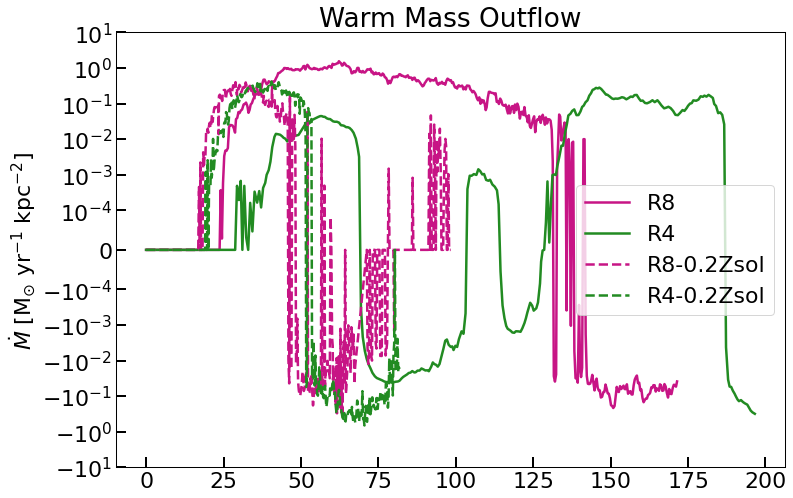

In [5]:
k=0

fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))

index = min(range(zrange.shape[0]), key=lambda i: abs(zrange[i] - height))
label= ['R8', 'R4', 'R8-0.2Zsol', 'R4-0.2Zsol']
ls = ['-', '-', '--', '--' ]
munit = dx * yr_to_sec/Msun/1.e-2
colors = ['mediumvioletred', 'forestgreen', 'mediumvioletred', 'forestgreen']

for folder in folder_list:
    if(source=='Summit'):
        data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder)
    else:
        data_path = os.path.join(scratch, 'sims/', folder)

    os.chdir(data_path)
    list_file = glob.glob("proj_y_*")
    
    dom_min, dom_max, ncells = getdomain(infile)
    fac = 1
    zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
    xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
    yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

    dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
    
    
    timestep = np.zeros((len(list_file)))
    tot_mass_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))

    tot_scalar_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))

    
    i = 0 
    for f in list_file:
        inputfile = os.path.join(data_path, f)
        ds   = yt.load(inputfile)
        
        data = ds.covering_grid(level=0, left_edge=dom_min, dims=ds.domain_dimensions, num_ghost_zones=0)
        timestep[i] = ds.current_time.to('Myr')
        tot_mass_flux[i,:] = np.array(data['warm_mass_outflow'])[:,0,:]
        i+=1
        
    print(tot_mass_flux.shape)
    indexes = list(range(len(timestep)))
    indexes.sort(key=timestep.__getitem__)
    sorted_time = list(map(timestep.__getitem__, indexes))
    
    flux_sum = np.sum(tot_mass_flux[:,:,index], axis=1)
    sorted_mdot  = list(map(flux_sum.__getitem__, indexes))
    ax.plot(sorted_time, np.asarray(sorted_mdot)*munit, ls=ls[k],\
            label=label[k],markersize=12, lw=2.5, color=colors[k])
    k+=1

ax.legend()
ax.set_ylabel('$\dot{M}$ [M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$]')
ax.set_title('Warm Mass Outflow')
ax.set_yscale('Symlog', linthresh=1.e-4)
ax.set_ylim(-10., 10.)

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SummitData/GasGravity/Production2pc/R8/


yt : [INFO     ] 2024-08-12 16:37:19,395 Parameters: current_time              = 5271973861069715.0
yt : [INFO     ] 2024-08-12 16:37:19,396 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:37:19,397 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:19,399 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:19,845 Parameters: current_time              = 4990735053590423.0
yt : [INFO     ] 2024-08-12 16:37:19,847 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:37:19,848 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:19,850 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:20,316 Parameters: current_time              = 3759050146000240.0
yt : [INFO     ] 2024-08-12 16:37:

yt : [INFO     ] 2024-08-12 16:37:28,090 Parameters: current_time              = 1018500894792761.6
yt : [INFO     ] 2024-08-12 16:37:28,091 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:37:28,092 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:28,094 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:28,538 Parameters: current_time              = 4525296269261153.0
yt : [INFO     ] 2024-08-12 16:37:28,540 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:37:28,541 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:28,542 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:28,987 Parameters: current_time              = 4376433551222982.0
yt : [INFO     ] 2024-08-12 16:37:

yt : [INFO     ] 2024-08-12 16:37:37,258 Parameters: current_time              = 4275282685174602.5
yt : [INFO     ] 2024-08-12 16:37:37,260 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:37:37,261 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:37,262 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:37,793 Parameters: current_time              = 1250217876518597.5
yt : [INFO     ] 2024-08-12 16:37:37,794 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:37:37,796 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:37,797 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:38,242 Parameters: current_time              = 2175453385163304.0
yt : [INFO     ] 2024-08-12 16:37:

yt : [INFO     ] 2024-08-12 16:37:46,110 Parameters: current_time              = 4875981432868555.0
yt : [INFO     ] 2024-08-12 16:37:46,111 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:37:46,113 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:46,114 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:46,734 Parameters: current_time              = 3137503079250397.0
yt : [INFO     ] 2024-08-12 16:37:46,735 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:37:46,737 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:46,738 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:47,325 Parameters: current_time              = 2230446287552278.2
yt : [INFO     ] 2024-08-12 16:37:

yt : [INFO     ] 2024-08-12 16:37:55,347 Parameters: current_time              = 5036351922376329.0
yt : [INFO     ] 2024-08-12 16:37:55,349 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:37:55,350 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:55,352 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:55,798 Parameters: current_time              = 4086585843670889.5
yt : [INFO     ] 2024-08-12 16:37:55,799 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:37:55,800 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:55,802 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:37:56,244 Parameters: current_time              = 4853412452593197.0
yt : [INFO     ] 2024-08-12 16:37:

yt : [INFO     ] 2024-08-12 16:38:04,201 Parameters: current_time              = 819710241807796.1
yt : [INFO     ] 2024-08-12 16:38:04,203 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:38:04,204 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:04,205 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:04,671 Parameters: current_time              = 602830340998559.1
yt : [INFO     ] 2024-08-12 16:38:04,672 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:38:04,674 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:04,675 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:05,402 Parameters: current_time              = 5354137807952554.0
yt : [INFO     ] 2024-08-12 16:38:05

yt : [INFO     ] 2024-08-12 16:38:13,570 Parameters: current_time              = 2977125242376666.0
yt : [INFO     ] 2024-08-12 16:38:13,572 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:38:13,573 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:13,575 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:14,194 Parameters: current_time              = 3159326694677246.5
yt : [INFO     ] 2024-08-12 16:38:14,196 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:38:14,197 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:14,199 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:14,712 Parameters: current_time              = 2318876851888575.0
yt : [INFO     ] 2024-08-12 16:38:

yt : [INFO     ] 2024-08-12 16:38:23,391 Parameters: current_time              = 3516282308724987.0
yt : [INFO     ] 2024-08-12 16:38:23,393 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:38:23,394 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:23,396 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:23,862 Parameters: current_time              = 114988848672494.27
yt : [INFO     ] 2024-08-12 16:38:23,864 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:38:23,865 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:23,867 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:24,310 Parameters: current_time              = 6040120107459112.0
yt : [INFO     ] 2024-08-12 16:38:

yt : [INFO     ] 2024-08-12 16:38:32,365 Parameters: current_time              = 2241976221525441.5
yt : [INFO     ] 2024-08-12 16:38:32,367 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:38:32,368 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:32,370 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:32,946 Parameters: current_time              = 625666430711811.2
yt : [INFO     ] 2024-08-12 16:38:32,948 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:38:32,949 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:32,951 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:33,407 Parameters: current_time              = 3889514772204915.0
yt : [INFO     ] 2024-08-12 16:38:3

yt : [INFO     ] 2024-08-12 16:38:41,928 Parameters: current_time              = 5986959138971929.0
yt : [INFO     ] 2024-08-12 16:38:41,930 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:38:41,931 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:41,932 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:42,469 Parameters: current_time              = 5974456164167401.0
yt : [INFO     ] 2024-08-12 16:38:42,471 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:38:42,472 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:42,474 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:42,952 Parameters: current_time              = 5047238643724913.0
yt : [INFO     ] 2024-08-12 16:38:

yt : [INFO     ] 2024-08-12 16:38:50,998 Parameters: current_time              = 5715798326730553.0
yt : [INFO     ] 2024-08-12 16:38:51,002 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:38:51,004 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:51,006 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:51,459 Parameters: current_time              = 4328670253964963.5
yt : [INFO     ] 2024-08-12 16:38:51,461 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:38:51,462 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:51,464 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:38:51,920 Parameters: current_time              = 965204097989513.1
yt : [INFO     ] 2024-08-12 16:38:5

yt : [INFO     ] 2024-08-12 16:39:00,287 Parameters: current_time              = 2039826676287096.8
yt : [INFO     ] 2024-08-12 16:39:00,288 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:39:00,290 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:00,291 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:00,737 Parameters: current_time              = 444009395029347.0
yt : [INFO     ] 2024-08-12 16:39:00,738 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:39:00,740 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:00,741 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:01,185 Parameters: current_time              = 4021571460848532.5
yt : [INFO     ] 2024-08-12 16:39:0

yt : [INFO     ] 2024-08-12 16:39:09,037 Parameters: current_time              = 5930579867752120.0
yt : [INFO     ] 2024-08-12 16:39:09,039 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:39:09,040 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:09,041 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:09,493 Parameters: current_time              = 175254690201423.1
yt : [INFO     ] 2024-08-12 16:39:09,495 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:39:09,496 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:09,498 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:10,067 Parameters: current_time              = 4423836247495403.0
yt : [INFO     ] 2024-08-12 16:39:1

yt : [INFO     ] 2024-08-12 16:39:18,449 Parameters: current_time              = 3037543961378028.5
yt : [INFO     ] 2024-08-12 16:39:18,450 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:39:18,452 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:18,453 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:18,934 Parameters: current_time              = 4647033123075396.0
yt : [INFO     ] 2024-08-12 16:39:18,936 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:39:18,937 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:18,939 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:19,462 Parameters: current_time              = 783973412813553.2
yt : [INFO     ] 2024-08-12 16:39:1

yt : [INFO     ] 2024-08-12 16:39:27,592 Parameters: current_time              = 4935160525581601.0
yt : [INFO     ] 2024-08-12 16:39:27,593 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:39:27,595 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:27,596 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:28,040 Parameters: current_time              = 3954454421666462.5
yt : [INFO     ] 2024-08-12 16:39:28,041 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:39:28,042 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:28,043 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:28,558 Parameters: current_time              = 2873477841903762.0
yt : [INFO     ] 2024-08-12 16:39:

yt : [INFO     ] 2024-08-12 16:39:36,323 Parameters: current_time              = 2209042324608786.8
yt : [INFO     ] 2024-08-12 16:39:36,325 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:39:36,326 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:36,327 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:36,784 Parameters: current_time              = 5466660279391855.0
yt : [INFO     ] 2024-08-12 16:39:36,786 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:39:36,787 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:36,789 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:37,232 Parameters: current_time              = 5103648648552296.0
yt : [INFO     ] 2024-08-12 16:39:

yt : [INFO     ] 2024-08-12 16:39:45,399 Parameters: current_time              = 5024968192303528.0
yt : [INFO     ] 2024-08-12 16:39:45,401 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:39:45,402 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:45,403 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:45,857 Parameters: current_time              = 4693044549950841.0
yt : [INFO     ] 2024-08-12 16:39:45,860 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:39:45,863 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:45,865 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:46,313 Parameters: current_time              = 1953842468468060.8
yt : [INFO     ] 2024-08-12 16:39:

yt : [INFO     ] 2024-08-12 16:39:54,184 Parameters: current_time              = 1974796063926360.8
yt : [INFO     ] 2024-08-12 16:39:54,186 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:39:54,187 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:54,189 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:54,633 Parameters: current_time              = 3128001814374020.0
yt : [INFO     ] 2024-08-12 16:39:54,634 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:39:54,636 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:54,637 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:39:55,104 Parameters: current_time              = 275778529659360.1
yt : [INFO     ] 2024-08-12 16:39:5

yt : [INFO     ] 2024-08-12 16:40:03,166 Parameters: current_time              = 1536200184445755.5
yt : [INFO     ] 2024-08-12 16:40:03,173 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:40:03,175 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:03,177 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:03,631 Parameters: current_time              = 1346408504497052.2
yt : [INFO     ] 2024-08-12 16:40:03,633 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:40:03,634 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:03,635 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:04,081 Parameters: current_time              = 2549844191898971.0
yt : [INFO     ] 2024-08-12 16:40:

yt : [INFO     ] 2024-08-12 16:40:12,087 Parameters: current_time              = 5579659836093860.0
yt : [INFO     ] 2024-08-12 16:40:12,088 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:40:12,090 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:12,091 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:12,553 Parameters: current_time              = 2839883997326237.5
yt : [INFO     ] 2024-08-12 16:40:12,559 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:40:12,569 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:12,580 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:13,047 Parameters: current_time              = 4232280733652889.0
yt : [INFO     ] 2024-08-12 16:40:

yt : [INFO     ] 2024-08-12 16:40:21,229 Parameters: current_time              = 2455531421620890.5
yt : [INFO     ] 2024-08-12 16:40:21,231 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:40:21,232 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:21,234 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:21,772 Parameters: current_time              = 3867410239443610.5
yt : [INFO     ] 2024-08-12 16:40:21,774 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:40:21,775 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:21,780 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:22,232 Parameters: current_time              = 3001489391215121.0
yt : [INFO     ] 2024-08-12 16:40:

yt : [INFO     ] 2024-08-12 16:40:29,984 Parameters: current_time              = 6029632985972962.0
yt : [INFO     ] 2024-08-12 16:40:29,985 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:40:29,987 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:29,988 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:30,438 Parameters: current_time              = 5760591762002455.0
yt : [INFO     ] 2024-08-12 16:40:30,439 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:40:30,440 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:30,442 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:30,898 Parameters: current_time              = 4198710760636363.5
yt : [INFO     ] 2024-08-12 16:40:

yt : [INFO     ] 2024-08-12 16:40:38,975 Parameters: current_time              = 191403496204713.62
yt : [INFO     ] 2024-08-12 16:40:38,976 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:40:38,978 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:38,979 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:39,423 Parameters: current_time              = 833328613041370.6
yt : [INFO     ] 2024-08-12 16:40:39,425 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:40:39,426 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:39,427 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:39,870 Parameters: current_time              = 6016714946692164.0
yt : [INFO     ] 2024-08-12 16:40:3

yt : [INFO     ] 2024-08-12 16:40:48,097 Parameters: current_time              = 1183034051513555.5
yt : [INFO     ] 2024-08-12 16:40:48,098 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:40:48,112 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:48,115 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:48,660 Parameters: current_time              = 4760697552695526.0
yt : [INFO     ] 2024-08-12 16:40:48,661 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:40:48,663 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:48,664 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:49,127 Parameters: current_time              = 2254379456923837.0
yt : [INFO     ] 2024-08-12 16:40:

yt : [INFO     ] 2024-08-12 16:40:57,039 Parameters: current_time              = 5476993405005355.0
yt : [INFO     ] 2024-08-12 16:40:57,040 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:40:57,042 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:57,043 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:57,487 Parameters: current_time              = 6122906217194933.0
yt : [INFO     ] 2024-08-12 16:40:57,489 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:40:57,490 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:57,492 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:40:57,936 Parameters: current_time              = 4947024069630735.0
yt : [INFO     ] 2024-08-12 16:40:

yt : [INFO     ] 2024-08-12 16:41:06,099 Parameters: current_time              = 5330800629353599.0
yt : [INFO     ] 2024-08-12 16:41:06,102 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:41:06,104 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:06,106 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:06,830 Parameters: current_time              = 4053398381418194.0
yt : [INFO     ] 2024-08-12 16:41:06,831 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:41:06,833 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:06,834 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:07,415 Parameters: current_time              = 5636892736091084.0
yt : [INFO     ] 2024-08-12 16:41:

yt : [INFO     ] 2024-08-12 16:41:18,773 Parameters: current_time              = 4715895897539555.0
yt : [INFO     ] 2024-08-12 16:41:18,775 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:41:18,776 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:18,778 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:19,461 Parameters: current_time              = 541194064089269.1
yt : [INFO     ] 2024-08-12 16:41:19,462 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:41:19,464 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:19,465 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:20,095 Parameters: current_time              = 3358618114980594.5
yt : [INFO     ] 2024-08-12 16:41:2

yt : [INFO     ] 2024-08-12 16:41:31,848 Parameters: current_time              = 4479552566864229.5
yt : [INFO     ] 2024-08-12 16:41:31,849 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:41:31,850 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:31,852 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:32,483 Parameters: current_time              = 77974181820689.22
yt : [INFO     ] 2024-08-12 16:41:32,487 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:41:32,489 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:32,491 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:33,387 Parameters: current_time              = 5126906336215337.0
yt : [INFO     ] 2024-08-12 16:41:3

yt : [INFO     ] 2024-08-12 16:41:45,560 Parameters: current_time              = 4591252854527342.0
yt : [INFO     ] 2024-08-12 16:41:45,562 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:41:45,563 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:45,564 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:46,228 Parameters: current_time              = 2070542531542198.2
yt : [INFO     ] 2024-08-12 16:41:46,229 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:41:46,231 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:46,232 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:46,931 Parameters: current_time              = 1285412655450420.2
yt : [INFO     ] 2024-08-12 16:41:

(549, 512, 4096)
/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SummitData/GasGravity/Production2pc/R8-0.2Zsol/


yt : [INFO     ] 2024-08-12 16:41:57,635 Parameters: current_time              = 6203371598433323.0
yt : [INFO     ] 2024-08-12 16:41:57,637 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:41:57,638 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:57,640 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:58,385 Parameters: current_time              = 2445347387600728.5
yt : [INFO     ] 2024-08-12 16:41:58,386 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:41:58,388 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:58,389 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:41:59,076 Parameters: current_time              = 6062279817809211.0
yt : [INFO     ] 2024-08-12 16:41:

yt : [INFO     ] 2024-08-12 16:42:10,123 Parameters: current_time              = 2846109354743891.0
yt : [INFO     ] 2024-08-12 16:42:10,124 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:42:10,126 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:10,127 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:10,851 Parameters: current_time              = 1438645164078513.8
yt : [INFO     ] 2024-08-12 16:42:10,853 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:42:10,854 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:10,855 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:11,655 Parameters: current_time              = 2331023082801178.0
yt : [INFO     ] 2024-08-12 16:42:

yt : [INFO     ] 2024-08-12 16:42:22,727 Parameters: current_time              = 3529127306801957.0
yt : [INFO     ] 2024-08-12 16:42:22,729 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:42:22,730 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:22,732 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:23,464 Parameters: current_time              = 6009978725734348.0
yt : [INFO     ] 2024-08-12 16:42:23,465 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:42:23,467 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:23,468 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:24,143 Parameters: current_time              = 2766197641549027.5
yt : [INFO     ] 2024-08-12 16:42:

yt : [INFO     ] 2024-08-12 16:42:35,080 Parameters: current_time              = 3855561367150117.0
yt : [INFO     ] 2024-08-12 16:42:35,082 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:42:35,083 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:35,085 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:35,826 Parameters: current_time              = 1172044066303149.8
yt : [INFO     ] 2024-08-12 16:42:35,828 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:42:35,829 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:35,830 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:36,457 Parameters: current_time              = 807008551002381.4
yt : [INFO     ] 2024-08-12 16:42:3

yt : [INFO     ] 2024-08-12 16:42:47,523 Parameters: current_time              = 5183207173657812.0
yt : [INFO     ] 2024-08-12 16:42:47,525 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:42:47,526 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:47,528 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:48,118 Parameters: current_time              = 4342132082010958.0
yt : [INFO     ] 2024-08-12 16:42:48,120 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:42:48,122 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:48,123 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:48,613 Parameters: current_time              = 1308076851606368.0
yt : [INFO     ] 2024-08-12 16:42:

yt : [INFO     ] 2024-08-12 16:42:59,324 Parameters: current_time              = 4782315869052777.0
yt : [INFO     ] 2024-08-12 16:42:59,325 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:42:59,326 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:59,328 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:59,857 Parameters: current_time              = 3885592220331619.0
yt : [INFO     ] 2024-08-12 16:42:59,858 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:42:59,860 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:42:59,861 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:43:00,701 Parameters: current_time              = 3751521545776083.5
yt : [INFO     ] 2024-08-12 16:43:

yt : [INFO     ] 2024-08-12 16:43:12,267 Parameters: current_time              = 2582688800090784.5
yt : [INFO     ] 2024-08-12 16:43:12,268 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:43:12,270 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:43:12,271 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:43:12,898 Parameters: current_time              = 1228533879404768.5
yt : [INFO     ] 2024-08-12 16:43:12,900 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:43:12,901 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:43:12,903 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:43:13,426 Parameters: current_time              = 4459199600592401.0
yt : [INFO     ] 2024-08-12 16:43:

yt : [INFO     ] 2024-08-12 16:43:24,686 Parameters: current_time              = 5996353850782407.0
yt : [INFO     ] 2024-08-12 16:43:24,688 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:43:24,689 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:43:24,690 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:43:25,344 Parameters: current_time              = 5297512297645157.0
yt : [INFO     ] 2024-08-12 16:43:25,346 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:43:25,347 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:43:25,348 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:43:26,034 Parameters: current_time              = 3365914093130080.5
yt : [INFO     ] 2024-08-12 16:43:

yt : [INFO     ] 2024-08-12 16:43:37,610 Parameters: current_time              = 5576354120718702.0
yt : [INFO     ] 2024-08-12 16:43:37,611 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:43:37,613 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:43:37,614 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:43:38,330 Parameters: current_time              = 3815796138676969.0
yt : [INFO     ] 2024-08-12 16:43:38,331 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:43:38,334 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:43:38,335 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:43:38,935 Parameters: current_time              = 5486182776908103.0
yt : [INFO     ] 2024-08-12 16:43:

yt : [INFO     ] 2024-08-12 16:43:50,814 Parameters: current_time              = 1806962430194587.5
yt : [INFO     ] 2024-08-12 16:43:50,816 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:43:50,817 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:43:50,818 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:43:51,596 Parameters: current_time              = 4977193616080731.0
yt : [INFO     ] 2024-08-12 16:43:51,598 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:43:51,599 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:43:51,600 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:43:52,275 Parameters: current_time              = 2639982106025059.0
yt : [INFO     ] 2024-08-12 16:43:

yt : [INFO     ] 2024-08-12 16:44:03,837 Parameters: current_time              = 3632465580663687.5
yt : [INFO     ] 2024-08-12 16:44:03,838 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:44:03,839 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:03,841 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:04,557 Parameters: current_time              = 3732161120350974.0
yt : [INFO     ] 2024-08-12 16:44:04,559 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:44:04,560 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:04,561 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:05,188 Parameters: current_time              = 830533107526948.1
yt : [INFO     ] 2024-08-12 16:44:0

yt : [INFO     ] 2024-08-12 16:44:17,037 Parameters: current_time              = 5278992649402586.0
yt : [INFO     ] 2024-08-12 16:44:17,039 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:44:17,040 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:17,041 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:17,497 Parameters: current_time              = 964467152276342.4
yt : [INFO     ] 2024-08-12 16:44:17,498 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:44:17,499 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:17,501 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:18,196 Parameters: current_time              = 402517569735734.0
yt : [INFO     ] 2024-08-12 16:44:18

yt : [INFO     ] 2024-08-12 16:44:29,282 Parameters: current_time              = 1821444237238397.8
yt : [INFO     ] 2024-08-12 16:44:29,284 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:44:29,285 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:29,287 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:29,953 Parameters: current_time              = 4958417957860424.0
yt : [INFO     ] 2024-08-12 16:44:29,954 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:44:29,956 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:29,957 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:30,464 Parameters: current_time              = 4533762750425069.0
yt : [INFO     ] 2024-08-12 16:44:

yt : [INFO     ] 2024-08-12 16:44:42,434 Parameters: current_time              = 1553902965769798.8
yt : [INFO     ] 2024-08-12 16:44:42,435 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:44:42,436 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:42,438 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:43,054 Parameters: current_time              = 5419110816232130.0
yt : [INFO     ] 2024-08-12 16:44:43,055 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:44:43,057 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:43,058 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:43,691 Parameters: current_time              = 4014312669658462.0
yt : [INFO     ] 2024-08-12 16:44:

yt : [INFO     ] 2024-08-12 16:44:55,167 Parameters: current_time              = 4826652655438665.0
yt : [INFO     ] 2024-08-12 16:44:55,169 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:44:55,170 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:55,172 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:55,977 Parameters: current_time              = 1060774674488663.5
yt : [INFO     ] 2024-08-12 16:44:55,978 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:44:55,979 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:55,981 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:44:56,533 Parameters: current_time              = 3385444819000442.5
yt : [INFO     ] 2024-08-12 16:44:

yt : [INFO     ] 2024-08-12 16:45:08,621 Parameters: current_time              = 2508521343730085.5
yt : [INFO     ] 2024-08-12 16:45:08,622 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:45:08,624 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:45:08,625 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:45:09,315 Parameters: current_time              = 3104952946321808.5
yt : [INFO     ] 2024-08-12 16:45:09,317 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:45:09,318 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:45:09,319 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:45:09,980 Parameters: current_time              = 634822185197637.5
yt : [INFO     ] 2024-08-12 16:45:0

yt : [INFO     ] 2024-08-12 16:45:21,849 Parameters: current_time              = 652163250554945.0
yt : [INFO     ] 2024-08-12 16:45:21,851 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:45:21,852 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:45:21,853 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:45:22,297 Parameters: current_time              = 463884655680977.94
yt : [INFO     ] 2024-08-12 16:45:22,298 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:45:22,299 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:45:22,301 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:45:22,915 Parameters: current_time              = 4426813812734145.5
yt : [INFO     ] 2024-08-12 16:45:2

yt : [INFO     ] 2024-08-12 16:45:34,877 Parameters: current_time              = 5674284269047797.0
yt : [INFO     ] 2024-08-12 16:45:34,879 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:45:34,880 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:45:34,882 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:45:35,560 Parameters: current_time              = 2351042614411131.5
yt : [INFO     ] 2024-08-12 16:45:35,562 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-12 16:45:35,563 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-12 16:45:35,564 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-12 16:45:36,219 Parameters: current_time              = 5509465971382922.0
yt : [INFO     ] 2024-08-12 16:45:

(329, 512, 4096)


(0.0, 30.0)

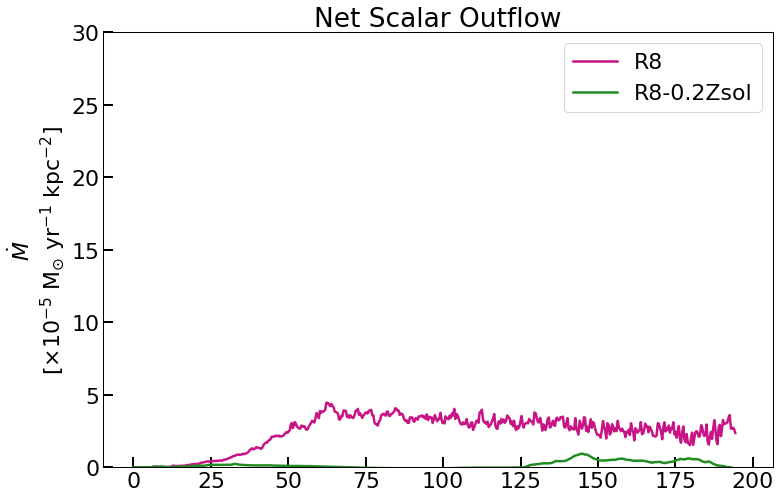

In [20]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))


label= ['R8', 'R8-0.2Zsol','R4',  'R4-0.2Zsol']
ls = ['-', '-', '--', '--' ]

colors = ['mediumvioletred', 'forestgreen', 'mediumvioletred', 'forestgreen']

k=0

for folder in folder_list[0:2]:
    if(source=='Summit'):
        data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder)
    else:
        data_path = os.path.join(scratch, 'sims/', folder)
    print(data_path)
    os.chdir(data_path)
    list_file = glob.glob("proj_y_*")
    
    infile   = os.path.join(data_path, 'metal_uniform.in')
    dom_min, dom_max, ncells = getdomain(infile)
    fac = 1
    zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
    xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
    yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

    dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
    height = 2. * kpc
    index = min(range(zrange.shape[0]), key=lambda i: abs(zrange[i] - height))
    Zunit = dx * yr_to_sec/1.e3/1.e-5
    
    timestep = np.zeros((len(list_file)))
    tot_mass_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))

    tot_scalar_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))

    
    i = 0 
    for f in list_file:
        inputfile = os.path.join(data_path, f)
        ds   = yt.load(inputfile)
        data = ds.covering_grid(level=0, left_edge=dom_min, dims=ds.domain_dimensions, num_ghost_zones=0)
        timestep[i] = ds.current_time.to('Myr')
        tot_mass_flux[i,:] = np.array(data['scalar_outflow'])[:,0,:]
        i+=1
        
    print(tot_mass_flux.shape)
    indexes = list(range(len(timestep)))
    indexes.sort(key=timestep.__getitem__)
    sorted_time = list(map(timestep.__getitem__, indexes))
    
    flux_sum = np.sum(tot_mass_flux[:,:,index], axis=1)
    sorted_mdot  = list(map(flux_sum.__getitem__, indexes))
    ax.plot(sorted_time, np.asarray(sorted_mdot)*Zunit, ls=ls[k],\
            label=label[k],markersize=12, lw=2.5, color=colors[k])
    k+=1

ax.legend()
ax.set_ylabel('$\dot{M}$' + '\n'  + r'$[\times 10^{-5}$ M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$]')
ax.set_title('Net Scalar Outflow')
# ax.set_yscale('Symlog', linthresh=1.e-4)
ax.set_ylim(0., 30.)

NameError: name 'zrange' is not defined

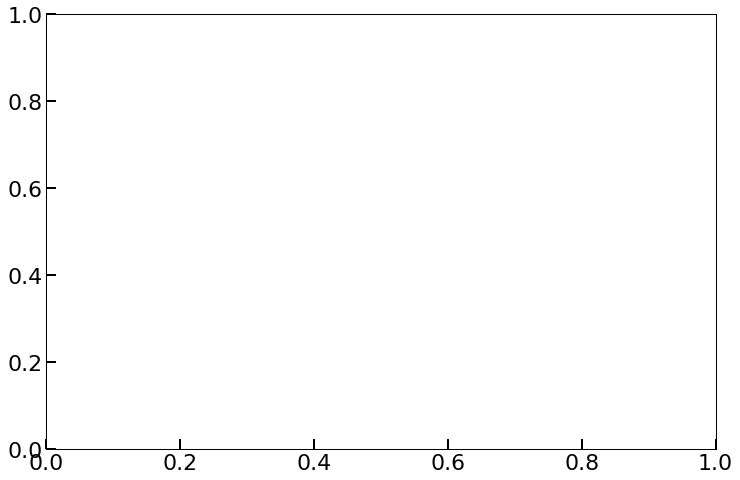

In [7]:

fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))

height = 2. * kpc
index = min(range(zrange.shape[0]), key=lambda i: abs(zrange[i] - height))
Zunit = dx * yr_to_sec/1.e3/1.e-5

k=4

for folder in folder_list[4:]:
    data_path = os.path.join(scratch, 'sims/', folder)
    data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder)
    os.chdir(data_path)
    list_file = glob.glob("proj_y_*")
    
    infile   = os.path.join(data_path, 'metal_uniform.in')
    dom_min, dom_max, ncells = getdomain(infile)
    fac = 1
    zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
    xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
    yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

    dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
    
    
    timestep = np.zeros((len(list_file)))
    tot_mass_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))

    tot_scalar_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))

    
    i = 0 
    for f in list_file:
        inputfile = os.path.join(data_path, f)
        ds   = yt.load(inputfile)
        if(i==30):break
        data = ds.covering_grid(level=0, left_edge=dom_min, dims=ds.domain_dimensions, num_ghost_zones=0)
        timestep[i] = ds.current_time.to('Myr')
        tot_mass_flux[i,:] = np.array(data['warm_scalar_outflow'])[:,0,:]
        i+=1
        
    print(tot_mass_flux.shape)
    indexes = list(range(len(timestep)))
    indexes.sort(key=timestep.__getitem__)
    sorted_time = list(map(timestep.__getitem__, indexes))
    
    flux_sum = np.sum(tot_mass_flux[:,:,index], axis=1)
    sorted_mdot  = list(map(flux_sum.__getitem__, indexes))
    ax.plot(sorted_time, np.asarray(sorted_mdot)*Zunit, ls=ls[k],\
            label=label[k],markersize=12, lw=2.5, color=colors[k])
    k+=1

ax.legend()
ax.set_ylabel('$\dot{M}$ [M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$]')
ax.set_title('Warm Scalar Outflow')
ax.set_yscale('Symlog', linthresh=1.e-4)
ax.set_ylim(-50., 50.)

NameError: name 'zrange' is not defined

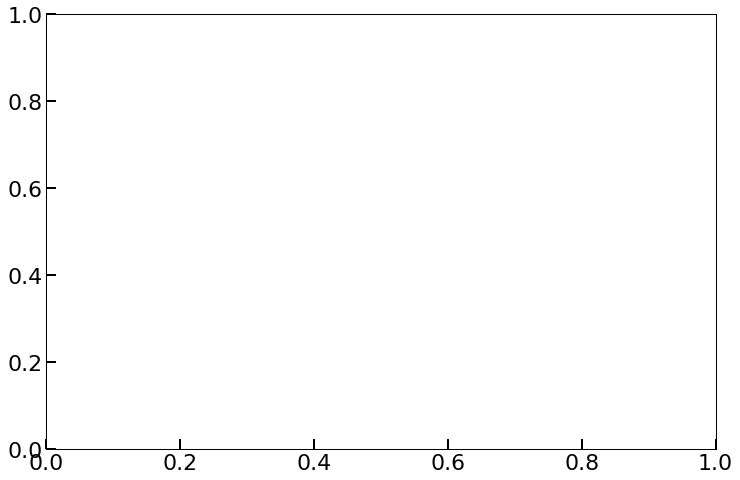

In [6]:
k=0

fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))

height = 2. * kpc
index = min(range(zrange.shape[0]), key=lambda i: abs(zrange[i] - height))
label= ['R8', 'R4', 'R8-0.2Zsol', 'R4-0.2Zsol']
ls = ['-', '-', '--', '--' ]
Zunit = dx * yr_to_sec/1.e3/1.e-5
colors = ['mediumvioletred', 'forestgreen', 'mediumvioletred', 'forestgreen']

for folder in folder_list:
    data_path = os.path.join(scratch, 'sims/', folder)
    os.chdir(data_path)
    list_file = glob.glob("proj_y_*")
    
    infile   = os.path.join(data_path, 'metal_uniform.in')
    dom_min, dom_max, ncells = getdomain(infile)
    fac = 1
    zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
    xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
    yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

    dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
    
    
    timestep = np.zeros((len(list_file)))
    tot_mass_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))

    tot_scalar_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))

    
    i = 0 
    for f in list_file:
        inputfile = os.path.join(data_path, f)
        ds   = yt.load(inputfile)
        if(i==30):
            print(inputfile,k)
            break
        data = ds.covering_grid(level=0, left_edge=dom_min, dims=ds.domain_dimensions, num_ghost_zones=0)
        timestep[i] = ds.current_time.to('Myr')
        tot_mass_flux[i,:] = np.array(data['hot_scalar_outflow'])[:,0,:]
        i+=1
        
    print(tot_mass_flux.shape)
    indexes = list(range(len(timestep)))
    indexes.sort(key=timestep.__getitem__)
    sorted_time = list(map(timestep.__getitem__, indexes))
    
    flux_sum = np.sum(tot_mass_flux[:,:,index], axis=1)
    sorted_mdot  = list(map(flux_sum.__getitem__, indexes))
    ax.plot(sorted_time, np.asarray(sorted_mdot)*Zunit, ls=ls[k],\
            label=label[k],markersize=12, lw=2.5, color=colors[k])
    k+=1

ax.legend()
ax.set_ylabel('$\dot{M}$ [M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$]')
ax.set_title('Hot Scalar Outflow')
ax.set_yscale('Symlog', linthresh=1.e-4)
ax.set_ylim(-10., 10.)
